In [1]:
import pandas as pd
datos=pd.read_csv('datos_ibgmUsados.csv')

In [2]:
datos.columns[:-1]

Index(['BUV395-A___CD45RA', 'BUV737-A___CD56', 'BUV805-A___CD8',
       'BV421-A___CCR7', 'Super Bright 436-A___CD123', 'eFluor 450-A___CD11c',
       'BV510-A___CD3', 'Pacific Orange-A___CD20', 'BV570-A___IgM',
       'BV650-A___CD28', 'BV785-A___CD103', 'FITC-A___IgA',
       'PerCP-eFluor 710-A___TCRgd', 'cFluor YG584-A___CD4',
       'PE-Cy7-A___CXCR3', 'APC-Fire 810-A___CD38', 'PE-Fire 810-A___HLA-DR',
       'BV605-A___IgG', 'APC-R700-A___CD127', 'APC-H7-A___CD27',
       'PE-Alexa Fluor 610-A___CD24', 'PE-Alexa Fluor 700-A___CD25',
       'BB515-A___CD141', 'BV480-A___IgD', 'BV750-A___CXCR5',
       'PE-Cy5-A___CD95(Fas)', 'PerCP-Cy5.5-A___CD2',
       'Alexa Fluor 647-A___CD1c', 'Spark Blue 550-A___CD14',
       'BUV661-A___VISTA', 'Spark NIR 685-A___CD19', 'BUV496-A___CD16',
       'BUV563-A___CCR5', 'BUV615-A___NKG2d', 'BV711-A___CCR6', 'PE-A___NKG2c',
       'PE-Dazzle594-A___NKp30', 'APC-A___NKG2a', 'One'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
_, X_subset,_, y_subset=train_test_split(datos.iloc[:,:-1], datos.iloc[:,-1],test_size=0.1, random_state=42, stratify=datos.iloc[:,-1], shuffle=True)

In [4]:
bcells=['Memory B cells/IgG','Memory B cells/IgA','Memory B cells','Plasmablasts','Plasmablasts/IgA','Plasmablasts/IgG','IgD+','Memory B cells/IgG- IgA-/IgM', 'Plasmablasts/IgG- IgA-/IgM', 'B cells']
igd=['Memory B cells/IgG','Memory B cells/IgA','Memory B cells','Plasmablasts','Plasmablasts/IgA','Plasmablasts/IgG','Memory B cells/IgG- IgA-/IgM', 'Plasmablasts/IgG- IgA-/IgM']
plasmablasts=['Plasmablasts','Plasmablasts/IgA','Plasmablasts/IgG', 'Plasmablasts/IgG- IgA-/IgM']
memoryb=['Memory B cells/IgG','Memory B cells/IgA','Memory B cells','Memory B cells/IgG- IgA-/IgM']

In [5]:
tcells=['CD8/Trm', 'Trm/Th17', 'Memory/Th1','Trm/Th1/Th17-like','Trm/Th1','CD8/CD45RA+/TEMRA/rTEMRA','Memory/Th1/Th17-like', 'CD8/Memory','Real T cells','CD2-','DP','CD4/CD45RA+/naive','Trm/Th2', 'Tgd/Memory', 
        'CD4/CD45RA+/TEMRA/nrTEMRA','CD8/CD45RA+/TEMRA/nrTEMRA', 'CD8/CD45RA+/naive','NKT', 'Memory/Th2', 'CD8','Memory/Th17','Tgd/CD45RA+/naive', 'CD4/CD45RA+/TEMRA/rTEMRA','Tgd/CD45RA+/TEMRA/rTEMRA', 'Tgd',
        'CD2+ CD8high','Tgd/CD45RA+/TEMRA/nrTEMRA', 'Tgd/Trm', 'CD2+CD8dim', 'CD2+ CD8-','CD4']

In [6]:
nkt=['CD2-','NKT', 'CD2+ CD8high','CD2+CD8dim', 'CD2+ CD8-']
tgd=['Tgd/Memory','Tgd/CD45RA+/naive','Tgd/CD45RA+/TEMRA/rTEMRA', 'Tgd','Tgd/CD45RA+/TEMRA/nrTEMRA', 'Tgd/Trm']
realtcells=['CD8/Trm', 'Trm/Th17', 'Memory/Th1','Trm/Th1/Th17-like','Trm/Th1','CD8/CD45RA+/TEMRA/rTEMRA','Memory/Th1/Th17-like', 'CD8/Memory','Real T cells','Trm/Th2','DP','CD4/CD45RA+/naive',
            'CD4/CD45RA+/TEMRA/nrTEMRA','CD8/CD45RA+/TEMRA/nrTEMRA', 'CD8/CD45RA+/naive', 'Memory/Th2', 'CD8','Memory/Th17','CD4/CD45RA+/TEMRA/rTEMRA','CD4']

In [7]:
cd4=['Trm/Th17', 'Memory/Th1','Trm/Th1/Th17-like','Trm/Th1','Memory/Th1/Th17-like', 'Trm/Th2','CD4/CD45RA+/naive',
            'CD4/CD45RA+/TEMRA/nrTEMRA','Memory/Th2','Memory/Th17','CD4/CD45RA+/TEMRA/rTEMRA','CD4']

In [8]:
cd8=['CD8/Trm', 'CD8/CD45RA+/TEMRA/rTEMRA','CD8/Memory','CD8/CD45RA+/TEMRA/nrTEMRA', 'CD8/CD45RA+/naive','CD8']

In [9]:
noTnoB=['DR-','monocytes','basofilos','cDC','terminal NK','mature NK','early NK','APC', 'macrophages','ILC']

In [10]:
nkcells=['DR-','terminal NK','mature NK','early NK']
apc=['monocytes','cDC','APC', 'macrophages']

In [11]:
def asignar_niveles(etiqueta):
    #Nivel 1
    if etiqueta in bcells:
        n1=0
    elif etiqueta in tcells:
        n1=1
    elif etiqueta in noTnoB:
        n1=2
    else:
        n1=-1

    #Nivel 2
    if etiqueta=="B cells":
        n2=0
    elif etiqueta =="IgD+":
        n2=1
    elif etiqueta in igd:
        n2=2
    elif etiqueta in nkt:
        n2=0
    elif etiqueta in tgd:
        n2=1
    elif etiqueta in realtcells:
        n2=2
    elif etiqueta in nkcells:
        n2=0
    elif etiqueta in apc:
        n2=1
    elif etiqueta=="ILC":
        n2=2
    elif etiqueta=="basofilos":
        n2=3
    else:
        n2=-1

    #Nivel 3
    if etiqueta in plasmablasts:
        n3=0
    elif etiqueta in memoryb:
        n3=1
    elif etiqueta=="NKT":
        n3=0
    elif etiqueta=='CD2-':
        n3=1
    elif etiqueta=='CD2+ CD8high':
        n3=2
    elif etiqueta=='CD2+CD8dim':
        n3=3
    elif etiqueta=='CD2+ CD8-':
        n3=4
    elif etiqueta=="Tgd":
        n3=0
    elif etiqueta=='Tgd/Trm':
        n3=1  
    elif etiqueta=='Tgd/Memory':
        n3=2
    elif etiqueta=='Tgd/CD45RA+/naive':
        n3=3
    elif etiqueta=='Tgd/CD45RA+/TEMRA/rTEMRA':
        n3=4
    elif etiqueta=='Tgd/CD45RA+/TEMRA/nrTEMRA':
        n3=5
    elif etiqueta=="Real T cells":
        n3=0
    elif etiqueta in cd4:
        n3=1
    elif etiqueta in cd8:
        n3=2
    elif etiqueta=="DP":
        n3=3
    elif etiqueta=="DR-":
        n3=0  
    elif etiqueta=='early NK':
        n3=1
    elif etiqueta=='mature NK':
        n3=2
    elif etiqueta=='terminal NK':
        n3=3
    elif etiqueta=="APC":
        n3=0
    elif etiqueta=='macrophages':
        n3=1
    elif etiqueta=='monocytes':
        n3=2
    elif etiqueta=='cDC':
        n3=3
    else:
        n3=-1    

  
    return pd.Series([n1,n2,n3])

In [12]:
datos_subset=pd.DataFrame(X_subset)
datos_subset["Clase"]=y_subset

In [13]:
datos_subset[['nivel_1', 'nivel_2','nivel_3']]=datos_subset["Clase"].apply(asignar_niveles)

# MLP jerárquico con Torch

In [14]:
import torch
import numpy as np
X=np.array(datos_subset.iloc[:,:-4])
y1=datos_subset["nivel_1"].values
y2=datos_subset["nivel_2"].values
y3=datos_subset["nivel_3"].values

In [15]:
X.shape, y1.shape, y2.shape, y3.shape

((156291, 39), (156291,), (156291,), (156291,))

In [16]:
torch.cuda.is_available()

False

In [17]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [18]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Subset

In [19]:
from torch import nn
class MLP(nn.Module):
    def __init__(self, a,b, n_clases):
        super().__init__()
        self.Linear1=nn.Linear(39,a)
        self.Linear2=nn.Linear(a, b)
        self.output=nn.Linear(b, n_clases)
        self.relu=nn.LeakyReLU()
    def forward(self, x):
        xx=self.relu(self.Linear1(x))
        xx=self.relu(self.Linear2(xx))
        return self.output(xx)
        

In [20]:
class MLP2(nn.Module):
    def __init__(self, a,b, c,n_clases):
        super().__init__()
        self.Linear1=nn.Linear(39,a)
        self.Linear2=nn.Linear(a, b)
        self.Linear3=nn.Linear(b,c)
        self.output=nn.Linear(c, n_clases)
        self.relu=nn.LeakyReLU()
    def forward(self, x):
        xx=self.relu(self.Linear1(x))
        xx=self.relu(self.Linear2(xx))
        xx=self.relu(self.Linear3(xx))
        return self.output(xx)
        

In [21]:
from tqdm import tqdm
from sklearn.metrics import f1_score, balanced_accuracy_score
def train_test_all_epoch(nombre,model, dataloader, X_train, y_train, X_test, y_test, optimizer, loss_fn, device):
    registros=[]
    for epoch in tqdm(range(epocas)):
        model.train()
        for xx, yy in dataloader:
            optimizer.zero_grad()
            loss=loss_fn(model(xx.to(device)),yy.to(device))
            loss.backward()
            optimizer.step()
        model.eval()
        with torch.no_grad():
            y_train_pred=model(X_train.to(device))
            y_test_pred=model(X_test.to(device))
            train_loss=loss_fn(y_train_pred.to(device), y_train.to(device)).item()
            test_loss=loss_fn(y_test_pred.to(device), y_test.to(device)).item()
            train_acc=np.mean((y_train_pred.argmax(dim=1).to(device) == y_train.to(device)).cpu().numpy())
            test_acc=np.mean((y_test_pred.argmax(dim=1).to(device) == y_test.to(device)).cpu().numpy())
            train_f1=f1_score(y_train.cpu().numpy(), y_train_pred.argmax(dim=1).cpu().numpy(), average="weighted")
            test_f1=f1_score(y_test.cpu().numpy(), y_test_pred.argmax(dim=1).cpu().numpy(), average="weighted")
            print("Epoca: ",epoch, " Train acc: ", train_acc, " Test acc: ", test_acc)
            print("Train loss: ", train_loss, " Test loss: ", test_loss)
            print("Train f1: ", train_f1, " Test f1: ", test_f1)

            registros.append({
                "epoch": epoch,
                "modelo": nombre,
                "train_loss": train_loss,
                "test_loss": test_loss,
                "train_acc": train_acc,
                "test_acc": test_acc,
                "train_f1": train_f1,
                "test_f1":test_f1
            })
    
    return pd.DataFrame(registros)

In [22]:
epocas=30
columnas=["General", "B cells", "T cells", "No T & No B", "IgD-", "NKT", "Tgd", "Real T cells", "NK cells",
          "APC", "Plamablasts","Memory B cells", "CD4", "CD8"]

## General

In [23]:
pd.DataFrame(y1).value_counts()*100/len(y1)

0
1    70.606753
0    25.248415
2     4.144832
Name: count, dtype: float64

In [24]:
weight_general=np.array([ 0.252, 0.706,0.041])
weight_general=np.sum(weight_general)/(len(weight_general)*weight_general)
weight_general

array([1.32142857, 0.47167139, 8.12195122])

In [25]:
result_general=[]
X_train, X_test, y_train, y_test=train_test_split(X,y1,test_size=1/3,random_state=42, stratify=y1)
#Nivel 1
train_dataset_general=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader_general=DataLoader(train_dataset_general, batch_size=1024, num_workers=8, shuffle=True)
test_dataset_general=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader_general=DataLoader(test_dataset_general, batch_size=1024,num_workers=8, shuffle=True)

model_general=MLP(128,64,3).to(device)
optimizer_general=torch.optim.Adam(model_general.parameters(), lr=1e-3)
loss_fn_general=nn.CrossEntropyLoss(torch.tensor(weight_general, dtype=torch.float32))

print("General")
result_general=train_test_all_epoch("General",model_general, train_loader_general, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_general, loss_fn_general, device)

General


  3%|█▍                                          | 1/30 [00:17<08:34, 17.74s/it]

Epoca:  0  Train acc:  0.9232201470334185  Test acc:  0.9228938326583105
Train loss:  0.487350195646286  Test loss:  0.49029722809791565
Train f1:  0.9328497658890258  Test f1:  0.9323801712919122


  7%|██▉                                         | 2/30 [00:29<06:44, 14.46s/it]

Epoca:  1  Train acc:  0.9408219283260073  Test acc:  0.9408411232892488
Train loss:  0.2742196023464203  Test loss:  0.2756979167461395
Train f1:  0.9464010073501403  Test f1:  0.9466088556072421


 10%|████▍                                       | 3/30 [00:41<05:58, 13.29s/it]

Epoca:  2  Train acc:  0.9498051711230973  Test acc:  0.9493828819317811
Train loss:  0.2132861316204071  Test loss:  0.2135414332151413
Train f1:  0.953302174875912  Test f1:  0.9530077749758231


 13%|█████▊                                      | 4/30 [00:53<05:32, 12.80s/it]

Epoca:  3  Train acc:  0.9469355241184713  Test acc:  0.946138933143943
Train loss:  0.18714594841003418  Test loss:  0.18714682757854462
Train f1:  0.9513257441204398  Test f1:  0.9508082993905813


 17%|███████▎                                    | 5/30 [01:03<04:50, 11.62s/it]

Epoca:  4  Train acc:  0.942616657389101  Test acc:  0.9413209973702901
Train loss:  0.1725221872329712  Test loss:  0.1726173311471939
Train f1:  0.9479600063387965  Test f1:  0.947100623975187


 20%|████████▊                                   | 6/30 [01:16<04:49, 12.06s/it]

Epoca:  5  Train acc:  0.9500067182371346  Test acc:  0.9490757625199148
Train loss:  0.15730400383472443  Test loss:  0.15708047151565552
Train f1:  0.9535744629396464  Test f1:  0.9528887191346535


 23%|██████████▎                                 | 7/30 [01:32<05:06, 13.31s/it]

Epoca:  6  Train acc:  0.9594506401520241  Test acc:  0.9590571434055704
Train loss:  0.14376883208751678  Test loss:  0.14330050349235535
Train f1:  0.9616067967392773  Test f1:  0.9612992873716656


 27%|███████████▋                                | 8/30 [01:47<05:05, 13.89s/it]

Epoca:  7  Train acc:  0.9704589515711077  Test acc:  0.9707468760197324
Train loss:  0.13968995213508606  Test loss:  0.13870827853679657
Train f1:  0.9710963255098409  Test f1:  0.9713901293440176


 30%|█████████████▏                              | 9/30 [02:03<05:03, 14.47s/it]

Epoca:  8  Train acc:  0.9672246002648905  Test acc:  0.9668886884081617
Train loss:  0.12697957456111908  Test loss:  0.12658272683620453
Train f1:  0.9684423212797193  Test f1:  0.9681747602722627


 33%|██████████████▎                            | 10/30 [02:18<04:57, 14.85s/it]

Epoca:  9  Train acc:  0.9723304604871682  Test acc:  0.9728583219763134
Train loss:  0.12566596269607544  Test loss:  0.12548686563968658
Train f1:  0.9727947792246591  Test f1:  0.9732911655606263


 37%|███████████████▊                           | 11/30 [02:31<04:29, 14.20s/it]

Epoca:  10  Train acc:  0.9724936176747222  Test acc:  0.9728391270130717
Train loss:  0.11568805575370789  Test loss:  0.11549744755029678
Train f1:  0.9731697393715997  Test f1:  0.9735125372240416


 40%|█████████████████▏                         | 12/30 [02:48<04:33, 15.21s/it]

Epoca:  11  Train acc:  0.964489318002956  Test acc:  0.9635487648041154
Train loss:  0.10728910565376282  Test loss:  0.10825580358505249
Train f1:  0.9662242528383901  Test f1:  0.965466867397776


 43%|██████████████████▋                        | 13/30 [03:08<04:39, 16.41s/it]

Epoca:  12  Train acc:  0.975257692381519  Test acc:  0.9760446858744265
Train loss:  0.10403185337781906  Test loss:  0.10457415133714676
Train f1:  0.9757709588119722  Test f1:  0.9765169652297784


 47%|████████████████████                       | 14/30 [03:21<04:09, 15.62s/it]

Epoca:  13  Train acc:  0.9714378946964316  Test acc:  0.9714378946964316
Train loss:  0.09692693501710892  Test loss:  0.09803157299757004
Train f1:  0.9724610875326626  Test f1:  0.9725080660602826


 50%|█████████████████████▌                     | 15/30 [03:38<03:58, 15.91s/it]

Epoca:  14  Train acc:  0.974883390598307  Test acc:  0.9750273528226193
Train loss:  0.09352200478315353  Test loss:  0.09476859122514725
Train f1:  0.9754939222229931  Test f1:  0.9756504204371025


 53%|██████████████████████▉                    | 16/30 [03:51<03:28, 14.92s/it]

Epoca:  15  Train acc:  0.9751425226020692  Test acc:  0.9746818434842697
Train loss:  0.0952063798904419  Test loss:  0.09664192795753479
Train f1:  0.97586006587896  Test f1:  0.9754585721539492


 57%|████████████████████████▎                  | 17/30 [04:07<03:20, 15.46s/it]

Epoca:  16  Train acc:  0.9738852525097415  Test acc:  0.9739140449546039
Train loss:  0.087140291929245  Test loss:  0.08927662670612335
Train f1:  0.9747078015200563  Test f1:  0.9748190202924404


 60%|█████████████████████████▊                 | 18/30 [04:22<03:02, 15.19s/it]

Epoca:  17  Train acc:  0.975257692381519  Test acc:  0.9753920571242106
Train loss:  0.0849127247929573  Test loss:  0.08705763518810272
Train f1:  0.9759919664789338  Test f1:  0.9761755416389839


 63%|███████████████████████████▏               | 19/30 [04:34<02:35, 14.17s/it]

Epoca:  18  Train acc:  0.9778778048640037  Test acc:  0.978021767088316
Train loss:  0.08161401003599167  Test loss:  0.08390270918607712
Train f1:  0.9784014171673752  Test f1:  0.978570308020861


 67%|████████████████████████████▋              | 20/30 [04:46<02:16, 13.60s/it]

Epoca:  19  Train acc:  0.9775994778969999  Test acc:  0.9775802829337582
Train loss:  0.07944554835557938  Test loss:  0.08235485851764679
Train f1:  0.9781321008508823  Test f1:  0.9781726836617276


 70%|██████████████████████████████             | 21/30 [05:02<02:07, 14.20s/it]

Epoca:  20  Train acc:  0.9629057335355202  Test acc:  0.961514098700501
Train loss:  0.08519405126571655  Test loss:  0.08871184289455414
Train f1:  0.9653061097978353  Test f1:  0.9643411645525793


 73%|███████████████████████████████▌           | 22/30 [05:17<01:56, 14.53s/it]

Epoca:  21  Train acc:  0.9813041058026374  Test acc:  0.9808818166113212
Train loss:  0.08057558536529541  Test loss:  0.08318518102169037
Train f1:  0.9816130059041988  Test f1:  0.9812212319875162


 77%|████████████████████████████████▉          | 23/30 [05:34<01:47, 15.41s/it]

Epoca:  22  Train acc:  0.9685202602837015  Test acc:  0.9675029272318943
Train loss:  0.07771867513656616  Test loss:  0.08135922998189926
Train f1:  0.9702815745624581  Test f1:  0.9695597175311882


 80%|██████████████████████████████████▍        | 24/30 [05:49<01:31, 15.32s/it]

Epoca:  23  Train acc:  0.977858609900762  Test acc:  0.9779065973088662
Train loss:  0.07152026891708374  Test loss:  0.0750311017036438
Train f1:  0.9784506969494057  Test f1:  0.9785521259794409


 83%|███████████████████████████████████▊       | 25/30 [06:01<01:10, 14.20s/it]

Epoca:  24  Train acc:  0.9757951513522851  Test acc:  0.9754496420139356
Train loss:  0.07340656965970993  Test loss:  0.07747916877269745
Train f1:  0.9765493302860679  Test f1:  0.9763130194710433


 87%|█████████████████████████████████████▎     | 26/30 [06:09<00:49, 12.40s/it]

Epoca:  25  Train acc:  0.986525135804365  Test acc:  0.986141236539532
Train loss:  0.08553847670555115  Test loss:  0.0888560339808464
Train f1:  0.9865243829784804  Test f1:  0.9861363855450568


 90%|██████████████████████████████████████▋    | 27/30 [06:17<00:33, 11.08s/it]

Epoca:  26  Train acc:  0.9814192755820873  Test acc:  0.9814000806188456
Train loss:  0.06703779846429825  Test loss:  0.07054631412029266
Train f1:  0.9818589203923949  Test f1:  0.9818675055629248


 93%|████████████████████████████████████████▏  | 28/30 [06:29<00:22, 11.36s/it]

Epoca:  27  Train acc:  0.9807762443134921  Test acc:  0.980785841795113
Train loss:  0.06643228977918625  Test loss:  0.06988413631916046
Train f1:  0.9812680156907709  Test f1:  0.9813088280537066


 97%|█████████████████████████████████████████▌ | 29/30 [06:38<00:10, 10.71s/it]

Epoca:  28  Train acc:  0.9793942069600937  Test acc:  0.9791926598460564
Train loss:  0.06562606990337372  Test loss:  0.06978241354227066
Train f1:  0.9799340359413529  Test f1:  0.9798124043535137


100%|███████████████████████████████████████████| 30/30 [06:51<00:00, 13.71s/it]

Epoca:  29  Train acc:  0.9766301322532968  Test acc:  0.9758527362420101
Train loss:  0.0677107721567154  Test loss:  0.07173086702823639
Train f1:  0.9776771104935735  Test f1:  0.977074907890628


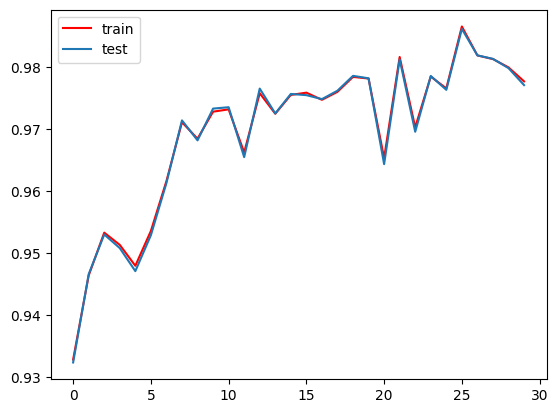

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(30), result_general["train_f1"], color="r")
plt.plot(range(30), result_general["test_f1"])
plt.legend(["train","test"])

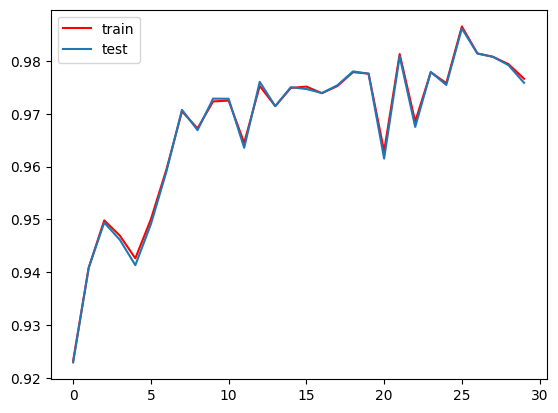

In [27]:
plt.plot(range(30), result_general["train_acc"], color="r")
plt.plot(range(30), result_general["test_acc"])
plt.legend(["train","test"])

### B cells

In [28]:
epocas=30
result_bcells=[]
y_bcells=y2[y1==0]
X_bcells=X[y1==0]
pd.DataFrame(y_bcells).value_counts()*100/len(y_bcells)

0
2    81.153544
1    14.685386
0     4.161070
Name: count, dtype: float64

In [29]:
weight_bcells=np.array([0.042, 0.147, 0.812])
weight_bcells=np.sum(weight_bcells)/(len(weight_bcells)*weight_bcells)
weight_bcells

array([7.94444444, 2.26984127, 0.41091954])

In [30]:

X_train, X_test, y_train, y_test=train_test_split(X_bcells,y_bcells,test_size=1/3,random_state=42, stratify=y_bcells)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8,shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_bcells=MLP(256,64,3).to(device)
optimizer_bcells=torch.optim.Adam(model_bcells.parameters(), lr=1e-3)
loss_fn_bcells=nn.CrossEntropyLoss(torch.tensor(weight_bcells, dtype=torch.float32))

print("B cells")
result_bcells=train_test_all_epoch("B cells",model_bcells, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_bcells, loss_fn_bcells, device)

B cells


  3%|█▍                                          | 1/30 [00:13<06:30, 13.48s/it]

Epoca:  0  Train acc:  0.7649294864484738  Test acc:  0.7632659267143075
Train loss:  0.6562749147415161  Test loss:  0.659748911857605
Train f1:  0.8024756528506963  Test f1:  0.8014180239683131


  7%|██▉                                         | 2/30 [00:26<06:01, 12.92s/it]

Epoca:  1  Train acc:  0.7298057551222108  Test acc:  0.7302721605595256
Train loss:  0.4971525967121124  Test loss:  0.4910360276699066
Train f1:  0.7756803490878809  Test f1:  0.7761299792107408


 10%|████▍                                       | 3/30 [00:30<04:01,  8.94s/it]

Epoca:  2  Train acc:  0.8170829056905007  Test acc:  0.8171658811008058
Train loss:  0.44876551628112793  Test loss:  0.43657186627388
Train f1:  0.8411551321503521  Test f1:  0.8414092878288004


 13%|█████▊                                      | 4/30 [00:41<04:18,  9.94s/it]

Epoca:  3  Train acc:  0.8506861291671418  Test acc:  0.8532005473620191
Train loss:  0.4190562665462494  Test loss:  0.40582776069641113
Train f1:  0.8678516791541604  Test f1:  0.8701153258174638


 17%|███████▎                                    | 5/30 [00:52<04:12, 10.11s/it]

Epoca:  4  Train acc:  0.8135097122438895  Test acc:  0.8167857685875018
Train loss:  0.40670838952064514  Test loss:  0.39260342717170715
Train f1:  0.8366647137751589  Test f1:  0.8399091101466782


 20%|████████▊                                   | 6/30 [01:00<03:47,  9.48s/it]

Epoca:  5  Train acc:  0.8642566617250161  Test acc:  0.8677208453702296
Train loss:  0.38013985753059387  Test loss:  0.36862003803253174
Train f1:  0.8812374438166568  Test f1:  0.8844260368465904


 23%|██████████▎                                 | 7/30 [01:05<03:02,  7.93s/it]

Epoca:  6  Train acc:  0.8657771695746379  Test acc:  0.8703056104606963
Train loss:  0.3653673529624939  Test loss:  0.35393139719963074
Train f1:  0.8825380882226601  Test f1:  0.8867135716721752


 27%|███████████▋                                | 8/30 [01:17<03:25,  9.33s/it]

Epoca:  7  Train acc:  0.8908655490933972  Test acc:  0.8941766762961837
Train loss:  0.35174810886383057  Test loss:  0.3378733694553375
Train f1:  0.8993097751768432  Test f1:  0.9026095884017579


 30%|█████████████▏                              | 9/30 [01:30<03:37, 10.35s/it]

Epoca:  8  Train acc:  0.9101379860873532  Test acc:  0.9131062794587198
Train loss:  0.3491087257862091  Test loss:  0.33561253547668457
Train f1:  0.9146917956698697  Test f1:  0.9178328563432804


 33%|██████████████▎                            | 10/30 [01:43<03:49, 11.45s/it]

Epoca:  9  Train acc:  0.8157524613220816  Test acc:  0.8171658811008058
Train loss:  0.3479340076446533  Test loss:  0.34033772349357605
Train f1:  0.8474790410925793  Test f1:  0.849348857390267


 37%|███████████████▊                           | 11/30 [01:55<03:35, 11.36s/it]

Epoca:  10  Train acc:  0.8691222868438059  Test acc:  0.8716740155085906
Train loss:  0.32664722204208374  Test loss:  0.31880223751068115
Train f1:  0.8851274193782414  Test f1:  0.8876226894612593


 40%|█████████████████▏                         | 12/30 [02:06<03:27, 11.51s/it]

Epoca:  11  Train acc:  0.8757745086859011  Test acc:  0.8773757032081496
Train loss:  0.3155536651611328  Test loss:  0.3074380159378052
Train f1:  0.8908586034735755  Test f1:  0.8925216014785937


 43%|██████████████████▋                        | 13/30 [02:12<02:44,  9.71s/it]

Epoca:  12  Train acc:  0.9106321511384803  Test acc:  0.9122700319294511
Train loss:  0.30465322732925415  Test loss:  0.2947045862674713
Train f1:  0.9169134956179144  Test f1:  0.9186946665687594


 47%|████████████████████                       | 14/30 [02:23<02:42, 10.16s/it]

Epoca:  13  Train acc:  0.9214277568707948  Test acc:  0.9222289797780143
Train loss:  0.3034444749355316  Test loss:  0.2923697233200073
Train f1:  0.9258289397205816  Test f1:  0.9269683166002294


 50%|█████████████████████▌                     | 15/30 [02:26<02:00,  8.01s/it]

Epoca:  14  Train acc:  0.9290302961189038  Test acc:  0.9294511175307891
Train loss:  0.3192805051803589  Test loss:  0.30719250440597534
Train f1:  0.9311984610022147  Test f1:  0.9318016025058644


 53%|██████████████████████▉                    | 16/30 [02:36<01:59,  8.52s/it]

Epoca:  15  Train acc:  0.9329836165279203  Test acc:  0.934164512695758
Train loss:  0.3142458498477936  Test loss:  0.3019813597202301
Train f1:  0.9347306822051243  Test f1:  0.9361332693283175


 57%|████████████████████████▎                  | 17/30 [02:46<01:57,  9.04s/it]

Epoca:  16  Train acc:  0.8670696012468164  Test acc:  0.8688611829101414
Train loss:  0.2921888530254364  Test loss:  0.28891244530677795
Train f1:  0.883658220928989  Test f1:  0.8854817693895747


 60%|█████████████████████████▊                 | 18/30 [02:55<01:49,  9.11s/it]

Epoca:  17  Train acc:  0.9349982894286691  Test acc:  0.9364451877755816
Train loss:  0.2787768244743347  Test loss:  0.2705399990081787
Train f1:  0.9376400876375287  Test f1:  0.9393642587873291


 63%|███████████████████████████▏               | 19/30 [03:02<01:32,  8.38s/it]

Epoca:  18  Train acc:  0.9000646215836089  Test acc:  0.901930971567584
Train loss:  0.26953011751174927  Test loss:  0.2653849422931671
Train f1:  0.9087704660096287  Test f1:  0.9106937956951064


 67%|████████████████████████████▋              | 20/30 [03:13<01:31,  9.18s/it]

Epoca:  19  Train acc:  0.9141293191926103  Test acc:  0.9154629770412042
Train loss:  0.2614879310131073  Test loss:  0.2562086880207062
Train f1:  0.9212228671107134  Test f1:  0.9228939166117345


 70%|██████████████████████████████             | 21/30 [03:25<01:30, 10.02s/it]

Epoca:  20  Train acc:  0.9152316873835861  Test acc:  0.9171354720997416
Train loss:  0.2689753770828247  Test loss:  0.2658005654811859
Train f1:  0.9199093197301865  Test f1:  0.9218719013273062


 73%|███████████████████████████████▌           | 22/30 [03:33<01:15,  9.40s/it]

Epoca:  21  Train acc:  0.9264454327745467  Test acc:  0.9285388474988596
Train loss:  0.2773556709289551  Test loss:  0.2716464102268219
Train f1:  0.9293631008473039  Test f1:  0.9314474281856098


 77%|████████████████████████████████▉          | 23/30 [03:38<00:56,  8.03s/it]

Epoca:  22  Train acc:  0.8643326871174972  Test acc:  0.8655161927930668
Train loss:  0.2721130847930908  Test loss:  0.27148836851119995
Train f1:  0.8828772803147693  Test f1:  0.884224626865803


 80%|██████████████████████████████████▍        | 24/30 [03:47<00:49,  8.33s/it]

Epoca:  23  Train acc:  0.9448815904512107  Test acc:  0.9451117530789114
Train loss:  0.2736847698688507  Test loss:  0.2680469751358032
Train f1:  0.9458135773032645  Test f1:  0.9461714364744395


 83%|███████████████████████████████████▊       | 25/30 [03:55<00:41,  8.33s/it]

Epoca:  24  Train acc:  0.899228342266317  Test acc:  0.8992701839744565
Train loss:  0.2502799928188324  Test loss:  0.25045323371887207
Train f1:  0.9100442966432601  Test f1:  0.9105169224635603


 87%|█████████████████████████████████████▎     | 26/30 [04:07<00:37,  9.27s/it]

Epoca:  25  Train acc:  0.9415364731820428  Test acc:  0.9420708529724798
Train loss:  0.24153129756450653  Test loss:  0.23687726259231567
Train f1:  0.944625941214493  Test f1:  0.9455249122252608


 90%|██████████████████████████████████████▋    | 27/30 [04:17<00:28,  9.62s/it]

Epoca:  26  Train acc:  0.9428669175504618  Test acc:  0.9441234605443212
Train loss:  0.24205200374126434  Test loss:  0.2393406182527542
Train f1:  0.946822661521485  Test f1:  0.9481690730629343


 93%|████████████████████████████████████████▏  | 28/30 [04:30<00:21, 10.52s/it]

Epoca:  27  Train acc:  0.9452237047173756  Test acc:  0.9466322031321271
Train loss:  0.23711001873016357  Test loss:  0.23558486998081207
Train f1:  0.9486275967881427  Test f1:  0.9501273572979986


 97%|█████████████████████████████████████████▌ | 29/30 [04:43<00:11, 11.41s/it]

Epoca:  28  Train acc:  0.9509256091534573  Test acc:  0.9523338908316862
Train loss:  0.22857850790023804  Test loss:  0.22856974601745605
Train f1:  0.9525439102485288  Test f1:  0.9540506719369224


100%|███████████████████████████████████████████| 30/30 [04:58<00:00,  9.96s/it]

Epoca:  29  Train acc:  0.9208195537309461  Test acc:  0.9205564847194769
Train loss:  0.23154743015766144  Test loss:  0.23392178118228912
Train f1:  0.9298420730520697  Test f1:  0.9299092016311928


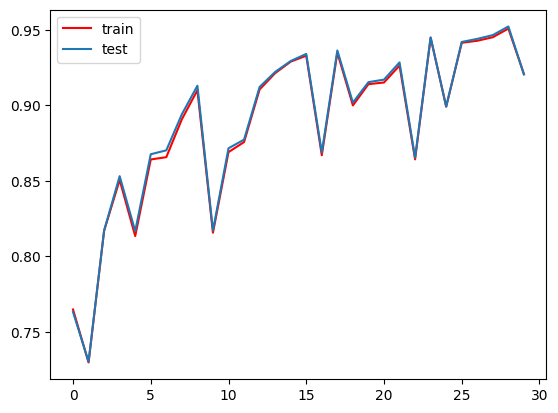

In [31]:
plt.plot(range(30), result_bcells["train_acc"], color="r")
plt.plot(range(30), result_bcells["test_acc"])
plt.legend(["train","test"])

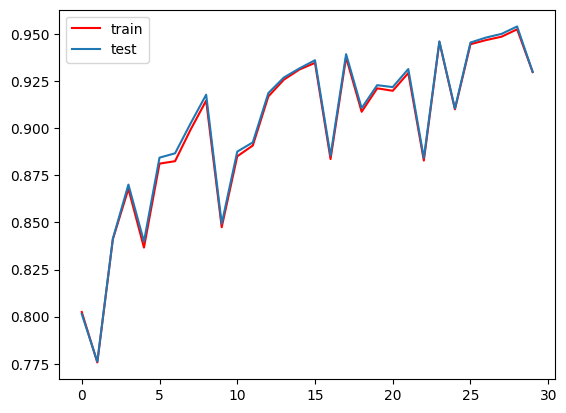

In [32]:
plt.plot(range(30), result_bcells["train_f1"], color="r")
plt.plot(range(30), result_bcells["test_f1"])
plt.legend(["train","test"])

### T cells

In [33]:
epocas=30
result_tcells=[]
y_tcells=y2[y1==1]
X_tcells=X[y1==1]
pd.DataFrame(y_tcells).value_counts()*100/len(y_tcells)

0
2    86.204147
0    12.374039
1     1.421814
Name: count, dtype: float64

In [34]:
weight_tcells=np.array([0.124, 0.014, 0.862])
weight_tcells=np.sum(weight_tcells)/(len(weight_tcells)*weight_tcells)
weight_tcells

array([ 2.68817204, 23.80952381,  0.3866976 ])

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X_tcells,y_tcells,test_size=1/3,random_state=42, stratify=y_tcells)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_tcells=MLP(256,64,3).to(device)
optimizer_tcells=torch.optim.Adam(model_tcells.parameters(), lr=1e-3)
loss_fn_tcells=nn.CrossEntropyLoss(torch.tensor(weight_tcells, dtype=torch.float32))

print("T cells")
result_tcells.append(train_test_all_epoch("T cells",model_tcells, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_tcells, loss_fn_tcells, device)) 

T cells


  3%|█▍                                          | 1/30 [00:22<10:58, 22.71s/it]

Epoca:  0  Train acc:  0.9112385819921706  Test acc:  0.9118366681165724
Train loss:  0.3830137848854065  Test loss:  0.3853531777858734
Train f1:  0.9171811982634361  Test f1:  0.9175257092721442


  7%|██▉                                         | 2/30 [00:34<07:39, 16.41s/it]

Epoca:  1  Train acc:  0.9683693997390169  Test acc:  0.9679208351457155
Train loss:  0.20529989898204803  Test loss:  0.20709536969661713
Train f1:  0.9726072832870708  Test f1:  0.972018728439241


 10%|████▍                                       | 3/30 [00:47<06:38, 14.76s/it]

Epoca:  2  Train acc:  0.9390495867768595  Test acc:  0.941197259678121
Train loss:  0.18553651869297028  Test loss:  0.18802854418754578
Train f1:  0.9449459584566707  Test f1:  0.9468257803902563


 13%|█████▊                                      | 4/30 [00:56<05:26, 12.56s/it]

Epoca:  3  Train acc:  0.9391039582427142  Test acc:  0.9409525880817747
Train loss:  0.1595458984375  Test loss:  0.15948772430419922
Train f1:  0.9488030501129711  Test f1:  0.9502734323449566


 17%|███████▎                                    | 5/30 [01:12<05:40, 13.64s/it]

Epoca:  4  Train acc:  0.9727055241409308  Test acc:  0.9725152240104393
Train loss:  0.14825552701950073  Test loss:  0.15259650349617004
Train f1:  0.9742575899200918  Test f1:  0.9740934936406185


 20%|████████▊                                   | 6/30 [01:27<05:44, 14.34s/it]

Epoca:  5  Train acc:  0.9741871465854719  Test acc:  0.9743910395824271
Train loss:  0.12131794542074203  Test loss:  0.12345264852046967
Train f1:  0.9787054358974162  Test f1:  0.9787867579509636


 23%|██████████▎                                 | 7/30 [01:42<05:28, 14.29s/it]

Epoca:  6  Train acc:  0.9678256850804697  Test acc:  0.9680023923444976
Train loss:  0.11593343317508698  Test loss:  0.11626501381397247
Train f1:  0.974207247900663  Test f1:  0.9743459359355482


 27%|███████████▋                                | 8/30 [01:54<05:01, 13.73s/it]

Epoca:  7  Train acc:  0.9800048934319269  Test acc:  0.979447585906916
Train loss:  0.1567165106534958  Test loss:  0.16083167493343353
Train f1:  0.9801626965356074  Test f1:  0.9795247869321227


 30%|█████████████▏                              | 9/30 [02:04<04:24, 12.58s/it]

Epoca:  8  Train acc:  0.9858906046107003  Test acc:  0.9857274902131361
Train loss:  0.11837675422430038  Test loss:  0.12585802376270294
Train f1:  0.9863670085826535  Test f1:  0.98623633551211


 33%|██████████████▎                            | 10/30 [02:12<03:41, 11.05s/it]

Epoca:  9  Train acc:  0.9527240104393214  Test acc:  0.9527783819051762
Train loss:  0.0985928624868393  Test loss:  0.10025113821029663
Train f1:  0.9593316734118029  Test f1:  0.9591683084177033


 37%|███████████████▊                           | 11/30 [02:21<03:18, 10.43s/it]

Epoca:  10  Train acc:  0.9747852327098738  Test acc:  0.9751794258373205
Train loss:  0.10089924186468124  Test loss:  0.10076777637004852
Train f1:  0.9788817328099054  Test f1:  0.9791129920807276


 40%|█████████████████▏                         | 12/30 [02:34<03:22, 11.26s/it]

Epoca:  11  Train acc:  0.9832671813832101  Test acc:  0.9833079599826011
Train loss:  0.07468334585428238  Test loss:  0.07882656157016754
Train f1:  0.9852642042796982  Test f1:  0.9852217932478564


 43%|██████████████████▋                        | 13/30 [02:48<03:24, 12.01s/it]

Epoca:  12  Train acc:  0.9872498912570683  Test acc:  0.9862168334058287
Train loss:  0.07052616775035858  Test loss:  0.07670007646083832
Train f1:  0.9882820744672293  Test f1:  0.9872411305728417


 47%|████████████████████                       | 14/30 [03:00<03:14, 12.15s/it]

Epoca:  13  Train acc:  0.9800184862983906  Test acc:  0.9795835145715528
Train loss:  0.10799721628427505  Test loss:  0.11211609095335007
Train f1:  0.9805805369509414  Test f1:  0.980141644078919


 50%|█████████████████████▌                     | 15/30 [03:10<02:51, 11.41s/it]

Epoca:  14  Train acc:  0.9911510439321444  Test acc:  0.9908655937364071
Train loss:  0.08234483748674393  Test loss:  0.08884502947330475
Train f1:  0.9914738688002676  Test f1:  0.9911842291434318


 53%|██████████████████████▉                    | 16/30 [03:21<02:38, 11.34s/it]

Epoca:  15  Train acc:  0.9822884949978251  Test acc:  0.9817311874728143
Train loss:  0.06461707502603531  Test loss:  0.07021766901016235
Train f1:  0.9831219518198617  Test f1:  0.9825705203999326


 57%|████████████████████████▎                  | 17/30 [03:30<02:18, 10.62s/it]

Epoca:  16  Train acc:  0.9832128099173554  Test acc:  0.9827098738581992
Train loss:  0.06829307973384857  Test loss:  0.07932053506374359
Train f1:  0.9840387293877038  Test f1:  0.9835177518486596


 60%|█████████████████████████▊                 | 18/30 [03:38<01:59,  9.94s/it]

Epoca:  17  Train acc:  0.9884324706394084  Test acc:  0.9884188777729448
Train loss:  0.12087877094745636  Test loss:  0.13283026218414307
Train f1:  0.9885847544685366  Test f1:  0.9885737012712805


 63%|███████████████████████████▏               | 19/30 [03:52<02:02, 11.13s/it]

Epoca:  18  Train acc:  0.9729366028708134  Test acc:  0.972868638538495
Train loss:  0.05626051500439644  Test loss:  0.05872434750199318
Train f1:  0.9753400360049683  Test f1:  0.9751290638799646


 67%|████████████████████████████▋              | 20/30 [04:04<01:54, 11.40s/it]

Epoca:  19  Train acc:  0.9892072640278382  Test acc:  0.9893703784254023
Train loss:  0.055043648928403854  Test loss:  0.06037161871790886
Train f1:  0.9901935533474006  Test f1:  0.9902900123752648


 70%|██████████████████████████████             | 21/30 [04:16<01:44, 11.56s/it]

Epoca:  20  Train acc:  0.9757095476294041  Test acc:  0.9760765550239234
Train loss:  0.06783471256494522  Test loss:  0.07409898191690445
Train f1:  0.9766190908655616  Test f1:  0.9769413938413649


 73%|███████████████████████████████▌           | 22/30 [04:29<01:35, 11.93s/it]

Epoca:  21  Train acc:  0.9874130056546324  Test acc:  0.9875217485863419
Train loss:  0.06285303086042404  Test loss:  0.07159549742937088
Train f1:  0.9880585159440912  Test f1:  0.9881117191368645


 77%|████████████████████████████████▉          | 23/30 [04:41<01:24, 12.02s/it]

Epoca:  22  Train acc:  0.9889761852979556  Test acc:  0.9886907351022184
Train loss:  0.04960572347044945  Test loss:  0.05354553088545799
Train f1:  0.9898892485999133  Test f1:  0.9895589760641691


 80%|██████████████████████████████████▍        | 24/30 [04:52<01:09, 11.62s/it]

Epoca:  23  Train acc:  0.9781426707264028  Test acc:  0.9780882992605481
Train loss:  0.04817068949341774  Test loss:  0.0506090372800827
Train f1:  0.9801667146907436  Test f1:  0.979961943281261


 83%|███████████████████████████████████▊       | 25/30 [05:04<00:59, 11.87s/it]

Epoca:  24  Train acc:  0.974567746846455  Test acc:  0.974989125706829
Train loss:  0.06072692945599556  Test loss:  0.06069687753915787
Train f1:  0.978269311321943  Test f1:  0.9783030738775329


 87%|█████████████████████████████████████▎     | 26/30 [05:12<00:42, 10.54s/it]

Epoca:  25  Train acc:  0.9817175946063506  Test acc:  0.9810787298825576
Train loss:  0.04672218859195709  Test loss:  0.05438106879591942
Train f1:  0.9824677087223886  Test f1:  0.9818067114007217


 90%|██████████████████████████████████████▋    | 27/30 [05:36<00:43, 14.48s/it]

Epoca:  26  Train acc:  0.987943127446716  Test acc:  0.9875489343192693
Train loss:  0.05497226491570473  Test loss:  0.06397456675767899
Train f1:  0.9882156157216736  Test f1:  0.9878370766720569


 93%|████████████████████████████████████████▏  | 28/30 [06:01<00:35, 17.75s/it]

Epoca:  27  Train acc:  0.9822613092648977  Test acc:  0.982927359721618
Train loss:  0.05457770824432373  Test loss:  0.05534100532531738
Train f1:  0.9851699371258307  Test f1:  0.9854606282246013


 97%|█████████████████████████████████████████▌ | 29/30 [06:21<00:18, 18.38s/it]

Epoca:  28  Train acc:  0.9792572857764246  Test acc:  0.9791757285776425
Train loss:  0.06376396864652634  Test loss:  0.06251254677772522
Train f1:  0.9827427973475651  Test f1:  0.9826425251265013


100%|███████████████████████████████████████████| 30/30 [06:41<00:00, 13.38s/it]

Epoca:  29  Train acc:  0.9672004132231405  Test acc:  0.96849173553719
Train loss:  0.0571613535284996  Test loss:  0.057972975075244904
Train f1:  0.9712519613191446  Test f1:  0.9720058905836344


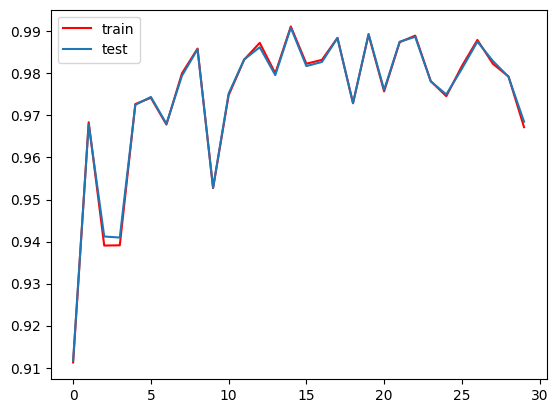

In [36]:
plt.plot(range(30), result_tcells[0]["train_acc"], color="r")
plt.plot(range(30), result_tcells[0]["test_acc"])
plt.legend(["train","test"])

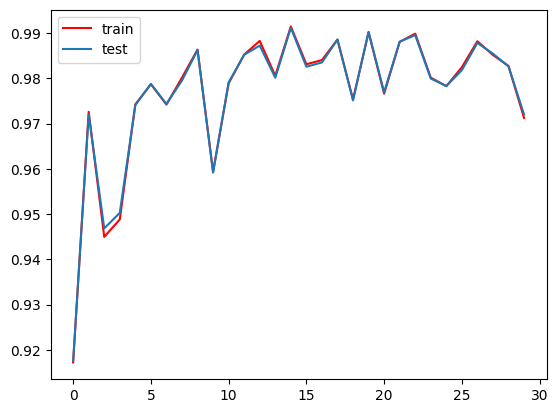

In [37]:
plt.plot(range(30), result_tcells[0]["train_f1"], color="r")
plt.plot(range(30), result_tcells[0]["test_f1"])
plt.legend(["train","test"])

### No T & No B

In [38]:
epocas=30
result_nono=[]
y_nono=y2[y1==2]
X_nono=X[y1==2]
pd.DataFrame(y_nono).value_counts()*100/len(y_nono)

0
1    63.491818
0    26.427910
2     8.552022
3     1.528249
Name: count, dtype: float64

In [39]:
weight_nono=np.array([0.264, 0.635, 0.086, 0.015])
weight_nono=np.sum(weight_nono)/(len(weight_nono)*weight_nono)
weight_nono

array([ 0.9469697 ,  0.39370079,  2.90697674, 16.66666667])

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X_nono,y_nono,test_size=1/3,random_state=42, stratify=y_nono)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_nono=MLP(256,64,4).to(device)
optimizer_nono=torch.optim.Adam(model_nono.parameters(), lr=1e-3)
loss_fn_nono=nn.CrossEntropyLoss(torch.tensor(weight_nono, dtype=torch.float32))

print("No T & No B")
result_nono.append(train_test_all_epoch("No T & No B",model_nono, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nono, loss_fn_nono, device)) 

No T & No B


  3%|█▍                                          | 1/30 [00:00<00:26,  1.11it/s]

Epoca:  0  Train acc:  0.7688744789254285  Test acc:  0.7481481481481481
Train loss:  1.3672484159469604  Test loss:  1.3680466413497925
Train f1:  0.7635653138317224  Test f1:  0.7451014117432381


  7%|██▉                                         | 2/30 [00:01<00:20,  1.38it/s]

Epoca:  1  Train acc:  0.6662806855025475  Test acc:  0.6527777777777778
Train loss:  1.3315728902816772  Test loss:  1.3336979150772095
Train f1:  0.6819571932081847  Test f1:  0.6688370980106979


 10%|████▍                                       | 3/30 [00:02<00:22,  1.20it/s]

Epoca:  2  Train acc:  0.8376563223714683  Test acc:  0.8240740740740741
Train loss:  1.259854793548584  Test loss:  1.2633254528045654
Train f1:  0.8479456701721705  Test f1:  0.8358889780547817


 13%|█████▊                                      | 4/30 [00:03<00:26,  1.01s/it]

Epoca:  3  Train acc:  0.6449745252431681  Test acc:  0.625462962962963
Train loss:  1.1267900466918945  Test loss:  1.1338067054748535
Train f1:  0.6923400866030279  Test f1:  0.6785331081304423


 17%|███████▎                                    | 5/30 [00:05<00:34,  1.39s/it]

Epoca:  4  Train acc:  0.7102825382121353  Test acc:  0.6888888888888889
Train loss:  0.9447473287582397  Test loss:  0.954522967338562
Train f1:  0.7627165549212616  Test f1:  0.74577037946104


 20%|████████▊                                   | 6/30 [00:07<00:36,  1.50s/it]

Epoca:  5  Train acc:  0.7878647522000927  Test acc:  0.7736111111111111
Train loss:  0.7768159508705139  Test loss:  0.7889039516448975
Train f1:  0.8203024961525441  Test f1:  0.8079912272692011


 23%|██████████▎                                 | 7/30 [00:10<00:41,  1.82s/it]

Epoca:  6  Train acc:  0.7329782306623437  Test acc:  0.7180555555555556
Train loss:  0.6672468781471252  Test loss:  0.6801618933677673
Train f1:  0.7819169764234442  Test f1:  0.7690974596202724


 27%|███████████▋                                | 8/30 [00:11<00:35,  1.62s/it]

Epoca:  7  Train acc:  0.7964335340435387  Test acc:  0.7805555555555556
Train loss:  0.5834582448005676  Test loss:  0.602974534034729
Train f1:  0.8220295309005331  Test f1:  0.8084403625162505


 30%|█████████████▏                              | 9/30 [00:12<00:30,  1.46s/it]

Epoca:  8  Train acc:  0.8587308939323761  Test acc:  0.8472222222222222
Train loss:  0.5215201377868652  Test loss:  0.5428178310394287
Train f1:  0.8714853787580624  Test f1:  0.8610224279057919


 33%|██████████████▎                            | 10/30 [00:13<00:26,  1.31s/it]

Epoca:  9  Train acc:  0.8714682723483094  Test acc:  0.8601851851851852
Train loss:  0.4757561981678009  Test loss:  0.49959859251976013
Train f1:  0.8821693116244356  Test f1:  0.8720402052588158


 37%|███████████████▊                           | 11/30 [00:13<00:20,  1.10s/it]

Epoca:  10  Train acc:  0.8594256600277906  Test acc:  0.8453703703703703
Train loss:  0.44922935962677  Test loss:  0.474673330783844
Train f1:  0.8742564675433264  Test f1:  0.8618203241098428


 40%|█████████████████▏                         | 12/30 [00:14<00:16,  1.09it/s]

Epoca:  11  Train acc:  0.8913849004168597  Test acc:  0.8759259259259259
Train loss:  0.43864795565605164  Test loss:  0.4664096236228943
Train f1:  0.8971128763805454  Test f1:  0.8833215994502579


 43%|██████████████████▋                        | 13/30 [00:14<00:13,  1.29it/s]

Epoca:  12  Train acc:  0.8719314497452524  Test acc:  0.8601851851851852
Train loss:  0.40509915351867676  Test loss:  0.4301091730594635
Train f1:  0.8828542402823437  Test f1:  0.8737912255533828


 47%|████████████████████                       | 14/30 [00:15<00:13,  1.20it/s]

Epoca:  13  Train acc:  0.8853635942566003  Test acc:  0.8726851851851852
Train loss:  0.388744980096817  Test loss:  0.4150031805038452
Train f1:  0.8944087649680584  Test f1:  0.8831852262922367


 50%|█████████████████████▌                     | 15/30 [00:17<00:16,  1.08s/it]

Epoca:  14  Train acc:  0.882121352477999  Test acc:  0.8680555555555556
Train loss:  0.364848256111145  Test loss:  0.38841715455055237
Train f1:  0.8931989173006257  Test f1:  0.880982472008366


 53%|██████████████████████▉                    | 16/30 [00:18<00:14,  1.07s/it]

Epoca:  15  Train acc:  0.8561834182491894  Test acc:  0.8527777777777777
Train loss:  0.35094738006591797  Test loss:  0.3731716573238373
Train f1:  0.8752341748149863  Test f1:  0.8718527661768853


 57%|████████████████████████▎                  | 17/30 [00:19<00:15,  1.16s/it]

Epoca:  16  Train acc:  0.8777211672070403  Test acc:  0.8662037037037037
Train loss:  0.33740153908729553  Test loss:  0.36221686005592346
Train f1:  0.8899984539745753  Test f1:  0.8802746807067114


 60%|█████████████████████████▊                 | 18/30 [00:20<00:13,  1.13s/it]

Epoca:  17  Train acc:  0.8439092172301992  Test acc:  0.8388888888888889
Train loss:  0.3367553651332855  Test loss:  0.3629801869392395
Train f1:  0.8658429238382916  Test f1:  0.8613723924546899


 63%|███████████████████████████▏               | 19/30 [00:23<00:16,  1.48s/it]

Epoca:  18  Train acc:  0.8737841593330246  Test acc:  0.8597222222222223
Train loss:  0.32107484340667725  Test loss:  0.34688156843185425
Train f1:  0.8875360573978999  Test f1:  0.8760543438151452


 67%|████████████████████████████▋              | 20/30 [00:24<00:13,  1.40s/it]

Epoca:  19  Train acc:  0.8934691987031033  Test acc:  0.8768518518518519
Train loss:  0.3175077736377716  Test loss:  0.3414952754974365
Train f1:  0.90211192660955  Test f1:  0.8882246737040392


 70%|██████████████████████████████             | 21/30 [00:25<00:12,  1.36s/it]

Epoca:  20  Train acc:  0.88073182028717  Test acc:  0.8634259259259259
Train loss:  0.30492275953292847  Test loss:  0.32566994428634644
Train f1:  0.8938462100102547  Test f1:  0.8800140501580493


 73%|███████████████████████████████▌           | 22/30 [00:26<00:08,  1.10s/it]

Epoca:  21  Train acc:  0.8763316350162113  Test acc:  0.8638888888888889
Train loss:  0.29577094316482544  Test loss:  0.3176271319389343
Train f1:  0.8915312769374777  Test f1:  0.8813054383366844


 77%|████████████████████████████████▉          | 23/30 [00:26<00:06,  1.05it/s]

Epoca:  22  Train acc:  0.9168596572487263  Test acc:  0.9023148148148148
Train loss:  0.3156440258026123  Test loss:  0.33954912424087524
Train f1:  0.9200752157489684  Test f1:  0.907559949875342


 80%|██████████████████████████████████▍        | 24/30 [00:27<00:06,  1.00s/it]

Epoca:  23  Train acc:  0.8985641500694767  Test acc:  0.8842592592592593
Train loss:  0.2867415249347687  Test loss:  0.31053465604782104
Train f1:  0.9058524932730748  Test f1:  0.894247440680623


 83%|███████████████████████████████████▊       | 25/30 [00:29<00:06,  1.25s/it]

Epoca:  24  Train acc:  0.8765632237146828  Test acc:  0.8597222222222223
Train loss:  0.2785051763057709  Test loss:  0.29765138030052185
Train f1:  0.8918872794030798  Test f1:  0.8780707346569789


 87%|█████████████████████████████████████▎     | 26/30 [00:31<00:05,  1.41s/it]

Epoca:  25  Train acc:  0.8503937007874016  Test acc:  0.8412037037037037
Train loss:  0.28295984864234924  Test loss:  0.3004211187362671
Train f1:  0.8735847656608361  Test f1:  0.8660702528217161


 90%|██████████████████████████████████████▋    | 27/30 [00:32<00:03,  1.15s/it]

Epoca:  26  Train acc:  0.8930060213061602  Test acc:  0.8796296296296297
Train loss:  0.2564569413661957  Test loss:  0.2755293846130371
Train f1:  0.9049042737133142  Test f1:  0.8949062671998704


 93%|████████████████████████████████████████▏  | 28/30 [00:33<00:02,  1.22s/it]

Epoca:  27  Train acc:  0.8930060213061602  Test acc:  0.8791666666666667
Train loss:  0.2553408741950989  Test loss:  0.27447274327278137
Train f1:  0.9047739568586898  Test f1:  0.8934612224984371


 97%|█████████████████████████████████████████▌ | 29/30 [00:34<00:01,  1.15s/it]

Epoca:  28  Train acc:  0.8985641500694767  Test acc:  0.8824074074074074
Train loss:  0.24397097527980804  Test loss:  0.26190194487571716
Train f1:  0.9090689294184874  Test f1:  0.8963537499471759


100%|███████████████████████████████████████████| 30/30 [00:35<00:00,  1.19s/it]

Epoca:  29  Train acc:  0.9043538675312645  Test acc:  0.8930555555555556
Train loss:  0.2396741658449173  Test loss:  0.25799062848091125
Train f1:  0.9135445623281246  Test f1:  0.9048947833742855


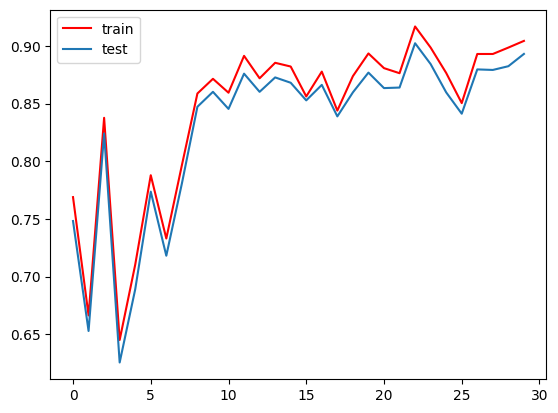

In [41]:
plt.plot(range(30), result_nono[0]["train_acc"], color="r")
plt.plot(range(30), result_nono[0]["test_acc"])
plt.legend(["train","test"])

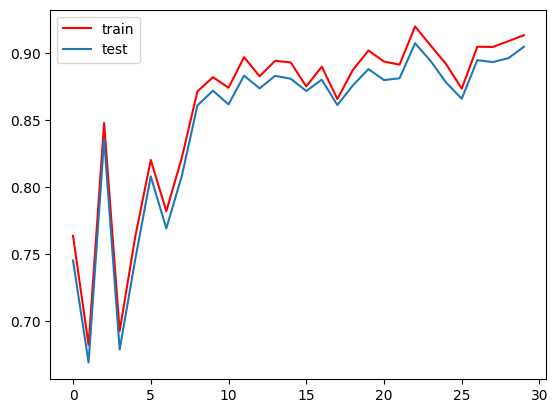

In [42]:
plt.plot(range(30), result_nono[0]["train_f1"], color="r")
plt.plot(range(30), result_nono[0]["test_f1"])
plt.legend(["train","test"])

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X_nono,y_nono,test_size=1/3,random_state=42, stratify=y_nono)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_nono=MLP(512,128,4).to(device)
optimizer_nono=torch.optim.Adam(model_nono.parameters(), lr=1e-3)
loss_fn_nono=nn.CrossEntropyLoss(torch.tensor(weight_nono, dtype=torch.float32))

print("No T & No B")
result_nono.append(train_test_all_epoch("No T & No B",model_nono, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nono, loss_fn_nono, device)) 

No T & No B


  3%|█▍                                          | 1/30 [00:01<00:43,  1.50s/it]

Epoca:  0  Train acc:  0.6586382584529875  Test acc:  0.6569444444444444
Train loss:  1.3456504344940186  Test loss:  1.3473725318908691
Train f1:  0.5479182565515327  Test f1:  0.5463473772513501


  7%|██▉                                         | 2/30 [00:02<00:27,  1.03it/s]

Epoca:  1  Train acc:  0.5778138026864289  Test acc:  0.5453703703703704
Train loss:  1.24753737449646  Test loss:  1.2526041269302368
Train f1:  0.5919805391863626  Test f1:  0.56188062424484


 10%|████▍                                       | 3/30 [00:04<00:39,  1.44s/it]

Epoca:  2  Train acc:  0.7373784159333024  Test acc:  0.7171296296296297
Train loss:  1.0270203351974487  Test loss:  1.0386584997177124
Train f1:  0.7754869302957534  Test f1:  0.7596084794975927


 13%|█████▊                                      | 4/30 [00:05<00:41,  1.58s/it]

Epoca:  3  Train acc:  0.6977767484946734  Test acc:  0.6805555555555556
Train loss:  0.7910223603248596  Test loss:  0.8069352507591248
Train f1:  0.7491244968164387  Test f1:  0.7364682729841889


 17%|███████▎                                    | 5/30 [00:07<00:40,  1.62s/it]

Epoca:  4  Train acc:  0.8355720240852247  Test acc:  0.8138888888888889
Train loss:  0.5968890190124512  Test loss:  0.6202458739280701
Train f1:  0.8524249469732682  Test f1:  0.8341068573925887


 20%|████████▊                                   | 6/30 [00:09<00:41,  1.75s/it]

Epoca:  5  Train acc:  0.834414080592867  Test acc:  0.825925925925926
Train loss:  0.49677574634552  Test loss:  0.5193077325820923
Train f1:  0.8570627717115982  Test f1:  0.8493529432752521


 23%|██████████▎                                 | 7/30 [00:10<00:35,  1.52s/it]

Epoca:  6  Train acc:  0.881194997684113  Test acc:  0.8634259259259259
Train loss:  0.4607482850551605  Test loss:  0.489122599363327
Train f1:  0.8884160004735282  Test f1:  0.872254474206002


 27%|███████████▋                                | 8/30 [00:11<00:29,  1.35s/it]

Epoca:  7  Train acc:  0.7809170912459472  Test acc:  0.7578703703703704
Train loss:  0.4363488554954529  Test loss:  0.45371806621551514
Train f1:  0.8214212353921713  Test f1:  0.801848154240686


 30%|█████████████▏                              | 9/30 [00:12<00:24,  1.19s/it]

Epoca:  8  Train acc:  0.8911533117183882  Test acc:  0.8722222222222222
Train loss:  0.36735084652900696  Test loss:  0.3914370834827423
Train f1:  0.8988499563867448  Test f1:  0.8823003620046169


 33%|██████████████▎                            | 10/30 [00:13<00:24,  1.21s/it]

Epoca:  9  Train acc:  0.8439092172301992  Test acc:  0.8310185185185185
Train loss:  0.3640853464603424  Test loss:  0.3887890577316284
Train f1:  0.8648039766575917  Test f1:  0.8532621242013447


 37%|███████████████▊                           | 11/30 [00:14<00:19,  1.02s/it]

Epoca:  10  Train acc:  0.8763316350162113  Test acc:  0.8652777777777778
Train loss:  0.3332797586917877  Test loss:  0.35449275374412537
Train f1:  0.888495386777846  Test f1:  0.8792483716674829


 40%|█████████████████▏                         | 12/30 [00:15<00:21,  1.19s/it]

Epoca:  11  Train acc:  0.88073182028717  Test acc:  0.862037037037037
Train loss:  0.31005388498306274  Test loss:  0.32852500677108765
Train f1:  0.8932710627356114  Test f1:  0.8782067318918723


 43%|██████████████████▋                        | 13/30 [00:17<00:23,  1.38s/it]

Epoca:  12  Train acc:  0.881194997684113  Test acc:  0.8671296296296296
Train loss:  0.30635738372802734  Test loss:  0.3234824240207672
Train f1:  0.8961936379397504  Test f1:  0.8848950252719012


 47%|████████████████████                       | 14/30 [00:18<00:21,  1.33s/it]

Epoca:  13  Train acc:  0.8855951829550718  Test acc:  0.8703703703703703
Train loss:  0.30426040291786194  Test loss:  0.3191149830818176
Train f1:  0.899303899843668  Test f1:  0.8871909181593404


 50%|█████████████████████▌                     | 15/30 [00:20<00:20,  1.39s/it]

Epoca:  14  Train acc:  0.8716998610467809  Test acc:  0.8550925925925926
Train loss:  0.27573615312576294  Test loss:  0.2910594344139099
Train f1:  0.8889676261545626  Test f1:  0.8753772044733578


 53%|██████████████████████▉                    | 16/30 [00:21<00:17,  1.26s/it]

Epoca:  15  Train acc:  0.8742473367299676  Test acc:  0.8601851851851852
Train loss:  0.2652360200881958  Test loss:  0.28161701560020447
Train f1:  0.8912842936152806  Test f1:  0.8805378527308159


 57%|████████████████████████▎                  | 17/30 [00:22<00:17,  1.36s/it]

Epoca:  16  Train acc:  0.9147753589624826  Test acc:  0.9046296296296297
Train loss:  0.26456108689308167  Test loss:  0.28074994683265686
Train f1:  0.919207712516162  Test f1:  0.9107610014676896


 60%|█████████████████████████▊                 | 18/30 [00:24<00:17,  1.49s/it]

Epoca:  17  Train acc:  0.9233441408059286  Test acc:  0.9125
Train loss:  0.26764005422592163  Test loss:  0.28339511156082153
Train f1:  0.925886665574059  Test f1:  0.9159125374547115


 63%|███████████████████████████▏               | 19/30 [00:25<00:12,  1.17s/it]

Epoca:  18  Train acc:  0.881194997684113  Test acc:  0.8694444444444445
Train loss:  0.2619139552116394  Test loss:  0.27802878618240356
Train f1:  0.8978289601319425  Test f1:  0.8887729222834215


 67%|████████████████████████████▋              | 20/30 [00:26<00:11,  1.13s/it]

Epoca:  19  Train acc:  0.8485409911996294  Test acc:  0.8337962962962963
Train loss:  0.2614077925682068  Test loss:  0.2708429992198944
Train f1:  0.8738548361227523  Test f1:  0.862440356469676


 70%|██████████████████████████████             | 21/30 [00:28<00:12,  1.38s/it]

Epoca:  20  Train acc:  0.9113015284854099  Test acc:  0.899537037037037
Train loss:  0.25101035833358765  Test loss:  0.2632617652416229
Train f1:  0.9189928582345468  Test f1:  0.9092382786372194


 73%|███████████████████████████████▌           | 22/30 [00:29<00:11,  1.39s/it]

Epoca:  21  Train acc:  0.8540991199629459  Test acc:  0.836574074074074
Train loss:  0.26689010858535767  Test loss:  0.27798905968666077
Train f1:  0.8759100627144057  Test f1:  0.8622286641514156


 77%|████████████████████████████████▉          | 23/30 [00:31<00:10,  1.53s/it]

Epoca:  22  Train acc:  0.9219546086150996  Test acc:  0.9078703703703703
Train loss:  0.21518903970718384  Test loss:  0.2287193238735199
Train f1:  0.9285975933884558  Test f1:  0.9177397563202917


 80%|██████████████████████████████████▍        | 24/30 [00:34<00:11,  1.89s/it]

Epoca:  23  Train acc:  0.9124594719777674  Test acc:  0.899074074074074
Train loss:  0.20502986013889313  Test loss:  0.21591618657112122
Train f1:  0.9209052016316513  Test f1:  0.9105573738349357


 83%|███████████████████████████████████▊       | 25/30 [00:36<00:10,  2.02s/it]

Epoca:  24  Train acc:  0.9291338582677166  Test acc:  0.9254629629629629
Train loss:  0.22085042297840118  Test loss:  0.23057043552398682
Train f1:  0.9327191682313181  Test f1:  0.9296093199840365


 87%|█████████████████████████████████████▎     | 26/30 [00:37<00:06,  1.64s/it]

Epoca:  25  Train acc:  0.8835108846688282  Test acc:  0.8708333333333333
Train loss:  0.22208991646766663  Test loss:  0.2328891009092331
Train f1:  0.8989844394222918  Test f1:  0.8889222638390536


 90%|██████████████████████████████████████▋    | 27/30 [00:40<00:06,  2.04s/it]

Epoca:  26  Train acc:  0.8661417322834646  Test acc:  0.8518518518518519
Train loss:  0.21144236624240875  Test loss:  0.22453801333904266
Train f1:  0.8867375666530283  Test f1:  0.8758029286579523


 93%|████████████████████████████████████████▏  | 28/30 [00:42<00:04,  2.07s/it]

Epoca:  27  Train acc:  0.9078276980083372  Test acc:  0.8875
Train loss:  0.21001386642456055  Test loss:  0.22120746970176697
Train f1:  0.9174696694491712  Test f1:  0.9010082511215345


 97%|█████████████████████████████████████████▌ | 29/30 [00:43<00:01,  1.86s/it]

Epoca:  28  Train acc:  0.9381658175081056  Test acc:  0.9328703703703703
Train loss:  0.20435211062431335  Test loss:  0.21537430584430695
Train f1:  0.940301477804367  Test f1:  0.9360622157416955


100%|███████████████████████████████████████████| 30/30 [00:45<00:00,  1.53s/it]

Epoca:  29  Train acc:  0.944650301065308  Test acc:  0.937962962962963
Train loss:  0.20257386565208435  Test loss:  0.21520696580410004
Train f1:  0.9460473731895042  Test f1:  0.9406580987605476


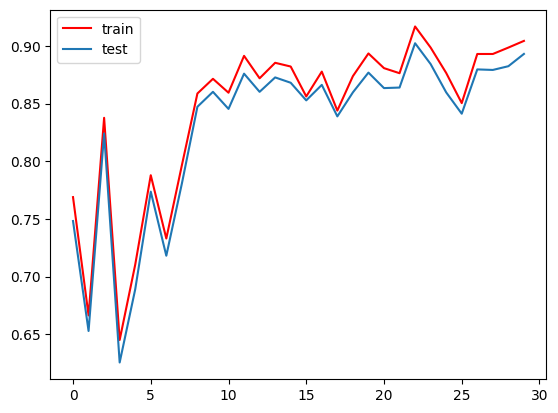

In [44]:
plt.plot(range(30), result_nono[0]["train_acc"], color="r")
plt.plot(range(30), result_nono[0]["test_acc"])
plt.legend(["train","test"])

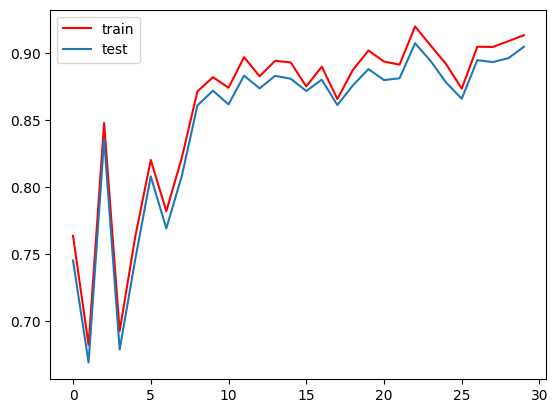

In [45]:
plt.plot(range(30), result_nono[0]["train_f1"], color="r")
plt.plot(range(30), result_nono[0]["test_f1"])
plt.legend(["train","test"])

#### IgD-

In [46]:
epocas=30
result_igd=[]
y_igd=y3[(y1==0)&(y2==2)]
X_igd=X[(y1==0)&(y2==2)]
pd.DataFrame(y_igd).value_counts()*100/len(y_igd)

0
0    64.848239
1    35.151761
Name: count, dtype: float64

In [47]:
weight_igd=np.array([0.648, 0.352])
weight_igd=np.sum(weight_igd)/(len(weight_igd)*weight_igd)
weight_igd

array([0.77160494, 1.42045455])

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X_igd,y_igd,test_size=1/3,random_state=42, stratify=y_igd)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_igd=MLP(128,32,2).to(device)
optimizer_igd=torch.optim.Adam(model_igd.parameters(), lr=1e-3)
loss_fn_igd=nn.CrossEntropyLoss(torch.tensor(weight_igd, dtype=torch.float32))

print("IgD-")
result_igd.append(train_test_all_epoch("IgD-",model_igd, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_igd, loss_fn_igd, device)) 

IgD-


  3%|█▍                                          | 1/30 [00:05<02:48,  5.82s/it]

Epoca:  0  Train acc:  0.907021406154855  Test acc:  0.9053864168618267
Train loss:  0.3526466190814972  Test loss:  0.35234591364860535
Train f1:  0.9084859578766914  Test f1:  0.9069417925417925


  7%|██▉                                         | 2/30 [00:10<02:22,  5.10s/it]

Epoca:  1  Train acc:  0.9500679188720783  Test acc:  0.9499765807962529
Train loss:  0.1759149432182312  Test loss:  0.17240476608276367
Train f1:  0.9501731928426148  Test f1:  0.9501348228220101


 10%|████▍                                       | 3/30 [00:14<02:00,  4.47s/it]

Epoca:  2  Train acc:  0.945524380533046  Test acc:  0.9417330210772834
Train loss:  0.15618380904197693  Test loss:  0.1548653542995453
Train f1:  0.9459157370005082  Test f1:  0.9422105333083582


 13%|█████▊                                      | 4/30 [00:21<02:24,  5.56s/it]

Epoca:  3  Train acc:  0.954236732399644  Test acc:  0.9505386416861826
Train loss:  0.14338141679763794  Test loss:  0.14117753505706787
Train f1:  0.9544276177005535  Test f1:  0.9508130426950099


 17%|███████▎                                    | 5/30 [00:27<02:19,  5.59s/it]

Epoca:  4  Train acc:  0.9595765609630428  Test acc:  0.9582201405152225
Train loss:  0.1361793577671051  Test loss:  0.1331024020910263
Train f1:  0.9596364684859366  Test f1:  0.9583310422712396


 20%|████████▊                                   | 6/30 [00:30<01:56,  4.86s/it]

Epoca:  5  Train acc:  0.9622933158461755  Test acc:  0.9614988290398127
Train loss:  0.13340555131435394  Test loss:  0.12965047359466553
Train f1:  0.9622811903019134  Test f1:  0.9615117010257777


 23%|██████████▎                                 | 7/30 [00:36<01:59,  5.19s/it]

Epoca:  6  Train acc:  0.9636985338891751  Test acc:  0.9638407494145199
Train loss:  0.13220295310020447  Test loss:  0.1280204951763153
Train f1:  0.9636288435726617  Test f1:  0.9637845281051042


 27%|███████████▋                                | 8/30 [00:40<01:48,  4.95s/it]

Epoca:  7  Train acc:  0.9634174902805752  Test acc:  0.9617798594847775
Train loss:  0.12134504318237305  Test loss:  0.11779967695474625
Train f1:  0.9634434839665015  Test f1:  0.9618370897668203


 30%|█████████████▏                              | 9/30 [00:44<01:38,  4.69s/it]

Epoca:  8  Train acc:  0.963230127874842  Test acc:  0.9610304449648712
Train loss:  0.11606036871671677  Test loss:  0.1128884106874466
Train f1:  0.9632900110862052  Test f1:  0.9611294412406315


 33%|██████████████▎                            | 10/30 [00:51<01:48,  5.41s/it]

Epoca:  9  Train acc:  0.9662279263665745  Test acc:  0.9668384074941452
Train loss:  0.11920791864395142  Test loss:  0.11484339833259583
Train f1:  0.966139177379019  Test f1:  0.9667506850677762


 37%|███████████████▊                           | 11/30 [00:55<01:34,  4.99s/it]

Epoca:  10  Train acc:  0.9618249098318422  Test acc:  0.9609367681498829
Train loss:  0.10960095375776291  Test loss:  0.10765872150659561
Train f1:  0.961975795594095  Test f1:  0.9611422045285052


 40%|█████████████████▏                         | 12/30 [01:02<01:38,  5.49s/it]

Epoca:  11  Train acc:  0.962808562461942  Test acc:  0.9622482435597189
Train loss:  0.10434475541114807  Test loss:  0.10280488431453705
Train f1:  0.962963186633749  Test f1:  0.962444790322833


 43%|██████████████████▋                        | 13/30 [01:05<01:19,  4.65s/it]

Epoca:  12  Train acc:  0.9676331444095743  Test acc:  0.9672131147540983
Train loss:  0.09507612884044647  Test loss:  0.09227991849184036
Train f1:  0.9676868036548935  Test f1:  0.9673001452801209


 47%|████████████████████                       | 14/30 [01:10<01:19,  4.95s/it]

Epoca:  13  Train acc:  0.968335753431074  Test acc:  0.9698360655737704
Train loss:  0.11633789539337158  Test loss:  0.11141909658908844
Train f1:  0.968136656498037  Test f1:  0.9696484314662448


 50%|█████████████████████▌                     | 15/30 [01:15<01:13,  4.87s/it]

Epoca:  14  Train acc:  0.9657595203522413  Test acc:  0.9644964871194379
Train loss:  0.08980643004179001  Test loss:  0.08902102708816528
Train f1:  0.9659226836208898  Test f1:  0.9646962322120951


 53%|██████████████████████▉                    | 16/30 [01:21<01:12,  5.20s/it]

Epoca:  15  Train acc:  0.9717082767342733  Test acc:  0.9726463700234192
Train loss:  0.0795939639210701  Test loss:  0.07712827622890472
Train f1:  0.9717211495210283  Test f1:  0.9726808802705889


 57%|████████████████████████▎                  | 17/30 [01:25<01:03,  4.86s/it]

Epoca:  16  Train acc:  0.973254016581573  Test acc:  0.9740515222482435
Train loss:  0.07484322786331177  Test loss:  0.07291506230831146
Train f1:  0.9732641673857114  Test f1:  0.9740819559523055


 60%|█████████████████████████▊                 | 18/30 [01:29<00:53,  4.42s/it]

Epoca:  17  Train acc:  0.9743781910159727  Test acc:  0.9752693208430914
Train loss:  0.07576847821474075  Test loss:  0.07277514040470123
Train f1:  0.9743330861542442  Test f1:  0.9752371174890555


 63%|███████████████████████████▏               | 19/30 [01:35<00:53,  4.90s/it]

Epoca:  18  Train acc:  0.9479600918075788  Test acc:  0.943231850117096
Train loss:  0.11597861349582672  Test loss:  0.11737329512834549
Train f1:  0.9486108669494147  Test f1:  0.9440023830448999


 67%|████████████████████████████▋              | 20/30 [01:38<00:45,  4.56s/it]

Epoca:  19  Train acc:  0.9762518150733055  Test acc:  0.9763934426229508
Train loss:  0.06599356979131699  Test loss:  0.06428675353527069
Train f1:  0.9762449081531149  Test f1:  0.9764020491707733


 70%|██████████████████████████████             | 21/30 [01:43<00:42,  4.74s/it]

Epoca:  20  Train acc:  0.9750808000374724  Test acc:  0.9751756440281031
Train loss:  0.06629467755556107  Test loss:  0.06597179174423218
Train f1:  0.9751713968863553  Test f1:  0.9752768679597515


 73%|███████████████████████████████▌           | 22/30 [01:48<00:37,  4.74s/it]

Epoca:  21  Train acc:  0.9751276406389058  Test acc:  0.9749882903981265
Train loss:  0.0632929652929306  Test loss:  0.06268485635519028
Train f1:  0.9752128882332692  Test f1:  0.9750875388052119


 77%|████████████████████████████████▉          | 23/30 [01:52<00:32,  4.59s/it]

Epoca:  22  Train acc:  0.9772823083048386  Test acc:  0.9771428571428571
Train loss:  0.05847711116075516  Test loss:  0.05749707669019699
Train f1:  0.9773193062124961  Test f1:  0.9772035298524271


 80%|██████████████████████████████████▍        | 24/30 [01:58<00:28,  4.76s/it]

Epoca:  23  Train acc:  0.9786875263478383  Test acc:  0.9800468384074942
Train loss:  0.05700746551156044  Test loss:  0.055454839020967484
Train f1:  0.9786747552189295  Test f1:  0.9800510899229602


 83%|███████████████████████████████████▊       | 25/30 [02:03<00:25,  5.01s/it]

Epoca:  24  Train acc:  0.9795306571736381  Test acc:  0.9795784543325526
Train loss:  0.05451167747378349  Test loss:  0.05400323495268822
Train f1:  0.9795603912003967  Test f1:  0.979629164570656


 87%|█████████████████████████████████████▎     | 26/30 [02:06<00:16,  4.25s/it]

Epoca:  25  Train acc:  0.9786875263478383  Test acc:  0.9811709601873536
Train loss:  0.06320206820964813  Test loss:  0.06103255972266197
Train f1:  0.9786154829962626  Test f1:  0.9811094551629682


 90%|██████████████████████████████████████▋    | 27/30 [02:13<00:15,  5.23s/it]

Epoca:  26  Train acc:  0.9785938451449716  Test acc:  0.9777985948477752
Train loss:  0.05289700627326965  Test loss:  0.05228425934910774
Train f1:  0.978650334734701  Test f1:  0.9778719358788445


 93%|████████████████████████████████████████▏  | 28/30 [02:17<00:09,  4.94s/it]

Epoca:  27  Train acc:  0.9814511218324043  Test acc:  0.9828571428571429
Train loss:  0.05087984353303909  Test loss:  0.050109490752220154
Train f1:  0.9814391449981447  Test f1:  0.9828555715039858


 97%|█████████████████████████████████████████▌ | 29/30 [02:23<00:05,  5.08s/it]

Epoca:  28  Train acc:  0.9807485128109045  Test acc:  0.9804215456674473
Train loss:  0.049310170114040375  Test loss:  0.04896444082260132
Train f1:  0.9807938132588979  Test f1:  0.9804762973679523


100%|███████████████████████████████████████████| 30/30 [02:29<00:00,  4.97s/it]

Epoca:  29  Train acc:  0.9815916436367043  Test acc:  0.981639344262295
Train loss:  0.04922192543745041  Test loss:  0.049358151853084564
Train f1:  0.981648037874682  Test f1:  0.9816912109185034


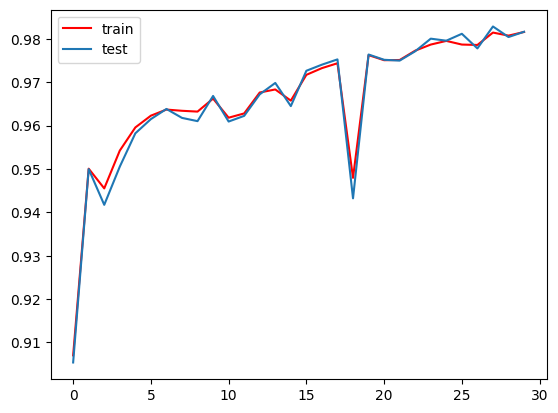

In [49]:
plt.plot(range(30), result_igd[0]["train_acc"], color="r")
plt.plot(range(30), result_igd[0]["test_acc"])
plt.legend(["train","test"])

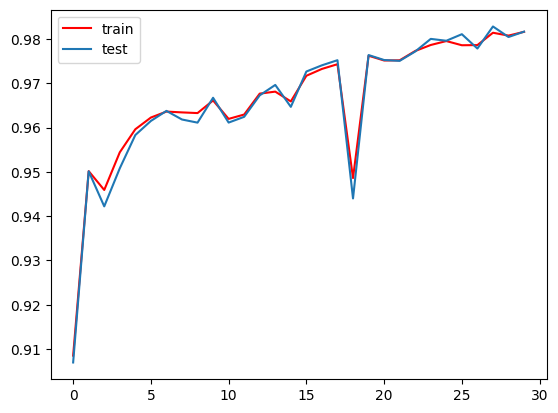

In [50]:
plt.plot(range(30), result_igd[0]["train_f1"], color="r")
plt.plot(range(30), result_igd[0]["test_f1"])
plt.legend(["train","test"])

#### NKT

In [51]:
epocas=30
result_nkt=[]
y_nkt=y3[(y1==1)&(y2==0)]
X_nkt=X[(y1==1)&(y2==0)]
pd.DataFrame(y_nkt).value_counts()*100/len(y_nkt)

0
1    71.644086
4    12.515562
2     9.256683
3     4.232882
0     2.350787
Name: count, dtype: float64

In [52]:
weight_nkt=np.array([0.024, 0.716, 0.093, 0.042, 0.125])
weight_nkt=np.sum(weight_nkt)/(len(weight_nkt)*weight_nkt)
weight_nkt

array([8.33333333, 0.27932961, 2.15053763, 4.76190476, 1.6       ])

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X_nkt,y_nkt,test_size=1/3,random_state=42, stratify=y_nkt)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_nkt=MLP(512,128,5).to(device)
optimizer_nkt=torch.optim.Adam(model_nkt.parameters(), lr=1e-3)
loss_fn_nkt=nn.CrossEntropyLoss(torch.tensor(weight_nkt, dtype=torch.float32))

print("NKT")
result_nkt.append(train_test_all_epoch("NKT",model_nkt, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nkt, loss_fn_nkt, device)) 

NKT


  3%|█▍                                          | 1/30 [00:01<00:56,  1.96s/it]

Epoca:  0  Train acc:  0.2984730308689443  Test acc:  0.30008787346221444
Train loss:  1.5517698526382446  Test loss:  1.5505921840667725
Train f1:  0.2512423170613286  Test f1:  0.25160732565280775


  7%|██▉                                         | 2/30 [00:04<01:04,  2.31s/it]

Epoca:  1  Train acc:  0.35076348456552786  Test acc:  0.3541300527240773
Train loss:  1.3750572204589844  Test loss:  1.3688220977783203
Train f1:  0.32790045308836535  Test f1:  0.3286791735126072


 10%|████▍                                       | 3/30 [00:07<01:14,  2.76s/it]

Epoca:  2  Train acc:  0.41524772053169284  Test acc:  0.4211335676625659
Train loss:  1.1934049129486084  Test loss:  1.179055094718933
Train f1:  0.42010174532603994  Test f1:  0.42610865386415114


 13%|█████▊                                      | 4/30 [00:10<01:12,  2.80s/it]

Epoca:  3  Train acc:  0.2544216192464023  Test acc:  0.2565905096660808
Train loss:  1.1152905225753784  Test loss:  1.0917805433273315
Train f1:  0.22828921763516954  Test f1:  0.22167253560135522


 17%|███████▎                                    | 5/30 [00:12<01:03,  2.52s/it]

Epoca:  4  Train acc:  0.47138306052949575  Test acc:  0.48088752196836554
Train loss:  1.0343481302261353  Test loss:  1.0125101804733276
Train f1:  0.48366453611161997  Test f1:  0.49266082896107855


 20%|████████▊                                   | 6/30 [00:15<00:59,  2.46s/it]

Epoca:  5  Train acc:  0.6151818081951005  Test acc:  0.6078646748681898
Train loss:  0.9561150670051575  Test loss:  0.9340925812721252
Train f1:  0.638890694067544  Test f1:  0.6303539383724839


 23%|██████████▎                                 | 7/30 [00:18<01:00,  2.63s/it]

Epoca:  6  Train acc:  0.6222124574316159  Test acc:  0.6126977152899824
Train loss:  0.8912596106529236  Test loss:  0.8725736737251282
Train f1:  0.6473051335016436  Test f1:  0.6357000234445694


 27%|███████████▋                                | 8/30 [00:19<00:52,  2.41s/it]

Epoca:  7  Train acc:  0.7866637372294848  Test acc:  0.7847100175746925
Train loss:  0.9008562564849854  Test loss:  0.8882889747619629
Train f1:  0.7989290600496823  Test f1:  0.7969071120510357


 30%|█████████████▏                              | 9/30 [00:25<01:12,  3.44s/it]

Epoca:  8  Train acc:  0.655168625727782  Test acc:  0.6443321616871704
Train loss:  0.8154029846191406  Test loss:  0.8024268746376038
Train f1:  0.6771106117541756  Test f1:  0.6656608048968271


 33%|██████████████▎                            | 10/30 [00:28<01:03,  3.18s/it]

Epoca:  9  Train acc:  0.8529056355047786  Test acc:  0.8503954305799648
Train loss:  0.7854031920433044  Test loss:  0.7766492366790771
Train f1:  0.8574681279913992  Test f1:  0.8545934688977297


 37%|███████████████▊                           | 11/30 [00:30<00:54,  2.87s/it]

Epoca:  10  Train acc:  0.6498956388003955  Test acc:  0.6513620386643234
Train loss:  0.7825756072998047  Test loss:  0.77302086353302
Train f1:  0.6899522259869217  Test f1:  0.6893613729637953


 40%|█████████████████▏                         | 12/30 [00:38<01:19,  4.42s/it]

Epoca:  11  Train acc:  0.7239371635724486  Test acc:  0.7174868189806678
Train loss:  0.7058969736099243  Test loss:  0.696624755859375
Train f1:  0.7550753136058045  Test f1:  0.7486255995485038


 43%|██████████████████▋                        | 13/30 [00:44<01:22,  4.83s/it]

Epoca:  12  Train acc:  0.8091837855651983  Test acc:  0.8090949033391915
Train loss:  0.6543799638748169  Test loss:  0.6477141976356506
Train f1:  0.8206980370346338  Test f1:  0.8199028029710964


 47%|████████████████████                       | 14/30 [00:49<01:21,  5.11s/it]

Epoca:  13  Train acc:  0.7471163352740855  Test acc:  0.7451669595782073
Train loss:  0.6497200727462769  Test loss:  0.6494230031967163
Train f1:  0.7658670793766188  Test f1:  0.7627385760249169


 50%|█████████████████████▌                     | 15/30 [00:51<01:01,  4.08s/it]

Epoca:  14  Train acc:  0.8530154893990992  Test acc:  0.8446836555360281
Train loss:  0.584626317024231  Test loss:  0.5840108394622803
Train f1:  0.8649372470461175  Test f1:  0.8571207400829287


 53%|██████████████████████▉                    | 16/30 [00:52<00:43,  3.14s/it]

Epoca:  15  Train acc:  0.870042843018785  Test acc:  0.859402460456942
Train loss:  0.6898373365402222  Test loss:  0.686962902545929
Train f1:  0.8771176559119227  Test f1:  0.867485645851726


 57%|████████████████████████▎                  | 17/30 [00:54<00:34,  2.69s/it]

Epoca:  16  Train acc:  0.8088542238822366  Test acc:  0.8016256590509666
Train loss:  0.5541508197784424  Test loss:  0.554641604423523
Train f1:  0.8288621678544509  Test f1:  0.8209915042453868


 60%|█████████████████████████▊                 | 18/30 [00:57<00:35,  2.93s/it]

Epoca:  17  Train acc:  0.8919037679885752  Test acc:  0.8818101933216169
Train loss:  0.5413884520530701  Test loss:  0.5419248342514038
Train f1:  0.8972125132100999  Test f1:  0.8877588602634513


 63%|███████████████████████████▏               | 19/30 [00:59<00:29,  2.69s/it]

Epoca:  18  Train acc:  0.8251126002416785  Test acc:  0.8211775043936731
Train loss:  0.5569729804992676  Test loss:  0.5494198799133301
Train f1:  0.8376170517444883  Test f1:  0.8340526722451406


 67%|████████████████████████████▋              | 20/30 [01:02<00:27,  2.70s/it]

Epoca:  19  Train acc:  0.8842139953861364  Test acc:  0.8730228471001757
Train loss:  0.49644041061401367  Test loss:  0.5052834749221802
Train f1:  0.8884854465464509  Test f1:  0.8780705495408031


 70%|██████████████████████████████             | 21/30 [01:05<00:25,  2.84s/it]

Epoca:  20  Train acc:  0.8571899373832802  Test acc:  0.8508347978910369
Train loss:  0.48155879974365234  Test loss:  0.49416518211364746
Train f1:  0.8643252002837813  Test f1:  0.8584366421193562


 73%|███████████████████████████████▌           | 22/30 [01:08<00:22,  2.77s/it]

Epoca:  21  Train acc:  0.8837745798088542  Test acc:  0.8739015817223199
Train loss:  0.4564303159713745  Test loss:  0.4635401964187622
Train f1:  0.8905032516791976  Test f1:  0.8817207005199948


 77%|████████████████████████████████▉          | 23/30 [01:10<00:18,  2.71s/it]

Epoca:  22  Train acc:  0.8716906514335934  Test acc:  0.8648945518453427
Train loss:  0.4450549781322479  Test loss:  0.4473736584186554
Train f1:  0.8872205949307707  Test f1:  0.8799159980670711


 80%|██████████████████████████████████▍        | 24/30 [01:13<00:16,  2.79s/it]

Epoca:  23  Train acc:  0.8747665604745688  Test acc:  0.8653339191564148
Train loss:  0.44263386726379395  Test loss:  0.455565869808197
Train f1:  0.8880999342399644  Test f1:  0.8786304004767881


 83%|███████████████████████████████████▊       | 25/30 [01:15<00:12,  2.50s/it]

Epoca:  24  Train acc:  0.8943205536636274  Test acc:  0.8877416520210897
Train loss:  0.41723373532295227  Test loss:  0.4225456416606903
Train f1:  0.906688629935985  Test f1:  0.9001101353211679


 87%|█████████████████████████████████████▎     | 26/30 [01:17<00:09,  2.34s/it]

Epoca:  25  Train acc:  0.9209051960892014  Test acc:  0.9116871704745168
Train loss:  0.4139474630355835  Test loss:  0.42721980810165405
Train f1:  0.9237655858629049  Test f1:  0.9152663375765949


 90%|██████████████████████████████████████▋    | 27/30 [01:18<00:05,  1.93s/it]

Epoca:  26  Train acc:  0.9224431506096891  Test acc:  0.9130052724077329
Train loss:  0.4041752815246582  Test loss:  0.4174825847148895
Train f1:  0.9245864402398716  Test f1:  0.9154134090764651


 93%|████████████████████████████████████████▏  | 28/30 [01:20<00:03,  1.78s/it]

Epoca:  27  Train acc:  0.8209381522574976  Test acc:  0.81304920913884
Train loss:  0.45565131306648254  Test loss:  0.4759446084499359
Train f1:  0.8400015385735554  Test f1:  0.8319978012535152


 97%|█████████████████████████████████████████▌ | 29/30 [01:24<00:02,  2.68s/it]

Epoca:  28  Train acc:  0.8199494672086125  Test acc:  0.812609841827768
Train loss:  0.4233058989048004  Test loss:  0.4401290714740753
Train f1:  0.8413167969847808  Test f1:  0.8337886016580984


100%|███████████████████████████████████████████| 30/30 [01:28<00:00,  2.94s/it]

Epoca:  29  Train acc:  0.9153026474788531  Test acc:  0.9090509666080844
Train loss:  0.3651926815509796  Test loss:  0.3721213638782501
Train f1:  0.9214961538714548  Test f1:  0.9150270001104582


In [54]:
X_train, X_test, y_train, y_test=train_test_split(X_nkt,y_nkt,test_size=1/3,random_state=42, stratify=y_nkt)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=64, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=64,num_workers=8, shuffle=True)

model_nkt=MLP(512,128,5).to(device)
optimizer_nkt=torch.optim.Adam(model_nkt.parameters(), lr=1e-3)
loss_fn_nkt=nn.CrossEntropyLoss(torch.tensor(weight_nkt, dtype=torch.float32))

print("NKT")
result_nkt.append(train_test_all_epoch("NKT",model_nkt, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nkt, loss_fn_nkt, device)) 

NKT


  3%|█▍                                          | 1/30 [00:02<01:01,  2.12s/it]

Epoca:  0  Train acc:  0.44666593430737117  Test acc:  0.45518453427065025
Train loss:  1.2619746923446655  Test loss:  1.2614667415618896
Train f1:  0.4542065077118543  Test f1:  0.460433702924338


  7%|██▉                                         | 2/30 [00:11<03:06,  6.65s/it]

Epoca:  1  Train acc:  0.34746786773591126  Test acc:  0.34973637961335674
Train loss:  1.1409878730773926  Test loss:  1.1228889226913452
Train f1:  0.321149792540304  Test f1:  0.3240384506780867


 10%|████▍                                       | 3/30 [00:15<02:20,  5.19s/it]

Epoca:  2  Train acc:  0.7989673733933867  Test acc:  0.7952548330404218
Train loss:  1.038787603378296  Test loss:  1.0425833463668823
Train f1:  0.7941087321940596  Test f1:  0.7911318102560183


 13%|█████▊                                      | 4/30 [00:19<02:01,  4.68s/it]

Epoca:  3  Train acc:  0.8398330220806327  Test acc:  0.835896309314587
Train loss:  0.8394156098365784  Test loss:  0.8387279510498047
Train f1:  0.8432052499604135  Test f1:  0.8400728326014679


 17%|███████▎                                    | 5/30 [00:25<02:06,  5.07s/it]

Epoca:  4  Train acc:  0.7763374711633527  Test acc:  0.7787785588752196
Train loss:  0.7032222747802734  Test loss:  0.6878582835197449
Train f1:  0.8064640562288399  Test f1:  0.8080458450625074


 20%|████████▊                                   | 6/30 [00:29<01:53,  4.71s/it]

Epoca:  5  Train acc:  0.8785015928814677  Test acc:  0.8734622144112478
Train loss:  0.6421107649803162  Test loss:  0.6364591717720032
Train f1:  0.8869100548243858  Test f1:  0.8816180589591526


 23%|██████████▎                                 | 7/30 [00:30<01:24,  3.66s/it]

Epoca:  6  Train acc:  0.8920136218828958  Test acc:  0.882688927943761
Train loss:  0.5465326905250549  Test loss:  0.549510657787323
Train f1:  0.8954864308476752  Test f1:  0.8866262990403407


 27%|███████████▋                                | 8/30 [00:35<01:29,  4.07s/it]

Epoca:  7  Train acc:  0.8835548720202131  Test acc:  0.8776362038664324
Train loss:  0.5744832158088684  Test loss:  0.5681403279304504
Train f1:  0.8878022653123364  Test f1:  0.8827464338901042


 30%|█████████████▏                              | 9/30 [00:40<01:33,  4.47s/it]

Epoca:  8  Train acc:  0.8318136877952323  Test acc:  0.8238137082601055
Train loss:  0.4843946099281311  Test loss:  0.4790699779987335
Train f1:  0.8472908150236677  Test f1:  0.8391816745648888


 33%|██████████████▎                            | 10/30 [00:42<01:14,  3.73s/it]

Epoca:  9  Train acc:  0.8891574206305614  Test acc:  0.8833479789103691
Train loss:  0.4487736225128174  Test loss:  0.43627408146858215
Train f1:  0.8967683123500857  Test f1:  0.8912726453023629


 37%|███████████████▊                           | 11/30 [00:46<01:10,  3.71s/it]

Epoca:  10  Train acc:  0.8263209930792047  Test acc:  0.8145869947275922
Train loss:  0.4754777252674103  Test loss:  0.46302518248558044
Train f1:  0.8367299521615709  Test f1:  0.8263803802668058


 40%|█████████████████▏                         | 12/30 [00:54<01:27,  4.86s/it]

Epoca:  11  Train acc:  0.9148632319015709  Test acc:  0.9154217926186292
Train loss:  0.4821588397026062  Test loss:  0.48879310488700867
Train f1:  0.9184994341646876  Test f1:  0.9184958769499154


 43%|██████████████████▋                        | 13/30 [01:04<01:50,  6.49s/it]

Epoca:  12  Train acc:  0.9174997253652643  Test acc:  0.9103690685413005
Train loss:  0.3674664795398712  Test loss:  0.37547340989112854
Train f1:  0.9226295274939773  Test f1:  0.9158819990034195


 47%|████████████████████                       | 14/30 [01:07<01:25,  5.36s/it]

Epoca:  13  Train acc:  0.8258815775019225  Test acc:  0.8148066783831283
Train loss:  0.4000720977783203  Test loss:  0.3989062011241913
Train f1:  0.8435811222048655  Test f1:  0.8333182600090338


 50%|█████████████████████▌                     | 15/30 [01:11<01:16,  5.13s/it]

Epoca:  14  Train acc:  0.9298033615291662  Test acc:  0.9237697715289982
Train loss:  0.4553145170211792  Test loss:  0.4587079882621765
Train f1:  0.9331367526232689  Test f1:  0.9283029279038004


 53%|██████████████████████▉                    | 16/30 [01:14<01:01,  4.39s/it]

Epoca:  15  Train acc:  0.8551027133911897  Test acc:  0.8466608084358523
Train loss:  0.5169808268547058  Test loss:  0.5131818652153015
Train f1:  0.8631677502441873  Test f1:  0.8554072812502779


 57%|████████████████████████▎                  | 17/30 [01:16<00:50,  3.86s/it]

Epoca:  16  Train acc:  0.8661979567175656  Test acc:  0.8567662565905096
Train loss:  0.3905998468399048  Test loss:  0.3927021026611328
Train f1:  0.8754062232183097  Test f1:  0.867026145837405


 60%|█████████████████████████▊                 | 18/30 [01:20<00:44,  3.69s/it]

Epoca:  17  Train acc:  0.8509282654070087  Test acc:  0.8411687170474517
Train loss:  0.39691853523254395  Test loss:  0.3928365707397461
Train f1:  0.8595917112640342  Test f1:  0.8505373883201743


 63%|███████████████████████████▏               | 19/30 [01:24<00:42,  3.84s/it]

Epoca:  18  Train acc:  0.9121168845435571  Test acc:  0.906195079086116
Train loss:  0.3461519479751587  Test loss:  0.3441917598247528
Train f1:  0.920127326413856  Test f1:  0.914849969155192


 67%|████████████████████████████▋              | 20/30 [01:30<00:45,  4.57s/it]

Epoca:  19  Train acc:  0.8822366252883664  Test acc:  0.8736818980667839
Train loss:  0.3521745800971985  Test loss:  0.35737892985343933
Train f1:  0.8889143576939316  Test f1:  0.8811042707955654


 70%|██████████████████████████████             | 21/30 [01:32<00:34,  3.85s/it]

Epoca:  20  Train acc:  0.8915742063056136  Test acc:  0.8848857644991213
Train loss:  0.3252825438976288  Test loss:  0.3283618688583374
Train f1:  0.9024928584466111  Test f1:  0.8963406913835535


 73%|███████████████████████████████▌           | 22/30 [01:38<00:34,  4.27s/it]

Epoca:  21  Train acc:  0.9272767219597935  Test acc:  0.9198154657293497
Train loss:  0.2915695905685425  Test loss:  0.30662310123443604
Train f1:  0.9395048849160096  Test f1:  0.9322040719644756


 77%|████████████████████████████████▉          | 23/30 [01:43<00:32,  4.66s/it]

Epoca:  22  Train acc:  0.9383719652861694  Test acc:  0.9347539543057997
Train loss:  0.30156761407852173  Test loss:  0.2984137237071991
Train f1:  0.9444991595163384  Test f1:  0.9407102145186143


 80%|██████████████████████████████████▍        | 24/30 [01:46<00:24,  4.11s/it]

Epoca:  23  Train acc:  0.9388113808634516  Test acc:  0.9360720562390158
Train loss:  0.32447344064712524  Test loss:  0.32235774397850037
Train f1:  0.9410420034071604  Test f1:  0.938923312496764


 83%|███████████████████████████████████▊       | 25/30 [01:48<00:17,  3.42s/it]

Epoca:  24  Train acc:  0.9193672415687136  Test acc:  0.9171792618629174
Train loss:  0.4338746964931488  Test loss:  0.44231030344963074
Train f1:  0.9218462891383892  Test f1:  0.9190725089497026


 87%|█████████████████████████████████████▎     | 26/30 [01:51<00:13,  3.46s/it]

Epoca:  25  Train acc:  0.9466110073602109  Test acc:  0.9431019332161688
Train loss:  0.28161337971687317  Test loss:  0.2940601110458374
Train f1:  0.9526110990124227  Test f1:  0.9485755427200304


 90%|██████████████████████████████████████▋    | 27/30 [01:57<00:12,  4.22s/it]

Epoca:  26  Train acc:  0.8961880698670768  Test acc:  0.8833479789103691
Train loss:  0.327698677778244  Test loss:  0.3698769509792328
Train f1:  0.9012436470448641  Test f1:  0.8894772224252236


 93%|████████████████████████████████████████▏  | 28/30 [02:00<00:07,  3.69s/it]

Epoca:  27  Train acc:  0.9419971437987477  Test acc:  0.9351933216168717
Train loss:  0.26237553358078003  Test loss:  0.27556106448173523
Train f1:  0.9449964389630132  Test f1:  0.9384869074695036


 97%|█████████████████████████████████████████▌ | 29/30 [02:05<00:04,  4.12s/it]

Epoca:  28  Train acc:  0.9125563001208393  Test acc:  0.9123462214411248
Train loss:  0.3561513423919678  Test loss:  0.3663163185119629
Train f1:  0.9209952139420269  Test f1:  0.9204261388337417


100%|███████████████████████████████████████████| 30/30 [02:09<00:00,  4.33s/it]

Epoca:  29  Train acc:  0.8754256838404921  Test acc:  0.8651142355008787
Train loss:  0.36715424060821533  Test loss:  0.3876234292984009
Train f1:  0.8852454771791963  Test f1:  0.8758465237345154


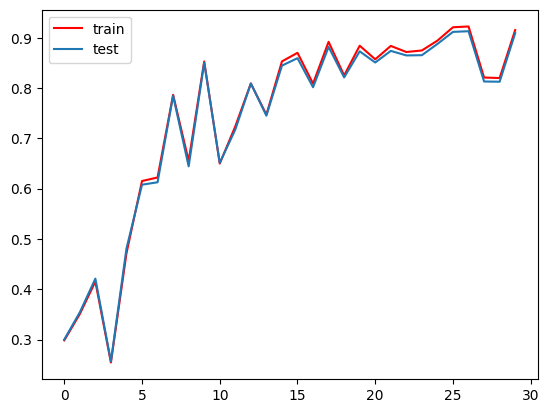

In [55]:
plt.plot(range(30), result_nkt[0]["train_acc"], color="r")
plt.plot(range(30), result_nkt[0]["test_acc"])
plt.legend(["train","test"])

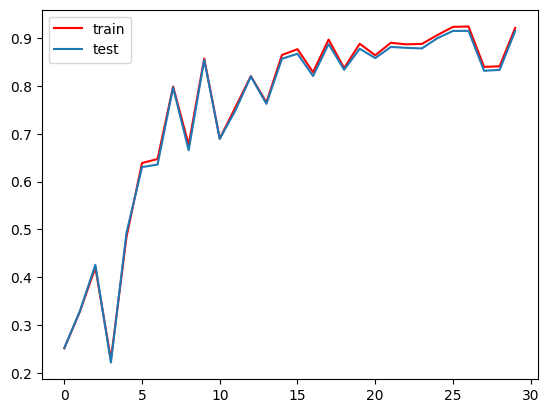

In [56]:
plt.plot(range(30), result_nkt[0]["train_f1"], color="r")
plt.plot(range(30), result_nkt[0]["test_f1"])
plt.legend(["train","test"])

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X_nkt,y_nkt,test_size=1/3,random_state=42, stratify=y_nkt)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_nkt=MLP(512,256,5).to(device)
optimizer_nkt=torch.optim.Adam(model_nkt.parameters(), lr=1e-3)
loss_fn_nkt=nn.CrossEntropyLoss(torch.tensor(weight_nkt, dtype=torch.float32))

print("NKT")
result_nkt.append(train_test_all_epoch("NKT",model_nkt, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nkt, loss_fn_nkt, device)) 

NKT


  3%|█▍                                          | 1/30 [00:03<01:52,  3.88s/it]

Epoca:  0  Train acc:  0.6016697791936724  Test acc:  0.5997363796133568
Train loss:  1.508382797241211  Test loss:  1.5090783834457397
Train f1:  0.6218446734125944  Test f1:  0.6184434834957169


  7%|██▉                                         | 2/30 [00:09<02:20,  5.02s/it]

Epoca:  1  Train acc:  0.2654070086784577  Test acc:  0.2726274165202109
Train loss:  1.2358766794204712  Test loss:  1.2320163249969482
Train f1:  0.18419244002597498  Test f1:  0.1938751611033633


 10%|████▍                                       | 3/30 [00:15<02:19,  5.15s/it]

Epoca:  2  Train acc:  0.3247281116115566  Test acc:  0.32930579964850615
Train loss:  1.1303635835647583  Test loss:  1.1250325441360474
Train f1:  0.3289522747304571  Test f1:  0.33324397880141965


 13%|█████▊                                      | 4/30 [00:20<02:18,  5.34s/it]

Epoca:  3  Train acc:  0.5244424914863232  Test acc:  0.5259226713532513
Train loss:  1.016688585281372  Test loss:  1.0048205852508545
Train f1:  0.5642685760409047  Test f1:  0.5631522107710805


 17%|███████▎                                    | 5/30 [00:26<02:21,  5.67s/it]

Epoca:  4  Train acc:  0.6346259474898385  Test acc:  0.6280755711775043
Train loss:  0.9595388174057007  Test loss:  0.9494671821594238
Train f1:  0.6567270562269728  Test f1:  0.649035204897935


 20%|████████▊                                   | 6/30 [00:30<02:01,  5.04s/it]

Epoca:  5  Train acc:  0.5857409645171922  Test acc:  0.5799648506151143
Train loss:  0.8969623446464539  Test loss:  0.885216474533081
Train f1:  0.6108565181584417  Test f1:  0.6038920238109097


 23%|██████████▎                                 | 7/30 [00:35<01:57,  5.12s/it]

Epoca:  6  Train acc:  0.6798857519499066  Test acc:  0.6768453427065027
Train loss:  0.8276261687278748  Test loss:  0.8141090273857117
Train f1:  0.7082088039492862  Test f1:  0.7044447638302977


 27%|███████████▋                                | 8/30 [00:40<01:48,  4.95s/it]

Epoca:  7  Train acc:  0.8137976491266615  Test acc:  0.8183216168717048
Train loss:  0.8160413503646851  Test loss:  0.8052764534950256
Train f1:  0.8308636790985329  Test f1:  0.8340009030611252


 30%|█████████████▏                              | 9/30 [00:45<01:45,  5.02s/it]

Epoca:  8  Train acc:  0.8535647588707019  Test acc:  0.8525922671353251
Train loss:  0.748284101486206  Test loss:  0.7416383624076843
Train f1:  0.8623067815192158  Test f1:  0.8603367371709982


 33%|██████████████▎                            | 10/30 [00:51<01:42,  5.11s/it]

Epoca:  9  Train acc:  0.7752389322201472  Test acc:  0.7743848857644992
Train loss:  0.696722149848938  Test loss:  0.6879727840423584
Train f1:  0.7939593153735772  Test f1:  0.7929265254588806


 37%|███████████████▊                           | 11/30 [00:53<01:23,  4.42s/it]

Epoca:  10  Train acc:  0.7721630231791717  Test acc:  0.7719683655536028
Train loss:  0.653583288192749  Test loss:  0.6483513116836548
Train f1:  0.7931021919598412  Test f1:  0.7916902875533585


 40%|█████████████████▏                         | 12/30 [01:00<01:29,  4.95s/it]

Epoca:  11  Train acc:  0.7436010106558277  Test acc:  0.7335237258347979
Train loss:  0.6706475019454956  Test loss:  0.6741045117378235
Train f1:  0.7818200046083749  Test f1:  0.7715825451118994


 43%|██████████████████▋                        | 13/30 [01:05<01:25,  5.05s/it]

Epoca:  12  Train acc:  0.8302757332747446  Test acc:  0.8238137082601055
Train loss:  0.6421763896942139  Test loss:  0.6532002091407776
Train f1:  0.8439791590287427  Test f1:  0.8377164106444299


 47%|████████████████████                       | 14/30 [01:11<01:27,  5.50s/it]

Epoca:  13  Train acc:  0.8047896297923761  Test acc:  0.7981107205623902
Train loss:  0.5664043426513672  Test loss:  0.5745782256126404
Train f1:  0.8164950511213164  Test f1:  0.8097848206725341


 50%|█████████████████████▌                     | 15/30 [01:17<01:22,  5.49s/it]

Epoca:  14  Train acc:  0.8601559925299351  Test acc:  0.8486379613356766
Train loss:  0.5805608034133911  Test loss:  0.6010153889656067
Train f1:  0.8670616841515362  Test f1:  0.8558102349434223


 53%|██████████████████████▉                    | 16/30 [01:22<01:13,  5.25s/it]

Epoca:  15  Train acc:  0.8675162034494123  Test acc:  0.8622583479789103
Train loss:  0.5328442454338074  Test loss:  0.5443236827850342
Train f1:  0.8783744173801195  Test f1:  0.8727682242405054


 57%|████████████████████████▎                  | 17/30 [01:27<01:10,  5.44s/it]

Epoca:  16  Train acc:  0.7816104580907394  Test acc:  0.7757029876977153
Train loss:  0.5091429352760315  Test loss:  0.5163747072219849
Train f1:  0.8048358384921546  Test f1:  0.7983670598292196


 60%|█████████████████████████▊                 | 18/30 [01:30<00:55,  4.63s/it]

Epoca:  17  Train acc:  0.7996264967593101  Test acc:  0.79701230228471
Train loss:  0.4795387387275696  Test loss:  0.4852831959724426
Train f1:  0.8170561306285927  Test f1:  0.8136365375653876


 63%|███████████████████████████▏               | 19/30 [01:36<00:54,  4.95s/it]

Epoca:  18  Train acc:  0.8442271778534549  Test acc:  0.8402899824253075
Train loss:  0.5065788626670837  Test loss:  0.5076163411140442
Train f1:  0.8576581291888522  Test f1:  0.8541540424958987


 67%|████████████████████████████▋              | 20/30 [01:41<00:48,  4.90s/it]

Epoca:  19  Train acc:  0.8423596616500055  Test acc:  0.835456942003515
Train loss:  0.46336475014686584  Test loss:  0.4794803857803345
Train f1:  0.8503476552389753  Test f1:  0.8442614510141299


 70%|██████████████████████████████             | 21/30 [01:44<00:40,  4.55s/it]

Epoca:  20  Train acc:  0.9280456992200373  Test acc:  0.9200351493848857
Train loss:  0.4273296296596527  Test loss:  0.4364057183265686
Train f1:  0.9315823568282441  Test f1:  0.9236971479612188


 73%|███████████████████████████████▌           | 22/30 [01:53<00:45,  5.67s/it]

Epoca:  21  Train acc:  0.8603757003185762  Test acc:  0.8528119507908611
Train loss:  0.413394570350647  Test loss:  0.41752296686172485
Train f1:  0.8739113006106638  Test f1:  0.8662752578190823


 77%|████████████████████████████████▉          | 23/30 [01:58<00:39,  5.66s/it]

Epoca:  22  Train acc:  0.8590574535867297  Test acc:  0.8506151142355008
Train loss:  0.4253700077533722  Test loss:  0.43412187695503235
Train f1:  0.8731951744113813  Test f1:  0.8643938735973138


 80%|██████████████████████████████████▍        | 24/30 [02:03<00:32,  5.48s/it]

Epoca:  23  Train acc:  0.8834450181258926  Test acc:  0.8769771528998243
Train loss:  0.4205435514450073  Test loss:  0.43363499641418457
Train f1:  0.8962548440909044  Test f1:  0.8890100070571288


 83%|███████████████████████████████████▊       | 25/30 [02:08<00:26,  5.29s/it]

Epoca:  24  Train acc:  0.8608151158958585  Test acc:  0.8497363796133568
Train loss:  0.410144567489624  Test loss:  0.4248047471046448
Train f1:  0.8683445795296837  Test f1:  0.8580385208351746


 87%|█████████████████████████████████████▎     | 26/30 [02:15<00:23,  5.79s/it]

Epoca:  25  Train acc:  0.919257387674393  Test acc:  0.9112478031634447
Train loss:  0.3620600700378418  Test loss:  0.3775106370449066
Train f1:  0.9234340803266503  Test f1:  0.9161261576845148


 90%|██████████████████████████████████████▋    | 27/30 [02:20<00:16,  5.41s/it]

Epoca:  26  Train acc:  0.924200812918818  Test acc:  0.914323374340949
Train loss:  0.36939290165901184  Test loss:  0.3929748833179474
Train f1:  0.9264761763267304  Test f1:  0.9169831258154583


 93%|████████████████████████████████████████▏  | 28/30 [02:27<00:11,  5.86s/it]

Epoca:  27  Train acc:  0.9443040755794793  Test acc:  0.9349736379613357
Train loss:  0.3685554265975952  Test loss:  0.3943796157836914
Train f1:  0.9476334725956104  Test f1:  0.9386464544262006


 97%|█████████████████████████████████████████▌ | 29/30 [02:31<00:05,  5.41s/it]

Epoca:  28  Train acc:  0.8657585411402834  Test acc:  0.8541300527240774
Train loss:  0.378601610660553  Test loss:  0.3990918695926666
Train f1:  0.872925429286615  Test f1:  0.8623075166843851


100%|███████████████████████████████████████████| 30/30 [02:36<00:00,  5.22s/it]

Epoca:  29  Train acc:  0.9100296605514665  Test acc:  0.9048769771528998
Train loss:  0.38728806376457214  Test loss:  0.4071120023727417
Train f1:  0.9240398364043048  Test f1:  0.9185284093935444


In [58]:
X_train, X_test, y_train, y_test=train_test_split(X_nkt,y_nkt,test_size=1/3,random_state=42, stratify=y_nkt)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=32,num_workers=8, shuffle=True)

model_nkt=MLP(512,256,5).to(device)
optimizer_nkt=torch.optim.Adam(model_nkt.parameters(), lr=1e-3)
loss_fn_nkt=nn.CrossEntropyLoss(torch.tensor(weight_nkt, dtype=torch.float32))

print("NKT")
result_nkt.append(train_test_all_epoch("NKT",model_nkt, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nkt, loss_fn_nkt, device)) 

NKT


  3%|█▍                                          | 1/30 [00:08<03:54,  8.08s/it]

Epoca:  0  Train acc:  0.6574755575085137  Test acc:  0.6581722319859402
Train loss:  1.0781636238098145  Test loss:  1.0804526805877686
Train f1:  0.6802125288777535  Test f1:  0.6777282264646259


  7%|██▉                                         | 2/30 [00:17<04:14,  9.09s/it]

Epoca:  1  Train acc:  0.7004284301878502  Test acc:  0.6911247803163445
Train loss:  0.8229869604110718  Test loss:  0.8291724324226379
Train f1:  0.7212526766742654  Test f1:  0.7118346506630159


 10%|████▍                                       | 3/30 [00:32<05:13, 11.63s/it]

Epoca:  2  Train acc:  0.8883884433703175  Test acc:  0.8840070298769771
Train loss:  0.6276551485061646  Test loss:  0.6322547793388367
Train f1:  0.8928421178755703  Test f1:  0.8881909247182442


 13%|█████▊                                      | 4/30 [00:47<05:36, 12.96s/it]

Epoca:  3  Train acc:  0.8490607492035592  Test acc:  0.8420474516695958
Train loss:  0.5542100071907043  Test loss:  0.5562220811843872
Train f1:  0.8694892070320813  Test f1:  0.8623128546039346


 17%|███████▎                                    | 5/30 [01:07<06:29, 15.57s/it]

Epoca:  4  Train acc:  0.9227727122926508  Test acc:  0.9127855887521968
Train loss:  0.4491712749004364  Test loss:  0.4570091664791107
Train f1:  0.9251498039073052  Test f1:  0.9164854301245924


 20%|████████▊                                   | 6/30 [01:19<05:41, 14.23s/it]

Epoca:  5  Train acc:  0.8339009117873228  Test acc:  0.8238137082601055
Train loss:  0.4581046402454376  Test loss:  0.4704993963241577
Train f1:  0.8456025101508357  Test f1:  0.8353442220056737


 23%|██████████▎                                 | 7/30 [01:31<05:14, 13.68s/it]

Epoca:  6  Train acc:  0.9138745468526859  Test acc:  0.9116871704745168
Train loss:  0.48107588291168213  Test loss:  0.4913918375968933
Train f1:  0.9247444841163328  Test f1:  0.9222395843963311


 27%|███████████▋                                | 8/30 [01:44<04:51, 13.26s/it]

Epoca:  7  Train acc:  0.8542238822366253  Test acc:  0.8427065026362038
Train loss:  0.5321541428565979  Test loss:  0.540244460105896
Train f1:  0.8687605674008657  Test f1:  0.8572070505457933


 30%|█████████████▏                              | 9/30 [02:01<05:06, 14.61s/it]

Epoca:  8  Train acc:  0.8625727782049873  Test acc:  0.8541300527240774
Train loss:  0.4709666073322296  Test loss:  0.4766426086425781
Train f1:  0.8712400554271372  Test f1:  0.8631993833570946


 33%|██████████████▎                            | 10/30 [02:11<04:23, 13.19s/it]

Epoca:  9  Train acc:  0.9166208942106998  Test acc:  0.914103690685413
Train loss:  0.3751966953277588  Test loss:  0.3924868106842041
Train f1:  0.9208263415842024  Test f1:  0.9180423721476745


 37%|███████████████▊                           | 11/30 [02:23<03:58, 12.58s/it]

Epoca:  10  Train acc:  0.8975063165989234  Test acc:  0.8897188049209139
Train loss:  0.33427542448043823  Test loss:  0.34047016501426697
Train f1:  0.9076196258085166  Test f1:  0.9002911909398895


 40%|█████████████████▏                         | 12/30 [02:34<03:42, 12.38s/it]

Epoca:  11  Train acc:  0.8999231022739757  Test acc:  0.8947715289982425
Train loss:  0.33775192499160767  Test loss:  0.3476484417915344
Train f1:  0.9159595267973205  Test f1:  0.9111624896769873


 43%|██████████████████▋                        | 13/30 [02:47<03:33, 12.55s/it]

Epoca:  12  Train acc:  0.9298033615291662  Test acc:  0.9204745166959578
Train loss:  0.2944885790348053  Test loss:  0.3215159773826599
Train f1:  0.9321970136481857  Test f1:  0.9232460150646012


 47%|████████████████████                       | 14/30 [03:04<03:41, 13.82s/it]

Epoca:  13  Train acc:  0.8605954081072174  Test acc:  0.851493848857645
Train loss:  0.4028584659099579  Test loss:  0.4445013403892517
Train f1:  0.8687737334509806  Test f1:  0.8599923238105974


 50%|█████████████████████▌                     | 15/30 [03:11<02:56, 11.75s/it]

Epoca:  14  Train acc:  0.727782049873668  Test acc:  0.7144112478031635
Train loss:  0.5000556707382202  Test loss:  0.5105495452880859
Train f1:  0.756890144972796  Test f1:  0.7448320195093986


 53%|██████████████████████▉                    | 16/30 [03:33<03:25, 14.71s/it]

Epoca:  15  Train acc:  0.9240909590244974  Test acc:  0.9195957820738138
Train loss:  0.33099812269210815  Test loss:  0.36263081431388855
Train f1:  0.9343071414942759  Test f1:  0.929947991771954


 57%|████████████████████████▎                  | 17/30 [03:46<03:04, 14.22s/it]

Epoca:  16  Train acc:  0.9473799846204548  Test acc:  0.9431019332161688
Train loss:  0.3216565251350403  Test loss:  0.33424678444862366
Train f1:  0.9502041338398466  Test f1:  0.94608316772112


 60%|█████████████████████████▊                 | 18/30 [04:10<03:27, 17.25s/it]

Epoca:  17  Train acc:  0.915082939690212  Test acc:  0.9072934973637962
Train loss:  0.26864883303642273  Test loss:  0.2832757532596588
Train f1:  0.925357932726471  Test f1:  0.9183886960931557


 63%|███████████████████████████▏               | 19/30 [04:39<03:47, 20.73s/it]

Epoca:  18  Train acc:  0.8921234757772163  Test acc:  0.8778558875219684
Train loss:  0.34621694684028625  Test loss:  0.37879273295402527
Train f1:  0.9054320510149997  Test f1:  0.8935231667209885


 67%|████████████████████████████▋              | 20/30 [04:58<03:23, 20.34s/it]

Epoca:  19  Train acc:  0.9185982643084697  Test acc:  0.9121265377855887
Train loss:  0.2999612092971802  Test loss:  0.2997146248817444
Train f1:  0.9231405060798947  Test f1:  0.9171263778217518


 70%|██████████████████████████████             | 21/30 [05:18<03:01, 20.16s/it]

Epoca:  20  Train acc:  0.9066241898275293  Test acc:  0.906414762741652
Train loss:  0.350980281829834  Test loss:  0.35453006625175476
Train f1:  0.9139462366893969  Test f1:  0.9138043988941323


 73%|███████████████████████████████▌           | 22/30 [05:44<02:53, 21.75s/it]

Epoca:  21  Train acc:  0.9191475337800725  Test acc:  0.9226713532513181
Train loss:  0.3924693763256073  Test loss:  0.3915605843067169
Train f1:  0.9246507155622639  Test f1:  0.9272278061974633


 77%|████████████████████████████████▉          | 23/30 [06:06<02:34, 22.01s/it]

Epoca:  22  Train acc:  0.9449631989454026  Test acc:  0.9393673110720563
Train loss:  0.3592023551464081  Test loss:  0.37503209710121155
Train f1:  0.9478181675812143  Test f1:  0.9422880277252661


 80%|██████████████████████████████████▍        | 24/30 [06:14<01:47, 17.88s/it]

Epoca:  23  Train acc:  0.8585081841151269  Test acc:  0.8536906854130053
Train loss:  0.33890026807785034  Test loss:  0.35961776971817017
Train f1:  0.8772604222530596  Test f1:  0.8710212567745077


 83%|███████████████████████████████████▊       | 25/30 [06:34<01:31, 18.37s/it]

Epoca:  24  Train acc:  0.9072833131934527  Test acc:  0.8945518453427065
Train loss:  0.3195306360721588  Test loss:  0.3669775128364563
Train f1:  0.9107522737626936  Test f1:  0.8989928016589096


 87%|█████████████████████████████████████▎     | 26/30 [06:52<01:13, 18.39s/it]

Epoca:  25  Train acc:  0.9090409755025816  Test acc:  0.9026801405975395
Train loss:  0.338993638753891  Test loss:  0.3478449881076813
Train f1:  0.9163035896748092  Test f1:  0.91053112271617


 90%|██████████████████████████████████████▋    | 27/30 [07:14<00:57, 19.32s/it]

Epoca:  26  Train acc:  0.9388113808634516  Test acc:  0.9345342706502636
Train loss:  0.4658766984939575  Test loss:  0.5005030632019043
Train f1:  0.9355652532862536  Test f1:  0.9313049538773037


 93%|████████████████████████████████████████▏  | 28/30 [07:32<00:37, 18.82s/it]

Epoca:  27  Train acc:  0.9155223552674943  Test acc:  0.906414762741652
Train loss:  0.26623034477233887  Test loss:  0.29480311274528503
Train f1:  0.9321238144702091  Test f1:  0.925211149150808


 97%|█████████████████████████████████████████▌ | 29/30 [07:52<00:19, 19.44s/it]

Epoca:  28  Train acc:  0.9174997253652643  Test acc:  0.9075131810193322
Train loss:  0.261540025472641  Test loss:  0.287863165140152
Train f1:  0.9219070813640512  Test f1:  0.9126338880807767


100%|███████████████████████████████████████████| 30/30 [08:15<00:00, 16.50s/it]

Epoca:  29  Train acc:  0.8063275843128639  Test acc:  0.8009666080843585
Train loss:  0.4894375801086426  Test loss:  0.5346107482910156
Train f1:  0.827417565098285  Test f1:  0.8217725243933683


#### Tgd

In [59]:
epocas=30
result_tgd=[]
y_tgd=y3[(y1==1)&(y2==1)]
X_tgd=X[(y1==1)&(y2==1)]
pd.DataFrame(y_tgd).value_counts()*100/len(y_tgd)

0
1    30.146590
0    26.832377
2    21.924793
3     8.667941
5     8.158062
4     4.270236
Name: count, dtype: float64

In [60]:
weight_tgd=np.array([0.268, 0.301, 0.219, 0.087, 0.043, 0.082])
weight_tgd=np.sum(weight_tgd)/(len(weight_tgd)*weight_tgd)
weight_tgd

array([0.62189055, 0.55370986, 0.76103501, 1.91570881, 3.87596899,
       2.03252033])

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X_tgd,y_tgd,test_size=1/3,random_state=42, stratify=y_tgd)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_tgd=MLP(512,128,6).to(device)
optimizer_tgd=torch.optim.Adam(model_tgd.parameters(), lr=1e-3)
loss_fn_tgd=nn.CrossEntropyLoss(torch.tensor(weight_tgd, dtype=torch.float32))

print("Tgd")
result_tgd.append(train_test_all_epoch("Tgd",model_tgd, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_tgd, loss_fn_tgd, device)) 

Tgd


  3%|█▍                                          | 1/30 [00:01<00:31,  1.09s/it]

Epoca:  0  Train acc:  0.044933078393881457  Test acc:  0.045889101338432124
Train loss:  1.7807636260986328  Test loss:  1.7814650535583496
Train f1:  0.006476430621615151  Test f1:  0.009261586087589911


  7%|██▉                                         | 2/30 [00:01<00:24,  1.13it/s]

Epoca:  1  Train acc:  0.3938814531548757  Test acc:  0.4110898661567878
Train loss:  1.7691760063171387  Test loss:  1.7705069780349731
Train f1:  0.33138073325853706  Test f1:  0.3445889358583703


 10%|████▍                                       | 3/30 [00:02<00:17,  1.51it/s]

Epoca:  2  Train acc:  0.2954110898661568  Test acc:  0.2925430210325048
Train loss:  1.7553244829177856  Test loss:  1.7573177814483643
Train f1:  0.2191805443887672  Test f1:  0.22747818332880942


 13%|█████▊                                      | 4/30 [00:03<00:21,  1.20it/s]

Epoca:  3  Train acc:  0.28107074569789675  Test acc:  0.2734225621414914
Train loss:  1.7328813076019287  Test loss:  1.7365113496780396
Train f1:  0.20927746217370305  Test f1:  0.20407227702635744


 17%|███████▎                                    | 5/30 [00:04<00:25,  1.00s/it]

Epoca:  4  Train acc:  0.30401529636711283  Test acc:  0.30019120458891013
Train loss:  1.703249216079712  Test loss:  1.7087491750717163
Train f1:  0.23983424650372237  Test f1:  0.23846307285924806


 20%|████████▊                                   | 6/30 [00:05<00:24,  1.03s/it]

Epoca:  5  Train acc:  0.4101338432122371  Test acc:  0.4110898661567878
Train loss:  1.6670334339141846  Test loss:  1.6754353046417236
Train f1:  0.3387436494019914  Test f1:  0.3384024023928461


 23%|██████████▎                                 | 7/30 [00:06<00:24,  1.06s/it]

Epoca:  6  Train acc:  0.3279158699808795  Test acc:  0.30592734225621415
Train loss:  1.6263707876205444  Test loss:  1.6384172439575195
Train f1:  0.2811249711662732  Test f1:  0.26370383192160934


 27%|███████████▋                                | 8/30 [00:07<00:22,  1.03s/it]

Epoca:  7  Train acc:  0.41204588910133844  Test acc:  0.4110898661567878
Train loss:  1.5767441987991333  Test loss:  1.5917826890945435
Train f1:  0.36363477934863314  Test f1:  0.3612194046697164


 30%|█████████████▏                              | 9/30 [00:08<00:21,  1.02s/it]

Epoca:  8  Train acc:  0.4321223709369025  Test acc:  0.3977055449330784
Train loss:  1.529119849205017  Test loss:  1.5506178140640259
Train f1:  0.41243463120237406  Test f1:  0.37452835363664405


 33%|██████████████▎                            | 10/30 [00:09<00:21,  1.07s/it]

Epoca:  9  Train acc:  0.3652007648183556  Test acc:  0.37093690248565964
Train loss:  1.4862037897109985  Test loss:  1.5099396705627441
Train f1:  0.33419948271270244  Test f1:  0.3440610427736266


 37%|███████████████▊                           | 11/30 [00:10<00:18,  1.05it/s]

Epoca:  10  Train acc:  0.3565965583173996  Test acc:  0.3479923518164436
Train loss:  1.4453506469726562  Test loss:  1.4738620519638062
Train f1:  0.34720703962291355  Test f1:  0.3395521362808781


 40%|█████████████████▏                         | 12/30 [00:12<00:19,  1.08s/it]

Epoca:  11  Train acc:  0.4665391969407266  Test acc:  0.45315487571701724
Train loss:  1.4174238443374634  Test loss:  1.4507275819778442
Train f1:  0.44229656599363293  Test f1:  0.4289902114156979


 43%|██████████████████▋                        | 13/30 [00:12<00:16,  1.03it/s]

Epoca:  12  Train acc:  0.47036328871892924  Test acc:  0.4646271510516252
Train loss:  1.3827522993087769  Test loss:  1.4208884239196777
Train f1:  0.42720062001800163  Test f1:  0.40261259073110184


 47%|████████████████████                       | 14/30 [00:13<00:15,  1.06it/s]

Epoca:  13  Train acc:  0.35946462715105165  Test acc:  0.3479923518164436
Train loss:  1.3538609743118286  Test loss:  1.3965977430343628
Train f1:  0.29707842288542474  Test f1:  0.27595688453654277


 50%|█████████████████████▌                     | 15/30 [00:14<00:13,  1.11it/s]

Epoca:  14  Train acc:  0.3365200764818356  Test acc:  0.3231357552581262
Train loss:  1.3239513635635376  Test loss:  1.3697006702423096
Train f1:  0.28787128758392466  Test f1:  0.26476799390100053


 53%|██████████████████████▉                    | 16/30 [00:15<00:11,  1.18it/s]

Epoca:  15  Train acc:  0.4598470363288719  Test acc:  0.4072657743785851
Train loss:  1.2938390970230103  Test loss:  1.3458975553512573
Train f1:  0.47228524777854664  Test f1:  0.4160339764366248


 57%|████████████████████████▎                  | 17/30 [00:16<00:12,  1.06it/s]

Epoca:  16  Train acc:  0.5439770554493308  Test acc:  0.5219885277246654
Train loss:  1.2626148462295532  Test loss:  1.3134517669677734
Train f1:  0.5372789340116185  Test f1:  0.5240383849652634


 60%|█████████████████████████▊                 | 18/30 [00:17<00:12,  1.04s/it]

Epoca:  17  Train acc:  0.5707456978967496  Test acc:  0.5277246653919694
Train loss:  1.2365009784698486  Test loss:  1.2943084239959717
Train f1:  0.5643501465676052  Test f1:  0.5211410534510512


 63%|███████████████████████████▏               | 19/30 [00:18<00:11,  1.06s/it]

Epoca:  18  Train acc:  0.4732313575525813  Test acc:  0.4627151051625239
Train loss:  1.2089706659317017  Test loss:  1.2608122825622559
Train f1:  0.4755166532998925  Test f1:  0.4589522069868585


 67%|████████████████████████████▋              | 20/30 [00:19<00:09,  1.03it/s]

Epoca:  19  Train acc:  0.5152963671128107  Test acc:  0.4894837476099426
Train loss:  1.18464195728302  Test loss:  1.2437286376953125
Train f1:  0.5010553842911771  Test f1:  0.4705450207363008


 70%|██████████████████████████████             | 21/30 [00:20<00:08,  1.08it/s]

Epoca:  20  Train acc:  0.5277246653919694  Test acc:  0.5124282982791587
Train loss:  1.1716971397399902  Test loss:  1.2233695983886719
Train f1:  0.52421151140613  Test f1:  0.5132363137092963


 73%|███████████████████████████████▌           | 22/30 [00:21<00:08,  1.01s/it]

Epoca:  21  Train acc:  0.5430210325047801  Test acc:  0.4875717017208413
Train loss:  1.1519775390625  Test loss:  1.2170170545578003
Train f1:  0.5440233480737982  Test f1:  0.48581508402413986


 77%|████████████████████████████████▉          | 23/30 [00:22<00:07,  1.10s/it]

Epoca:  22  Train acc:  0.5210325047801148  Test acc:  0.5162523900573613
Train loss:  1.137323021888733  Test loss:  1.190799355506897
Train f1:  0.5277970877782805  Test f1:  0.5277601600628256


 80%|██████████████████████████████████▍        | 24/30 [00:23<00:06,  1.03s/it]

Epoca:  23  Train acc:  0.5860420650095602  Test acc:  0.5755258126195029
Train loss:  1.092171311378479  Test loss:  1.154968500137329
Train f1:  0.5945374049805343  Test f1:  0.5884186937622471


 83%|███████████████████████████████████▊       | 25/30 [00:24<00:05,  1.05s/it]

Epoca:  24  Train acc:  0.5774378585086042  Test acc:  0.5372848948374761
Train loss:  1.0842663049697876  Test loss:  1.1526228189468384
Train f1:  0.5849171205733004  Test f1:  0.5446196313734996


 87%|█████████████████████████████████████▎     | 26/30 [00:25<00:03,  1.05it/s]

Epoca:  25  Train acc:  0.6252390057361377  Test acc:  0.609942638623327
Train loss:  1.0724989175796509  Test loss:  1.1337249279022217
Train f1:  0.6348944263252411  Test f1:  0.6288405097534022


 90%|██████████████████████████████████████▋    | 27/30 [00:26<00:02,  1.14it/s]

Epoca:  26  Train acc:  0.5946462715105163  Test acc:  0.5544933078393881
Train loss:  1.0445276498794556  Test loss:  1.1150562763214111
Train f1:  0.6056917450997082  Test f1:  0.5649989754503584


 93%|████████████████████████████████████████▏  | 28/30 [00:27<00:01,  1.11it/s]

Epoca:  27  Train acc:  0.6443594646271511  Test acc:  0.6252390057361377
Train loss:  1.026183843612671  Test loss:  1.086824655532837
Train f1:  0.6549272220076505  Test f1:  0.6417220011593412


 97%|█████████████████████████████████████████▌ | 29/30 [00:27<00:00,  1.23it/s]

Epoca:  28  Train acc:  0.5783938814531548  Test acc:  0.5468451242829828
Train loss:  1.0272741317749023  Test loss:  1.0914934873580933
Train f1:  0.5901569819423476  Test f1:  0.5620891661518259


100%|███████████████████████████████████████████| 30/30 [00:28<00:00,  1.04it/s]

Epoca:  29  Train acc:  0.5936902485659655  Test acc:  0.5659655831739961
Train loss:  0.9982583522796631  Test loss:  1.0723010301589966
Train f1:  0.6025438862783522  Test f1:  0.5784094922230041


In [62]:
X_train, X_test, y_train, y_test=train_test_split(X_tgd,y_tgd,test_size=1/3,random_state=42, stratify=y_tgd)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=32,num_workers=8, shuffle=True)

model_tgd=MLP(512,128,6).to(device)
optimizer_tgd=torch.optim.Adam(model_tgd.parameters(), lr=1e-3)
loss_fn_tgd=nn.CrossEntropyLoss(torch.tensor(weight_tgd, dtype=torch.float32))

print("Tgd")
result_tgd.append(train_test_all_epoch("Tgd",model_tgd, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_tgd, loss_fn_tgd, device)) 

Tgd


  3%|█▍                                          | 1/30 [00:02<01:07,  2.33s/it]

Epoca:  0  Train acc:  0.36615678776290633  Test acc:  0.35372848948374763
Train loss:  1.730197548866272  Test loss:  1.7329126596450806
Train f1:  0.3372529591790166  Test f1:  0.3310169109707979


  7%|██▉                                         | 2/30 [00:03<00:42,  1.52s/it]

Epoca:  1  Train acc:  0.3776290630975143  Test acc:  0.32122370936902483
Train loss:  1.5396621227264404  Test loss:  1.554530143737793
Train f1:  0.39098137807744154  Test f1:  0.3360845020875551


 10%|████▍                                       | 3/30 [00:04<00:35,  1.32s/it]

Epoca:  2  Train acc:  0.49904397705544934  Test acc:  0.48565965583174
Train loss:  1.3458021879196167  Test loss:  1.3807846307754517
Train f1:  0.42982537605127924  Test f1:  0.40993417877715366


 13%|█████▊                                      | 4/30 [00:07<00:53,  2.07s/it]

Epoca:  3  Train acc:  0.4894837476099426  Test acc:  0.4608030592734226
Train loss:  1.1986302137374878  Test loss:  1.244821310043335
Train f1:  0.4749095009676652  Test f1:  0.4404115326456296


 17%|███████▎                                    | 5/30 [00:09<00:52,  2.11s/it]

Epoca:  4  Train acc:  0.6108986615678776  Test acc:  0.5889101338432122
Train loss:  1.0877569913864136  Test loss:  1.142925500869751
Train f1:  0.6344091771690914  Test f1:  0.6168036209645638


 20%|████████▊                                   | 6/30 [00:10<00:43,  1.80s/it]

Epoca:  5  Train acc:  0.6462715105162524  Test acc:  0.6328871892925431
Train loss:  0.9952505230903625  Test loss:  1.0576056241989136
Train f1:  0.6627563093345769  Test f1:  0.6513797237923008


 23%|██████████▎                                 | 7/30 [00:14<00:53,  2.32s/it]

Epoca:  6  Train acc:  0.6711281070745698  Test acc:  0.6367112810707457
Train loss:  0.9272144436836243  Test loss:  0.9934387803077698
Train f1:  0.6826449569459133  Test f1:  0.6529788298592912


 27%|███████████▋                                | 8/30 [00:17<00:59,  2.72s/it]

Epoca:  7  Train acc:  0.7151051625239006  Test acc:  0.6883365200764818
Train loss:  0.9495233297348022  Test loss:  1.0233186483383179
Train f1:  0.7074449089283028  Test f1:  0.676525925652203


 30%|█████████████▏                              | 9/30 [00:20<00:58,  2.77s/it]

Epoca:  8  Train acc:  0.7217973231357553  Test acc:  0.6826003824091779
Train loss:  0.875554084777832  Test loss:  0.9595457911491394
Train f1:  0.7232981534363765  Test f1:  0.6865916219146249


 33%|██████████████▎                            | 10/30 [00:22<00:46,  2.35s/it]

Epoca:  9  Train acc:  0.7055449330783938  Test acc:  0.6405353728489483
Train loss:  0.798666775226593  Test loss:  0.8922755122184753
Train f1:  0.7111205140068261  Test f1:  0.6507487212720445


 37%|███████████████▊                           | 11/30 [00:24<00:43,  2.27s/it]

Epoca:  10  Train acc:  0.6988527724665392  Test acc:  0.6692160611854685
Train loss:  0.7899601459503174  Test loss:  0.873093843460083
Train f1:  0.703192178267892  Test f1:  0.6704495494607202


 40%|█████████████████▏                         | 12/30 [00:27<00:46,  2.58s/it]

Epoca:  11  Train acc:  0.6739961759082218  Test acc:  0.6424474187380497
Train loss:  0.750006377696991  Test loss:  0.8424507975578308
Train f1:  0.6896812302470633  Test f1:  0.661152159167415


 43%|██████████████████▋                        | 13/30 [00:31<00:50,  2.96s/it]

Epoca:  12  Train acc:  0.7896749521988528  Test acc:  0.7476099426386233
Train loss:  0.7230376601219177  Test loss:  0.810788094997406
Train f1:  0.7901648138981626  Test f1:  0.7502360032098209


 47%|████████████████████                       | 14/30 [00:33<00:41,  2.58s/it]

Epoca:  13  Train acc:  0.7638623326959847  Test acc:  0.7112810707456979
Train loss:  0.6585487127304077  Test loss:  0.7488760352134705
Train f1:  0.7756042533948666  Test f1:  0.7305854639892865


 50%|█████████████████████▌                     | 15/30 [00:34<00:30,  2.06s/it]

Epoca:  14  Train acc:  0.7160611854684512  Test acc:  0.6845124282982792
Train loss:  0.6879676580429077  Test loss:  0.79194176197052
Train f1:  0.7269074249639292  Test f1:  0.7017448231478132


 53%|██████████████████████▉                    | 16/30 [00:35<00:26,  1.89s/it]

Epoca:  15  Train acc:  0.7017208413001912  Test acc:  0.6233269598470363
Train loss:  0.7062210440635681  Test loss:  0.8245141506195068
Train f1:  0.7093191799081318  Test f1:  0.6377031540154174


 57%|████████████████████████▎                  | 17/30 [00:36<00:20,  1.55s/it]

Epoca:  16  Train acc:  0.7753346080305927  Test acc:  0.7112810707456979
Train loss:  0.6048940420150757  Test loss:  0.7121601104736328
Train f1:  0.7877426371990304  Test f1:  0.7328425029723278


 60%|█████████████████████████▊                 | 18/30 [00:40<00:26,  2.22s/it]

Epoca:  17  Train acc:  0.8001912045889101  Test acc:  0.7380497131931166
Train loss:  0.6215941309928894  Test loss:  0.7435040473937988
Train f1:  0.8023206276853919  Test f1:  0.7450317269885318


 63%|███████████████████████████▏               | 19/30 [00:42<00:24,  2.23s/it]

Epoca:  18  Train acc:  0.7523900573613767  Test acc:  0.6883365200764818
Train loss:  0.6013827919960022  Test loss:  0.727857232093811
Train f1:  0.7589668565613116  Test f1:  0.7025686348626291


 67%|████████████████████████████▋              | 20/30 [00:45<00:24,  2.46s/it]

Epoca:  19  Train acc:  0.8355640535372849  Test acc:  0.7896749521988528
Train loss:  0.5629708766937256  Test loss:  0.6760326027870178
Train f1:  0.835937116091981  Test f1:  0.7903094098779272


 70%|██████████████████████████████             | 21/30 [00:48<00:23,  2.58s/it]

Epoca:  20  Train acc:  0.7026768642447419  Test acc:  0.6596558317399618
Train loss:  0.6058209538459778  Test loss:  0.7285254001617432
Train f1:  0.7183746161283  Test f1:  0.6848734869076778


 73%|███████████████████████████████▌           | 22/30 [00:48<00:15,  1.98s/it]

Epoca:  21  Train acc:  0.760038240917782  Test acc:  0.7304015296367112
Train loss:  0.573894202709198  Test loss:  0.6878308653831482
Train f1:  0.7707120704333896  Test f1:  0.7457819819430227


 77%|████████████████████████████████▉          | 23/30 [00:50<00:12,  1.85s/it]

Epoca:  22  Train acc:  0.8260038240917782  Test acc:  0.768642447418738
Train loss:  0.5136411190032959  Test loss:  0.6456156373023987
Train f1:  0.8310477643184212  Test f1:  0.7782648224522237


 80%|██████████████████████████████████▍        | 24/30 [00:53<00:13,  2.19s/it]

Epoca:  23  Train acc:  0.7896749521988528  Test acc:  0.7265774378585086
Train loss:  0.5082206726074219  Test loss:  0.6475163698196411
Train f1:  0.798413207014244  Test f1:  0.7445928059936804


 83%|███████████████████████████████████▊       | 25/30 [00:56<00:13,  2.61s/it]

Epoca:  24  Train acc:  0.847036328871893  Test acc:  0.7667304015296367
Train loss:  0.4993492662906647  Test loss:  0.6480490565299988
Train f1:  0.8486920491624733  Test f1:  0.7705087125142263


 87%|█████████████████████████████████████▎     | 26/30 [00:59<00:11,  2.77s/it]

Epoca:  25  Train acc:  0.8346080305927343  Test acc:  0.7705544933078394
Train loss:  0.49536892771720886  Test loss:  0.6467596888542175
Train f1:  0.8381802162209514  Test f1:  0.7744219857390554


 90%|██████████████████████████████████████▋    | 27/30 [01:02<00:07,  2.56s/it]

Epoca:  26  Train acc:  0.8116634799235182  Test acc:  0.7552581261950286
Train loss:  0.537815272808075  Test loss:  0.7057738304138184
Train f1:  0.8104762541066844  Test f1:  0.7518291728383545


 93%|████████████████████████████████████████▏  | 28/30 [01:04<00:04,  2.40s/it]

Epoca:  27  Train acc:  0.8594646271510517  Test acc:  0.7992351816443595
Train loss:  0.4708593189716339  Test loss:  0.6173957586288452
Train f1:  0.8584269437475656  Test f1:  0.8021388759639185


 97%|█████████████████████████████████████████▌ | 29/30 [01:05<00:02,  2.04s/it]

Epoca:  28  Train acc:  0.8527724665391969  Test acc:  0.7858508604206501
Train loss:  0.42744991183280945  Test loss:  0.5820162296295166
Train f1:  0.8557172649127662  Test f1:  0.7903559041910878


100%|███████████████████████████████████████████| 30/30 [01:06<00:00,  2.22s/it]

Epoca:  29  Train acc:  0.844168260038241  Test acc:  0.7667304015296367
Train loss:  0.45896029472351074  Test loss:  0.6289452910423279
Train f1:  0.8469028845742494  Test f1:  0.7703799492529795


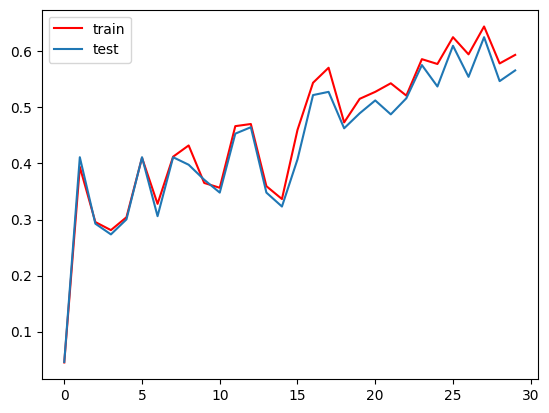

In [63]:
plt.plot(range(30), result_tgd[0]["train_acc"], color="r")
plt.plot(range(30), result_tgd[0]["test_acc"])
plt.legend(["train","test"])

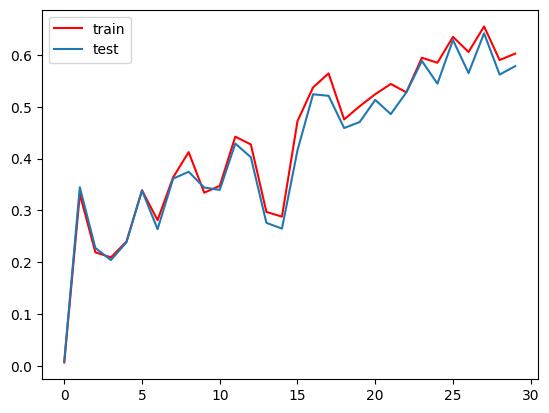

In [64]:
plt.plot(range(30), result_tgd[0]["train_f1"], color="r")
plt.plot(range(30), result_tgd[0]["test_f1"])
plt.legend(["train","test"])

#### Real T cells

In [65]:
epocas=30
result_real=[]
y_real=y3[(y1==1)&(y2==2)]
X_real=X[(y1==1)&(y2==2)]
pd.DataFrame(y_real).value_counts()*100/len(y_real)

0
1    70.631150
2    24.013960
0     3.901060
3     1.453831
Name: count, dtype: float64

In [66]:
weight_real=np.array([0.039, 0.706, 0.240, 0.015])
weight_real=np.sum(weight_real)/(len(weight_real)*weight_real)
weight_real

array([ 6.41025641,  0.35410765,  1.04166667, 16.66666667])

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X_real,y_real,test_size=1/3,random_state=42, stratify=y_real)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_real=MLP(256,64,4).to(device)
optimizer_real=torch.optim.Adam(model_real.parameters(), lr=1e-3)
loss_fn_real=nn.CrossEntropyLoss(torch.tensor(weight_real, dtype=torch.float32))

print("Real T cells")
result_real.append(train_test_all_epoch("Real T cells",model_real, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_real, loss_fn_real, device)) 

Real T cells


  3%|█▍                                          | 1/30 [00:09<04:42,  9.75s/it]

Epoca:  0  Train acc:  0.9605159418461635  Test acc:  0.9581520025228635
Train loss:  0.3040350377559662  Test loss:  0.3115030825138092
Train f1:  0.9649250576384232  Test f1:  0.9631803631982896


  7%|██▉                                         | 2/30 [00:18<04:13,  9.05s/it]

Epoca:  1  Train acc:  0.9330316313980258  Test acc:  0.9298959318826868
Train loss:  0.1721835434436798  Test loss:  0.18571734428405762
Train f1:  0.9453921026186443  Test f1:  0.9429818905262988


 10%|████▍                                       | 3/30 [00:23<03:19,  7.37s/it]

Epoca:  2  Train acc:  0.9554069822447886  Test acc:  0.9525386313465783
Train loss:  0.0979442223906517  Test loss:  0.10678961873054504
Train f1:  0.96106568722422  Test f1:  0.9588420850907734


 13%|█████▊                                      | 4/30 [00:34<03:49,  8.85s/it]

Epoca:  3  Train acc:  0.9773250496704405  Test acc:  0.9738568274992117
Train loss:  0.06806652247905731  Test loss:  0.07720300555229187
Train f1:  0.979245804857625  Test f1:  0.9763666818677693


 17%|███████▎                                    | 5/30 [00:44<03:48,  9.15s/it]

Epoca:  4  Train acc:  0.9796114667759942  Test acc:  0.9765689057079786
Train loss:  0.0551646389067173  Test loss:  0.0638117790222168
Train f1:  0.9812370102883495  Test f1:  0.978682541391653


 20%|████████▊                                   | 6/30 [00:50<03:17,  8.22s/it]

Epoca:  5  Train acc:  0.9420669210634205  Test acc:  0.937275307473983
Train loss:  0.08089406788349152  Test loss:  0.09280461072921753
Train f1:  0.9512096967905709  Test f1:  0.9475669732324705


 23%|██████████▎                                 | 7/30 [00:58<03:03,  7.97s/it]

Epoca:  6  Train acc:  0.9762054937084108  Test acc:  0.9737306843267108
Train loss:  0.048834096640348434  Test loss:  0.061024099588394165
Train f1:  0.9781668598454845  Test f1:  0.9760512953178618


 27%|███████████▋                                | 8/30 [01:08<03:08,  8.57s/it]

Epoca:  7  Train acc:  0.9824024724841528  Test acc:  0.9795648060548723
Train loss:  0.03971993923187256  Test loss:  0.04993748664855957
Train f1:  0.9835515096411548  Test f1:  0.9811102242524183


 30%|█████████████▏                              | 9/30 [01:18<03:11,  9.13s/it]

Epoca:  8  Train acc:  0.97484941183891  Test acc:  0.9717439293598233
Train loss:  0.04087153822183609  Test loss:  0.04897040128707886
Train f1:  0.977223163258151  Test f1:  0.9747330790174423


 33%|██████████████▎                            | 10/30 [01:30<03:19,  9.99s/it]

Epoca:  9  Train acc:  0.9839793118672931  Test acc:  0.9813308104698834
Train loss:  0.03530371934175491  Test loss:  0.045017894357442856
Train f1:  0.9849720430643487  Test f1:  0.9826590304793338


 37%|███████████████▊                           | 11/30 [01:41<03:17, 10.42s/it]

Epoca:  10  Train acc:  0.9815825160049197  Test acc:  0.9791548407442447
Train loss:  0.032732609659433365  Test loss:  0.040961794555187225
Train f1:  0.9829329315981546  Test f1:  0.9808952304647554


 40%|█████████████████▏                         | 12/30 [01:52<03:09, 10.51s/it]

Epoca:  11  Train acc:  0.9775142703964175  Test acc:  0.974077578051088
Train loss:  0.03980739414691925  Test loss:  0.052594251930713654
Train f1:  0.9793523369333238  Test f1:  0.9764054115515763


 43%|██████████████████▋                        | 13/30 [02:01<02:51, 10.09s/it]

Epoca:  12  Train acc:  0.9799741398341165  Test acc:  0.9771996215704825
Train loss:  0.035273484885692596  Test loss:  0.0435640923678875
Train f1:  0.9816885985569495  Test f1:  0.9794422078928977


 47%|████████████████████                       | 14/30 [02:09<02:32,  9.50s/it]

Epoca:  13  Train acc:  0.9758112838626257  Test acc:  0.9722800378429518
Train loss:  0.038297832012176514  Test loss:  0.04978231340646744
Train f1:  0.9779293283306398  Test f1:  0.9748962369909517


 50%|█████████████████████▌                     | 15/30 [02:21<02:34, 10.28s/it]

Epoca:  14  Train acc:  0.9857453719764104  Test acc:  0.9833491012298959
Train loss:  0.02789885364472866  Test loss:  0.036635253578424454
Train f1:  0.9865357641124116  Test f1:  0.9844440401756898


 53%|██████████████████████▉                    | 16/30 [02:35<02:36, 11.21s/it]

Epoca:  15  Train acc:  0.9792172569302091  Test acc:  0.9767896562598549
Train loss:  0.03142343461513519  Test loss:  0.03864278271794319
Train f1:  0.9808814935836816  Test f1:  0.9788587091234839


 57%|████████████████████████▎                  | 17/30 [02:47<02:27, 11.37s/it]

Epoca:  16  Train acc:  0.9739821501781829  Test acc:  0.9710816777041943
Train loss:  0.035805925726890564  Test loss:  0.04395224153995514
Train f1:  0.9762864294673961  Test f1:  0.9738631582469264


 60%|█████████████████████████▊                 | 18/30 [02:58<02:18, 11.52s/it]

Epoca:  17  Train acc:  0.9818190419123908  Test acc:  0.9796909492273731
Train loss:  0.02996719814836979  Test loss:  0.03715851157903671
Train f1:  0.9832517255511005  Test f1:  0.9815147842040921


 63%|███████████████████████████▏               | 19/30 [03:07<01:55, 10.51s/it]

Epoca:  18  Train acc:  0.981866347093885  Test acc:  0.9799747713654998
Train loss:  0.03012876771390438  Test loss:  0.036574263125658035
Train f1:  0.9833360471923028  Test f1:  0.9818180582434487


 67%|████████████████████████████▋              | 20/30 [03:15<01:39,  9.95s/it]

Epoca:  19  Train acc:  0.989939764735564  Test acc:  0.98719646799117
Train loss:  0.031388092786073685  Test loss:  0.037146180868148804
Train f1:  0.990568641821455  Test f1:  0.9881694124941223


 70%|██████████████████████████████             | 21/30 [03:28<01:35, 10.65s/it]

Epoca:  20  Train acc:  0.9091740515311111  Test acc:  0.9074424471775465
Train loss:  0.1668209433555603  Test loss:  0.1879623681306839
Train f1:  0.9281697696963032  Test f1:  0.9268584589999204


 73%|███████████████████████████████▌           | 22/30 [03:52<01:58, 14.81s/it]

Epoca:  21  Train acc:  0.9893721025576335  Test acc:  0.9876379690949227
Train loss:  0.025055397301912308  Test loss:  0.03389580175280571
Train f1:  0.9898117775647095  Test f1:  0.9882197385476893


 77%|████████████████████████████████▉          | 23/30 [04:04<01:37, 13.94s/it]

Epoca:  22  Train acc:  0.9784288372386388  Test acc:  0.9754020813623463
Train loss:  0.030282551422715187  Test loss:  0.04000262916088104
Train f1:  0.9801275061348588  Test f1:  0.9775606730633984


 80%|██████████████████████████████████▍        | 24/30 [04:19<01:25, 14.17s/it]

Epoca:  23  Train acc:  0.9873852849348765  Test acc:  0.9856827499211606
Train loss:  0.024727607145905495  Test loss:  0.0348326601088047
Train f1:  0.9879982036749808  Test f1:  0.98645369007535


 83%|███████████████████████████████████▊       | 25/30 [04:32<01:09, 13.83s/it]

Epoca:  24  Train acc:  0.9907439528209656  Test acc:  0.988647114474929
Train loss:  0.022889547049999237  Test loss:  0.030979914590716362
Train f1:  0.9911159577794562  Test f1:  0.9891942042791949


 87%|█████████████████████████████████████▎     | 26/30 [04:56<01:08, 17.05s/it]

Epoca:  25  Train acc:  0.9921158030842978  Test acc:  0.9898139388205613
Train loss:  0.031112929806113243  Test loss:  0.03579767420887947
Train f1:  0.9925429804895554  Test f1:  0.990528273923063


 90%|██████████████████████████████████████▋    | 27/30 [05:17<00:54, 18.02s/it]

Epoca:  26  Train acc:  0.9880317890819641  Test acc:  0.9859350362661621
Train loss:  0.022875303402543068  Test loss:  0.030687807127833366
Train f1:  0.9886119668225766  Test f1:  0.9867331866625467


 93%|████████████████████████████████████████▏  | 28/30 [05:36<00:36, 18.40s/it]

Epoca:  27  Train acc:  0.9878898735374815  Test acc:  0.9858719646799117
Train loss:  0.021849418058991432  Test loss:  0.030075697228312492
Train f1:  0.9885029410231672  Test f1:  0.9867334401338307


 97%|█████████████████████████████████████████▌ | 29/30 [05:49<00:16, 16.83s/it]

Epoca:  28  Train acc:  0.9842000693809329  Test acc:  0.9820245979186376
Train loss:  0.024539433419704437  Test loss:  0.03203878924250603
Train f1:  0.9851948106135648  Test f1:  0.9833368485911022


100%|███████████████████████████████████████████| 30/30 [06:03<00:00, 12.11s/it]

Epoca:  29  Train acc:  0.9914062253618846  Test acc:  0.9890255439924314
Train loss:  0.02122149057686329  Test loss:  0.02894015423953533
Train f1:  0.9917340321345132  Test f1:  0.9895382740855522


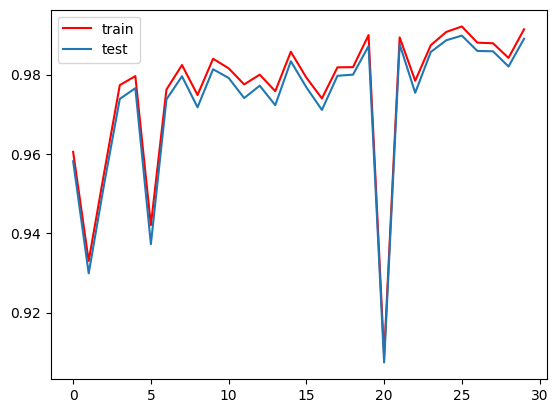

In [68]:
plt.plot(range(30), result_real[0]["train_acc"], color="r")
plt.plot(range(30), result_real[0]["test_acc"])
plt.legend(["train","test"])

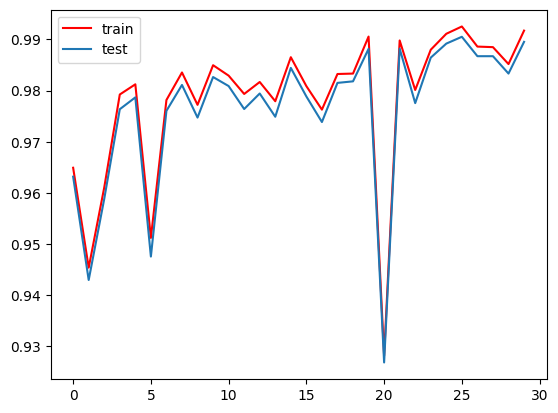

In [69]:
plt.plot(range(30), result_real[0]["train_f1"], color="r")
plt.plot(range(30), result_real[0]["test_f1"])
plt.legend(["train","test"])

#### NK cells

In [70]:
epocas=30
result_nk=[]
y_nk=y3[(y1==2)&(y2==0)]
X_nk=X[(y1==2)&(y2==0)]
pd.DataFrame(y_nk).value_counts()*100/len(y_nk)

0
2    51.985981
3    43.107477
1     3.387850
0     1.518692
Name: count, dtype: float64

In [71]:
weight_nk=np.array([0.015, 0.034, 0.520, 0.431])
weight_nk=np.sum(weight_nk)/(len(weight_nk)*weight_nk)
weight_nk

array([16.66666667,  7.35294118,  0.48076923,  0.5800464 ])

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X_nk,y_nk,test_size=1/3,random_state=42, stratify=y_nk)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_nk=MLP(256,64,4).to(device)
optimizer_nk=torch.optim.Adam(model_nk.parameters(), lr=1e-3)
loss_fn_nk=nn.CrossEntropyLoss(torch.tensor(weight_nk, dtype=torch.float32))

print("NK cells")
result_nk.append(train_test_all_epoch("NK",model_nk, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nk, loss_fn_nk, device)) 

NK cells


  3%|█▍                                          | 1/30 [00:00<00:20,  1.40it/s]

Epoca:  0  Train acc:  0.43733567046450483  Test acc:  0.436077057793345
Train loss:  1.381917953491211  Test loss:  1.382377028465271
Train f1:  0.27111695393903984  Test f1:  0.2693593470965293


  7%|██▉                                         | 2/30 [00:01<00:21,  1.28it/s]

Epoca:  1  Train acc:  0.4583698510078878  Test acc:  0.4553415061295972
Train loss:  1.3772238492965698  Test loss:  1.3776198625564575
Train f1:  0.303049833939553  Test f1:  0.2953076457179932


 10%|████▍                                       | 3/30 [00:02<00:21,  1.26it/s]

Epoca:  2  Train acc:  0.43733567046450483  Test acc:  0.436077057793345
Train loss:  1.3721855878829956  Test loss:  1.372322678565979
Train f1:  0.2717061519395911  Test f1:  0.2693593470965293


 13%|█████▊                                      | 4/30 [00:02<00:18,  1.39it/s]

Epoca:  3  Train acc:  0.4548641542506573  Test acc:  0.4553415061295972
Train loss:  1.3663756847381592  Test loss:  1.366856575012207
Train f1:  0.30327083111532116  Test f1:  0.2993673456038671


 17%|███████▎                                    | 5/30 [00:03<00:18,  1.34it/s]

Epoca:  4  Train acc:  0.5933391761612621  Test acc:  0.5971978984238179
Train loss:  1.359164834022522  Test loss:  1.359896183013916
Train f1:  0.584255881784579  Test f1:  0.5703022531321569


 20%|████████▊                                   | 6/30 [00:04<00:19,  1.26it/s]

Epoca:  5  Train acc:  0.5766871165644172  Test acc:  0.5726795096322241
Train loss:  1.3499422073364258  Test loss:  1.350373387336731
Train f1:  0.5399011498835923  Test f1:  0.5210585146598689


 23%|██████████▎                                 | 7/30 [00:05<00:19,  1.21it/s]

Epoca:  6  Train acc:  0.6765994741454864  Test acc:  0.6567425569176882
Train loss:  1.3395118713378906  Test loss:  1.3397858142852783
Train f1:  0.6798996484087528  Test f1:  0.6412698213820681


 27%|███████████▋                                | 8/30 [00:06<00:17,  1.29it/s]

Epoca:  7  Train acc:  0.5731814198071867  Test acc:  0.5691768826619965
Train loss:  1.3259565830230713  Test loss:  1.325575351715088
Train f1:  0.5410644463463455  Test f1:  0.5203193664176677


 30%|█████████████▏                              | 9/30 [00:06<00:15,  1.38it/s]

Epoca:  8  Train acc:  0.5074496056091148  Test acc:  0.5078809106830122
Train loss:  1.3066284656524658  Test loss:  1.305780053138733
Train f1:  0.42055077897761556  Test f1:  0.41059123472955045


 33%|██████████████▎                            | 10/30 [00:07<00:14,  1.34it/s]

Epoca:  9  Train acc:  0.7607361963190185  Test acc:  0.7215411558669002
Train loss:  1.2866699695587158  Test loss:  1.2860393524169922
Train f1:  0.7677984568060352  Test f1:  0.7187733137020619


 37%|███████████████▊                           | 11/30 [00:08<00:13,  1.42it/s]

Epoca:  10  Train acc:  0.7458369851007888  Test acc:  0.7495621716287215
Train loss:  1.263308048248291  Test loss:  1.262130856513977
Train f1:  0.7734556204541417  Test f1:  0.7627759462911056


 40%|█████████████████▏                         | 12/30 [00:08<00:12,  1.41it/s]

Epoca:  11  Train acc:  0.5758106923751095  Test acc:  0.5586690017513135
Train loss:  1.2349557876586914  Test loss:  1.234183669090271
Train f1:  0.544643527415019  Test f1:  0.5077781450853383


 43%|██████████████████▋                        | 13/30 [00:09<00:11,  1.50it/s]

Epoca:  12  Train acc:  0.6599474145486416  Test acc:  0.6077057793345009
Train loss:  1.2067211866378784  Test loss:  1.208604335784912
Train f1:  0.6494283170643244  Test f1:  0.5760798834541269


 47%|████████████████████                       | 14/30 [00:10<00:09,  1.61it/s]

Epoca:  13  Train acc:  0.7212971078001753  Test acc:  0.7530647985989493
Train loss:  1.174377202987671  Test loss:  1.170947790145874
Train f1:  0.7600997985997834  Test f1:  0.7768178118251209


 50%|█████████████████████▌                     | 15/30 [00:10<00:09,  1.50it/s]

Epoca:  14  Train acc:  0.49430324276950044  Test acc:  0.5026269702276708
Train loss:  1.1379815340042114  Test loss:  1.14375901222229
Train f1:  0.3940881077545641  Test f1:  0.399705005841808


 53%|██████████████████████▉                    | 16/30 [00:11<00:08,  1.67it/s]

Epoca:  15  Train acc:  0.6695880806310254  Test acc:  0.660245183887916
Train loss:  1.0977174043655396  Test loss:  1.0988800525665283
Train f1:  0.6820543405958686  Test f1:  0.6532058231760446


 57%|████████████████████████▎                  | 17/30 [00:12<00:08,  1.49it/s]

Epoca:  16  Train acc:  0.7283085013146363  Test acc:  0.7145359019264448
Train loss:  1.0647989511489868  Test loss:  1.06741201877594
Train f1:  0.7491652217539826  Test f1:  0.7210913877995458


 60%|█████████████████████████▊                 | 18/30 [00:12<00:07,  1.51it/s]

Epoca:  17  Train acc:  0.6932515337423313  Test acc:  0.6900175131348512
Train loss:  1.033996343612671  Test loss:  1.036630392074585
Train f1:  0.7120556882667457  Test f1:  0.6921410143875519


 63%|███████████████████████████▏               | 19/30 [00:13<00:07,  1.50it/s]

Epoca:  18  Train acc:  0.694127957931639  Test acc:  0.6952714535901926
Train loss:  1.0088481903076172  Test loss:  1.0039217472076416
Train f1:  0.7261293458901481  Test f1:  0.7137258652720542


 67%|████████████████████████████▋              | 20/30 [00:14<00:07,  1.41it/s]

Epoca:  19  Train acc:  0.6950043821209465  Test acc:  0.6549912434325744
Train loss:  0.994807243347168  Test loss:  1.0222707986831665
Train f1:  0.695386951472674  Test f1:  0.6390032380349547


 70%|██████████████████████████████             | 21/30 [00:14<00:06,  1.39it/s]

Epoca:  20  Train acc:  0.768624014022787  Test acc:  0.7740805604203153
Train loss:  0.96913743019104  Test loss:  0.9604594707489014
Train f1:  0.8003754483485841  Test f1:  0.7970993902777176


 73%|███████████████████████████████▌           | 22/30 [00:15<00:06,  1.31it/s]

Epoca:  21  Train acc:  0.6371603856266433  Test acc:  0.6094570928196147
Train loss:  0.9437472224235535  Test loss:  0.9627382159233093
Train f1:  0.6423231945923071  Test f1:  0.5904919504247514


 77%|████████████████████████████████▉          | 23/30 [00:16<00:05,  1.40it/s]

Epoca:  22  Train acc:  0.7598597721297108  Test acc:  0.7618213660245184
Train loss:  0.920505940914154  Test loss:  0.9318127632141113
Train f1:  0.7876142942706463  Test f1:  0.7815254272232648


 80%|██████████████████████████████████▍        | 24/30 [00:17<00:04,  1.24it/s]

Epoca:  23  Train acc:  0.768624014022787  Test acc:  0.7758318739054291
Train loss:  0.9202709197998047  Test loss:  0.9117749333381653
Train f1:  0.8004989716307155  Test f1:  0.7992198999980923


 83%|███████████████████████████████████▊       | 25/30 [00:18<00:04,  1.20it/s]

Epoca:  24  Train acc:  0.5758106923751095  Test acc:  0.5586690017513135
Train loss:  0.9146010875701904  Test loss:  0.9596232771873474
Train f1:  0.5588523271995408  Test f1:  0.5196081728243322


 87%|█████████████████████████████████████▎     | 26/30 [00:19<00:03,  1.25it/s]

Epoca:  25  Train acc:  0.7633654688869412  Test acc:  0.7688266199649737
Train loss:  0.8743435740470886  Test loss:  0.8827424645423889
Train f1:  0.8045741654872984  Test f1:  0.8052940444210416


 90%|██████████████████████████████████████▋    | 27/30 [00:19<00:02,  1.29it/s]

Epoca:  26  Train acc:  0.7879053461875548  Test acc:  0.7810858143607706
Train loss:  0.8638771176338196  Test loss:  0.8749389052391052
Train f1:  0.8229247183039748  Test f1:  0.8098478183543223


 93%|████████████████████████████████████████▏  | 28/30 [00:20<00:01,  1.24it/s]

Epoca:  27  Train acc:  0.7397020157756354  Test acc:  0.7390542907180385
Train loss:  0.8471563458442688  Test loss:  0.8666201233863831
Train f1:  0.7837134375160951  Test f1:  0.7763011498771131


 97%|█████████████████████████████████████████▌ | 29/30 [00:21<00:00,  1.41it/s]

Epoca:  28  Train acc:  0.7484662576687117  Test acc:  0.7478108581436077
Train loss:  0.8352118134498596  Test loss:  0.8605103492736816
Train f1:  0.7894797644347619  Test f1:  0.7808328474192658


100%|███████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]

Epoca:  29  Train acc:  0.7957931638913234  Test acc:  0.8021015761821366
Train loss:  0.830946683883667  Test loss:  0.8712151050567627
Train f1:  0.8203787459441375  Test f1:  0.8208382513219382


In [73]:
X_train, X_test, y_train, y_test=train_test_split(X_nk,y_nk,test_size=1/3,random_state=42, stratify=y_nk)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=32,num_workers=8, shuffle=True)

model_nk=MLP(256,64,4).to(device)
optimizer_nk=torch.optim.Adam(model_nk.parameters(), lr=1e-3)
loss_fn_nk=nn.CrossEntropyLoss(torch.tensor(weight_nk, dtype=torch.float32))

print("NK cells")
result_nk.append(train_test_all_epoch("NK",model_nk, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_nk, loss_fn_nk, device)) 

NK cells


  3%|█▍                                          | 1/30 [00:01<00:56,  1.96s/it]

Epoca:  0  Train acc:  0.5407537248028046  Test acc:  0.5131348511383538
Train loss:  1.3875142335891724  Test loss:  1.3916661739349365
Train f1:  0.4619795920118132  Test f1:  0.4186602173917966


  7%|██▉                                         | 2/30 [00:04<01:07,  2.42s/it]

Epoca:  1  Train acc:  0.4539877300613497  Test acc:  0.44658493870402804
Train loss:  1.398600459098816  Test loss:  1.4077080488204956
Train f1:  0.30894836572145934  Test f1:  0.2945376458843756


 10%|████▍                                       | 3/30 [00:06<01:03,  2.35s/it]

Epoca:  2  Train acc:  0.8518843120070114  Test acc:  0.8371278458844134
Train loss:  1.3543158769607544  Test loss:  1.3646047115325928
Train f1:  0.8303721799415215  Test f1:  0.8151847365700488


 13%|█████▊                                      | 4/30 [00:09<01:00,  2.32s/it]

Epoca:  3  Train acc:  0.8448729184925504  Test acc:  0.8266199649737302
Train loss:  1.3020718097686768  Test loss:  1.3188211917877197
Train f1:  0.8236279068428726  Test f1:  0.8058240572680585


 17%|███████▎                                    | 5/30 [00:12<01:02,  2.50s/it]

Epoca:  4  Train acc:  0.740578439964943  Test acc:  0.6970227670753065
Train loss:  1.1779117584228516  Test loss:  1.2092002630233765
Train f1:  0.7344149758734135  Test f1:  0.6818740675646316


 20%|████████▊                                   | 6/30 [00:14<00:59,  2.49s/it]

Epoca:  5  Train acc:  0.5784399649430324  Test acc:  0.5849387040280211
Train loss:  1.1034656763076782  Test loss:  1.1053979396820068
Train f1:  0.6388399410124702  Test f1:  0.6438517458567194


 23%|██████████▎                                 | 7/30 [00:17<01:02,  2.70s/it]

Epoca:  6  Train acc:  0.78965819456617  Test acc:  0.7723292469352014
Train loss:  1.0184391736984253  Test loss:  1.0853604078292847
Train f1:  0.7932440735067073  Test f1:  0.7713057698378928


 27%|███████████▋                                | 8/30 [00:20<00:57,  2.59s/it]

Epoca:  7  Train acc:  0.7712532865907099  Test acc:  0.7740805604203153
Train loss:  0.9555136561393738  Test loss:  0.9635177254676819
Train f1:  0.797837104944131  Test f1:  0.7929103121028498


 30%|█████████████▏                              | 9/30 [00:23<00:57,  2.72s/it]

Epoca:  8  Train acc:  0.7440841367221736  Test acc:  0.7338003502626971
Train loss:  0.9336153864860535  Test loss:  1.0095186233520508
Train f1:  0.7485768186338793  Test f1:  0.7291153618481835


 33%|██████████████▎                            | 10/30 [00:25<00:55,  2.76s/it]

Epoca:  9  Train acc:  0.7984224364592463  Test acc:  0.8108581436077058
Train loss:  0.9126556515693665  Test loss:  0.9233739376068115
Train f1:  0.8174482074203451  Test f1:  0.8210813289125035


 37%|███████████████▊                           | 11/30 [00:28<00:52,  2.78s/it]

Epoca:  10  Train acc:  0.78965819456617  Test acc:  0.7460595446584939
Train loss:  1.0056519508361816  Test loss:  1.1499009132385254
Train f1:  0.7803396226812733  Test f1:  0.734120831587546


 40%|█████████████████▏                         | 12/30 [00:31<00:49,  2.76s/it]

Epoca:  11  Train acc:  0.8229623137598597  Test acc:  0.8283712784588442
Train loss:  0.8442219495773315  Test loss:  0.8903586268424988
Train f1:  0.8416024141070384  Test f1:  0.838797192987396


 43%|██████████████████▋                        | 13/30 [00:34<00:47,  2.80s/it]

Epoca:  12  Train acc:  0.7861524978089395  Test acc:  0.7950963222416813
Train loss:  0.8264905214309692  Test loss:  0.8948197960853577
Train f1:  0.8135183374104171  Test f1:  0.8169324225445488


 47%|████████████████████                       | 14/30 [00:36<00:42,  2.69s/it]

Epoca:  13  Train acc:  0.7887817703768624  Test acc:  0.7688266199649737
Train loss:  0.8907445073127747  Test loss:  1.0141841173171997
Train f1:  0.7905310823947235  Test f1:  0.7637836922277623


 50%|█████████████████████▌                     | 15/30 [00:39<00:40,  2.73s/it]

Epoca:  14  Train acc:  0.7940403155127082  Test acc:  0.8056042031523643
Train loss:  0.8024860620498657  Test loss:  0.8474432826042175
Train f1:  0.8236656345752452  Test f1:  0.8297044661482411


 53%|██████████████████████▉                    | 16/30 [00:42<00:38,  2.77s/it]

Epoca:  15  Train acc:  0.782646801051709  Test acc:  0.7985989492119089
Train loss:  0.8200379610061646  Test loss:  0.8077484965324402
Train f1:  0.8106504907149579  Test f1:  0.8190332551273561


 57%|████████████████████████▎                  | 17/30 [00:45<00:36,  2.81s/it]

Epoca:  16  Train acc:  0.8448729184925504  Test acc:  0.8283712784588442
Train loss:  0.8264338970184326  Test loss:  0.9441551566123962
Train f1:  0.8496971651942367  Test f1:  0.8275544961473399


 60%|█████████████████████████▊                 | 18/30 [00:48<00:34,  2.84s/it]

Epoca:  17  Train acc:  0.7230499561787905  Test acc:  0.7355516637478109
Train loss:  0.7946979403495789  Test loss:  0.7680614590644836
Train f1:  0.7930424749428923  Test f1:  0.7977395456337201


 63%|███████████████████████████▏               | 19/30 [00:50<00:30,  2.77s/it]

Epoca:  18  Train acc:  0.8290972830850132  Test acc:  0.8353765323992994
Train loss:  0.7375632524490356  Test loss:  0.805622398853302
Train f1:  0.8609005374812371  Test f1:  0.8589057922613111


 67%|████████████████████████████▋              | 20/30 [00:53<00:27,  2.74s/it]

Epoca:  19  Train acc:  0.7037686240140227  Test acc:  0.6987740805604203
Train loss:  0.7824631929397583  Test loss:  0.7920539975166321
Train f1:  0.7692550042895738  Test f1:  0.7547633163624053


 70%|██████████████████████████████             | 21/30 [00:56<00:24,  2.71s/it]

Epoca:  20  Train acc:  0.7090271691498685  Test acc:  0.7443082311733801
Train loss:  0.8477563858032227  Test loss:  0.7783860564231873
Train f1:  0.7624007819445052  Test f1:  0.7865016418683234


 73%|███████████████████████████████▌           | 22/30 [00:58<00:20,  2.61s/it]

Epoca:  21  Train acc:  0.8290972830850132  Test acc:  0.8266199649737302
Train loss:  0.7268521785736084  Test loss:  0.8427705764770508
Train f1:  0.8537949237895044  Test f1:  0.8412382161495296


 77%|████████████████████████████████▉          | 23/30 [01:00<00:16,  2.31s/it]

Epoca:  22  Train acc:  0.8247151621384751  Test acc:  0.7985989492119089
Train loss:  0.8190312385559082  Test loss:  1.0001686811447144
Train f1:  0.8295726358629081  Test f1:  0.8002784974726261


 80%|██████████████████████████████████▍        | 24/30 [01:02<00:14,  2.40s/it]

Epoca:  23  Train acc:  0.8676599474145487  Test acc:  0.8861646234676007
Train loss:  0.7779231071472168  Test loss:  0.8693531155586243
Train f1:  0.8720890319578475  Test f1:  0.8846466818384087


 83%|███████████████████████████████████▊       | 25/30 [01:05<00:12,  2.53s/it]

Epoca:  24  Train acc:  0.8834355828220859  Test acc:  0.8861646234676007
Train loss:  0.7130756378173828  Test loss:  0.8263046145439148
Train f1:  0.895199461502251  Test f1:  0.8927158594316859


 87%|█████████████████████████████████████▎     | 26/30 [01:08<00:10,  2.59s/it]

Epoca:  25  Train acc:  0.8177037686240141  Test acc:  0.8231173380035026
Train loss:  0.6581166386604309  Test loss:  0.7449967861175537
Train f1:  0.8568368006683834  Test f1:  0.8539799305327964


 90%|██████████████████████████████████████▋    | 27/30 [01:10<00:07,  2.42s/it]

Epoca:  26  Train acc:  0.7432077125328659  Test acc:  0.7670753064798599
Train loss:  0.6808685660362244  Test loss:  0.6822794675827026
Train f1:  0.8061605172836966  Test f1:  0.8222924558898369


 93%|████████████████████████████████████████▏  | 28/30 [01:12<00:04,  2.35s/it]

Epoca:  27  Train acc:  0.7432077125328659  Test acc:  0.7723292469352014
Train loss:  0.6786132454872131  Test loss:  0.6783342957496643
Train f1:  0.8054587151751984  Test f1:  0.8261386121869819


 97%|█████████████████████████████████████████▌ | 29/30 [01:14<00:02,  2.34s/it]

Epoca:  28  Train acc:  0.887817703768624  Test acc:  0.882661996497373
Train loss:  0.6755459308624268  Test loss:  0.8085544109344482
Train f1:  0.9041698584800256  Test f1:  0.8967627595079113


100%|███████████████████████████████████████████| 30/30 [01:17<00:00,  2.59s/it]

Epoca:  29  Train acc:  0.9246275197195443  Test acc:  0.9194395796847635
Train loss:  0.8114210963249207  Test loss:  1.0118684768676758
Train f1:  0.9209111507956607  Test f1:  0.9120743630880673


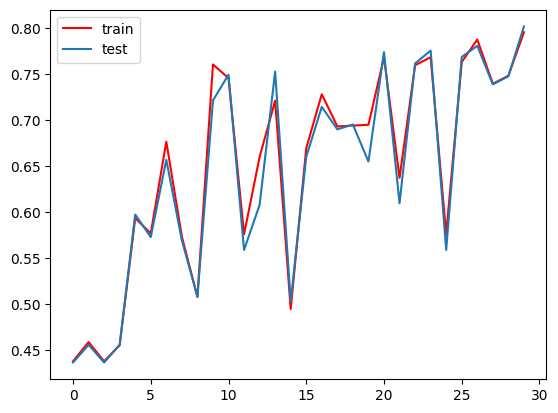

In [74]:
plt.plot(range(30), result_nk[0]["train_acc"], color="r")
plt.plot(range(30), result_nk[0]["test_acc"])
plt.legend(["train","test"])

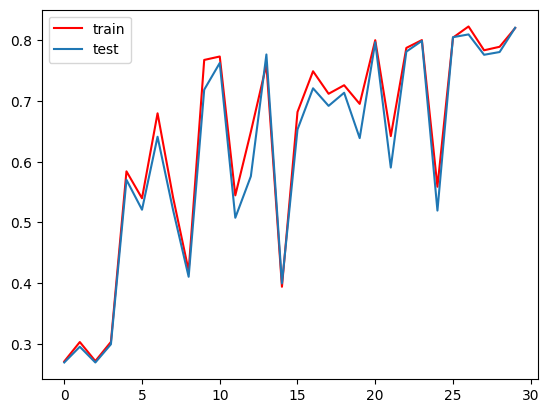

In [75]:
plt.plot(range(30), result_nk[0]["train_f1"], color="r")
plt.plot(range(30), result_nk[0]["test_f1"])
plt.legend(["train","test"])

#### APC

In [76]:
epocas=30
result_apc=[]
y_apc=y3[(y1==2)&(y2==1)]
X_apc=X[(y1==2)&(y2==1)]
pd.DataFrame(y_apc).value_counts()*100/len(y_apc)

0
3    45.611476
2    44.347192
1     7.439825
0     2.601507
Name: count, dtype: float64

In [77]:
weight_apc=np.array([0.026, 0.074, 0.443,0.456])
weight_apc=np.sum(weight_apc)/(len(weight_apc)*weight_apc)
weight_apc

array([9.60576923, 3.375     , 0.56376975, 0.54769737])

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_apc=MLP(256,64,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-3)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:00<00:22,  1.30it/s]

Epoca:  0  Train acc:  0.30926331145149527  Test acc:  0.3136396790663749
Train loss:  1.3814760446548462  Test loss:  1.3822306394577026
Train f1:  0.27815236284305483  Test f1:  0.27704167812421754


  7%|██▉                                         | 2/30 [00:01<00:17,  1.61it/s]

Epoca:  1  Train acc:  0.4839533187454413  Test acc:  0.4784828592268417
Train loss:  1.3752247095108032  Test loss:  1.377279281616211
Train f1:  0.3322990412550208  Test f1:  0.33119306967763884


 10%|████▍                                       | 3/30 [00:02<00:19,  1.37it/s]

Epoca:  2  Train acc:  0.6024799416484318  Test acc:  0.6105032822757112
Train loss:  1.3660484552383423  Test loss:  1.3697686195373535
Train f1:  0.5795678816255065  Test f1:  0.5831677986872629


 13%|█████▊                                      | 4/30 [00:02<00:17,  1.47it/s]

Epoca:  3  Train acc:  0.5091174325309993  Test acc:  0.4886943836615609
Train loss:  1.3501800298690796  Test loss:  1.357144832611084
Train f1:  0.40093291981282214  Test f1:  0.37782906069616157


 17%|███████▎                                    | 5/30 [00:04<00:26,  1.05s/it]

Epoca:  4  Train acc:  0.4890590809628009  Test acc:  0.4799416484318016
Train loss:  1.3274022340774536  Test loss:  1.3405693769454956
Train f1:  0.34532580760120174  Test f1:  0.33557522576284154


 20%|████████▊                                   | 6/30 [00:05<00:21,  1.12it/s]

Epoca:  5  Train acc:  0.5441283734500365  Test acc:  0.5215171407731582
Train loss:  1.2983229160308838  Test loss:  1.3186007738113403
Train f1:  0.47388837021851227  Test f1:  0.44707769949886145


 23%|██████████▎                                 | 7/30 [00:05<00:17,  1.28it/s]

Epoca:  6  Train acc:  0.6203501094091903  Test acc:  0.611962071480671
Train loss:  1.2591402530670166  Test loss:  1.2944681644439697
Train f1:  0.6102707014156076  Test f1:  0.5998112339322004


 27%|███████████▋                                | 8/30 [00:06<00:17,  1.27it/s]

Epoca:  7  Train acc:  0.6626549963530269  Test acc:  0.6542669584245077
Train loss:  1.2429276704788208  Test loss:  1.2970918416976929
Train f1:  0.6564405956230427  Test f1:  0.6482149561835183


 30%|█████████████▏                              | 9/30 [00:08<00:22,  1.06s/it]

Epoca:  8  Train acc:  0.6652078774617067  Test acc:  0.6484318016046682
Train loss:  1.2045964002609253  Test loss:  1.2640331983566284
Train f1:  0.6596763874330528  Test f1:  0.6423365689401992


 33%|██████████████▎                            | 10/30 [00:09<00:21,  1.08s/it]

Epoca:  9  Train acc:  0.6666666666666666  Test acc:  0.6491611962071481
Train loss:  1.164684772491455  Test loss:  1.222913384437561
Train f1:  0.6698754666906945  Test f1:  0.6524683078766647


 37%|███████████████▊                           | 11/30 [00:10<00:21,  1.12s/it]

Epoca:  10  Train acc:  0.5736688548504741  Test acc:  0.5594456601021153
Train loss:  1.1503219604492188  Test loss:  1.1971887350082397
Train f1:  0.6038728783556444  Test f1:  0.5913439404028273


 40%|█████████████████▏                         | 12/30 [00:11<00:20,  1.11s/it]

Epoca:  11  Train acc:  0.5929978118161926  Test acc:  0.5798687089715536
Train loss:  1.1232843399047852  Test loss:  1.1775344610214233
Train f1:  0.6069929525477088  Test f1:  0.5951286357842529


 43%|██████████████████▋                        | 13/30 [00:12<00:17,  1.04s/it]

Epoca:  12  Train acc:  0.6269146608315098  Test acc:  0.6097738876732313
Train loss:  1.0997388362884521  Test loss:  1.1575554609298706
Train f1:  0.6408448796559553  Test f1:  0.6255336970011627


 47%|████████████████████                       | 14/30 [00:13<00:16,  1.05s/it]

Epoca:  13  Train acc:  0.5765864332603938  Test acc:  0.5433989788475565
Train loss:  1.0973767042160034  Test loss:  1.1492620706558228
Train f1:  0.5963434764313209  Test f1:  0.5685562430082552


 50%|█████████████████████▌                     | 15/30 [00:14<00:13,  1.10it/s]

Epoca:  14  Train acc:  0.662290299051787  Test acc:  0.6520787746170679
Train loss:  1.0661237239837646  Test loss:  1.1493825912475586
Train f1:  0.6619160485626827  Test f1:  0.6513310862758879


 53%|██████████████████████▉                    | 16/30 [00:15<00:15,  1.09s/it]

Epoca:  15  Train acc:  0.674690007293946  Test acc:  0.6695842450765864
Train loss:  1.0532646179199219  Test loss:  1.1440258026123047
Train f1:  0.6781735727904862  Test f1:  0.672480273117079


 57%|████████████████████████▎                  | 17/30 [00:15<00:11,  1.11it/s]

Epoca:  16  Train acc:  0.6699489423778264  Test acc:  0.6579139314369074
Train loss:  1.0420258045196533  Test loss:  1.1388258934020996
Train f1:  0.6712934827420773  Test f1:  0.6596350979816727


 60%|█████████████████████████▊                 | 18/30 [00:16<00:10,  1.13it/s]

Epoca:  17  Train acc:  0.6141502552881108  Test acc:  0.6083150984682714
Train loss:  1.029249906539917  Test loss:  1.1152520179748535
Train f1:  0.6222586193185843  Test f1:  0.620618480149623


 63%|███████████████████████████▏               | 19/30 [00:18<00:11,  1.06s/it]

Epoca:  18  Train acc:  0.5729394602479941  Test acc:  0.5492341356673961
Train loss:  1.023423433303833  Test loss:  1.0892211198806763
Train f1:  0.5711076238898892  Test f1:  0.554364581592701


 67%|████████████████████████████▋              | 20/30 [00:20<00:12,  1.26s/it]

Epoca:  19  Train acc:  0.6666666666666666  Test acc:  0.6564551422319475
Train loss:  1.0074023008346558  Test loss:  1.1018755435943604
Train f1:  0.6742459293579415  Test f1:  0.6617570425868697


 70%|██████████████████████████████             | 21/30 [00:21<00:12,  1.35s/it]

Epoca:  20  Train acc:  0.6411378555798687  Test acc:  0.6367614879649891
Train loss:  0.9885923266410828  Test loss:  1.0668553113937378
Train f1:  0.6499890122046732  Test f1:  0.6499109104510986


 73%|███████████████████████████████▌           | 22/30 [00:22<00:10,  1.33s/it]

Epoca:  21  Train acc:  0.6312910284463895  Test acc:  0.6177972283005105
Train loss:  0.9791041016578674  Test loss:  1.0617305040359497
Train f1:  0.6360189730046497  Test f1:  0.6287150952249817


 77%|████████████████████████████████▉          | 23/30 [00:23<00:08,  1.26s/it]

Epoca:  22  Train acc:  0.6097738876732313  Test acc:  0.5915390226112327
Train loss:  0.9728436470031738  Test loss:  1.0462758541107178
Train f1:  0.6264061772559973  Test f1:  0.6149452492806219


 80%|██████████████████████████████████▍        | 24/30 [00:24<00:07,  1.18s/it]

Epoca:  23  Train acc:  0.6593727206418672  Test acc:  0.6513493800145879
Train loss:  0.9561782479286194  Test loss:  1.0486669540405273
Train f1:  0.6647537333624172  Test f1:  0.6617052534542464


 83%|███████████████████████████████████▊       | 25/30 [00:25<00:05,  1.10s/it]

Epoca:  24  Train acc:  0.6418672501823487  Test acc:  0.6345733041575492
Train loss:  0.9513528347015381  Test loss:  1.0491987466812134
Train f1:  0.6564850214425295  Test f1:  0.6513695150904367


 87%|█████████████████████████████████████▎     | 26/30 [00:27<00:05,  1.26s/it]

Epoca:  25  Train acc:  0.637855579868709  Test acc:  0.6301969365426696
Train loss:  0.9439994692802429  Test loss:  1.0245026350021362
Train f1:  0.6503954741311291  Test f1:  0.6475062762901816


 90%|██████████████████████████████████████▋    | 27/30 [00:27<00:02,  1.02it/s]

Epoca:  26  Train acc:  0.662290299051787  Test acc:  0.6549963530269876
Train loss:  0.9370745420455933  Test loss:  1.0283377170562744
Train f1:  0.6728917460887343  Test f1:  0.668663252558355


 93%|████████████████████████████████████████▏  | 28/30 [00:28<00:01,  1.24it/s]

Epoca:  27  Train acc:  0.6367614879649891  Test acc:  0.6309263311451495
Train loss:  0.9410484433174133  Test loss:  1.022883415222168
Train f1:  0.652895269397701  Test f1:  0.6508082441081398


 97%|█████████████████████████████████████████▌ | 29/30 [00:28<00:00,  1.42it/s]

Epoca:  28  Train acc:  0.6075857038657914  Test acc:  0.6032093362509118
Train loss:  0.9383808970451355  Test loss:  1.0150045156478882
Train f1:  0.6374225041865749  Test f1:  0.6388476711054393


100%|███████████████████████████████████████████| 30/30 [00:30<00:00,  1.00s/it]

Epoca:  29  Train acc:  0.674325309992706  Test acc:  0.6659372720641867
Train loss:  0.9074345827102661  Test loss:  1.0084694623947144
Train f1:  0.6853619470858876  Test f1:  0.6792921564740093


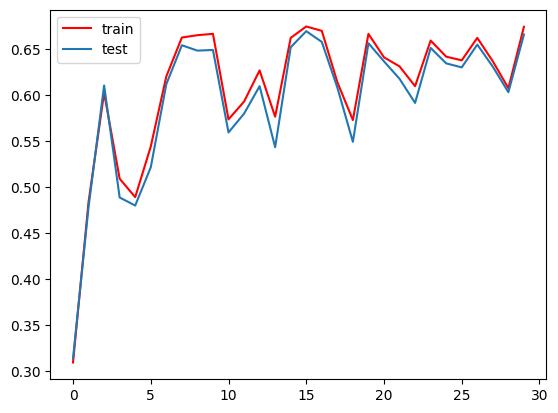

In [79]:
plt.plot(range(30), result_apc[0]["train_acc"], color="r")
plt.plot(range(30), result_apc[0]["test_acc"])
plt.legend(["train","test"])

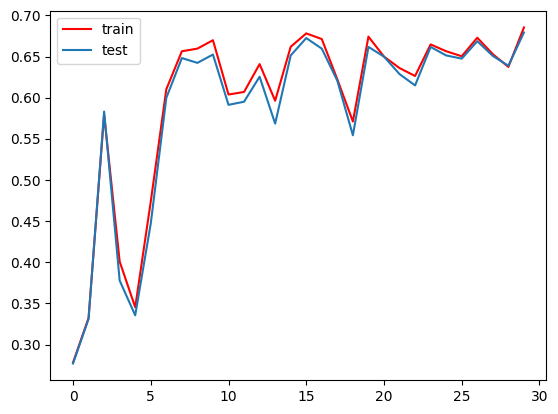

In [80]:
plt.plot(range(30), result_apc[0]["train_f1"], color="r")
plt.plot(range(30), result_apc[0]["test_f1"])
plt.legend(["train","test"])

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_apc=MLP(256,128,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-3)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:01<00:34,  1.20s/it]

Epoca:  0  Train acc:  0.4784828592268417  Test acc:  0.47045951859956237
Train loss:  1.3803746700286865  Test loss:  1.381510853767395
Train f1:  0.3300890990945029  Test f1:  0.32268141842142556


  7%|██▉                                         | 2/30 [00:01<00:24,  1.12it/s]

Epoca:  1  Train acc:  0.6236323851203501  Test acc:  0.6061269146608315
Train loss:  1.3706634044647217  Test loss:  1.3736737966537476
Train f1:  0.6231987940373659  Test f1:  0.610872916858468


 10%|████▍                                       | 3/30 [00:02<00:23,  1.17it/s]

Epoca:  2  Train acc:  0.6404084609773888  Test acc:  0.6265499635302699
Train loss:  1.3529478311538696  Test loss:  1.360129714012146
Train f1:  0.6322019059635822  Test f1:  0.6162697047440757


 13%|█████▊                                      | 4/30 [00:04<00:27,  1.07s/it]

Epoca:  3  Train acc:  0.5437636761487965  Test acc:  0.5280816921954777
Train loss:  1.320279598236084  Test loss:  1.3367083072662354
Train f1:  0.468775520638022  Test f1:  0.44843724126363066


 17%|███████▎                                    | 5/30 [00:05<00:28,  1.14s/it]

Epoca:  4  Train acc:  0.6239970824215901  Test acc:  0.6207148067104303
Train loss:  1.2765461206436157  Test loss:  1.3037664890289307
Train f1:  0.6179696625458002  Test f1:  0.6187236142512755


 20%|████████▊                                   | 6/30 [00:06<00:26,  1.08s/it]

Epoca:  5  Train acc:  0.5762217359591539  Test acc:  0.5674690007293947
Train loss:  1.227781891822815  Test loss:  1.2709810733795166
Train f1:  0.5348645897448564  Test f1:  0.5262155037279492


 23%|██████████▎                                 | 7/30 [00:08<00:30,  1.33s/it]

Epoca:  6  Train acc:  0.6604668125455871  Test acc:  0.6535375638220278
Train loss:  1.1943014860153198  Test loss:  1.261523723602295
Train f1:  0.6594059849762199  Test f1:  0.6524997710211033


 27%|███████████▋                                | 8/30 [00:09<00:28,  1.30s/it]

Epoca:  7  Train acc:  0.6692195477753464  Test acc:  0.6586433260393874
Train loss:  1.1846468448638916  Test loss:  1.271225094795227
Train f1:  0.6650614377303998  Test f1:  0.6532022183355958


 30%|█████████████▏                              | 9/30 [00:09<00:22,  1.06s/it]

Epoca:  8  Train acc:  0.6349380014587892  Test acc:  0.6287381473377097
Train loss:  1.11622154712677  Test loss:  1.1847673654556274
Train f1:  0.6292142119615901  Test f1:  0.6295165289269617


 33%|██████████████▎                            | 10/30 [00:11<00:24,  1.25s/it]

Epoca:  9  Train acc:  0.6721371261852662  Test acc:  0.6593727206418672
Train loss:  1.1036522388458252  Test loss:  1.1940537691116333
Train f1:  0.6742329875888372  Test f1:  0.6597515867518006


 37%|███████████████▊                           | 11/30 [00:12<00:23,  1.24s/it]

Epoca:  10  Train acc:  0.6316557257476295  Test acc:  0.6236323851203501
Train loss:  1.0611530542373657  Test loss:  1.1340316534042358
Train f1:  0.6386766007808012  Test f1:  0.635769114882929


 40%|█████████████████▏                         | 12/30 [00:14<00:23,  1.33s/it]

Epoca:  11  Train acc:  0.5609044493070752  Test acc:  0.5331874544128373
Train loss:  1.0626252889633179  Test loss:  1.124915361404419
Train f1:  0.5827597856311583  Test f1:  0.5604866128496979


 43%|██████████████████▋                        | 13/30 [00:15<00:20,  1.18s/it]

Epoca:  12  Train acc:  0.6331145149525893  Test acc:  0.6185266229029905
Train loss:  1.030462384223938  Test loss:  1.1075624227523804
Train f1:  0.64534819632171  Test f1:  0.6334125516828576


 47%|████████████████████                       | 14/30 [00:16<00:20,  1.30s/it]

Epoca:  13  Train acc:  0.574398249452954  Test acc:  0.5477753464624362
Train loss:  1.0439389944076538  Test loss:  1.1081197261810303
Train f1:  0.5962041749913155  Test f1:  0.5760511474042216


 50%|█████████████████████▌                     | 15/30 [00:17<00:18,  1.25s/it]

Epoca:  14  Train acc:  0.6389496717724289  Test acc:  0.6345733041575492
Train loss:  1.0017895698547363  Test loss:  1.090220332145691
Train f1:  0.6440829972515716  Test f1:  0.6447582834413722


 53%|██████████████████████▉                    | 16/30 [00:18<00:13,  1.03it/s]

Epoca:  15  Train acc:  0.6564551422319475  Test acc:  0.6542669584245077
Train loss:  0.9999053478240967  Test loss:  1.1020835638046265
Train f1:  0.6611868623835196  Test f1:  0.6596262727732339


 57%|████████████████████████▎                  | 17/30 [00:19<00:12,  1.04it/s]

Epoca:  16  Train acc:  0.6477024070021882  Test acc:  0.6411378555798687
Train loss:  0.9807698726654053  Test loss:  1.072879672050476
Train f1:  0.6526719168192356  Test f1:  0.6511560299128872


 60%|█████████████████████████▊                 | 18/30 [00:19<00:10,  1.12it/s]

Epoca:  17  Train acc:  0.6360320933625091  Test acc:  0.6323851203501094
Train loss:  0.9739570021629333  Test loss:  1.0712356567382812
Train f1:  0.6483127288188388  Test f1:  0.6488288852292946


 63%|███████████████████████████▏               | 19/30 [00:20<00:09,  1.12it/s]

Epoca:  18  Train acc:  0.6553610503282276  Test acc:  0.6469730123997083
Train loss:  0.9611707925796509  Test loss:  1.060178518295288
Train f1:  0.6603643941693418  Test f1:  0.6562950845828389


 67%|████████████████████████████▋              | 20/30 [00:21<00:08,  1.19it/s]

Epoca:  19  Train acc:  0.6287381473377097  Test acc:  0.6214442013129103
Train loss:  0.9516655802726746  Test loss:  1.0424433946609497
Train f1:  0.6477047526047018  Test f1:  0.6448976254248853


 70%|██████████████████████████████             | 21/30 [00:22<00:07,  1.25it/s]

Epoca:  20  Train acc:  0.6167031363967906  Test acc:  0.5951859956236324
Train loss:  0.9521088600158691  Test loss:  1.0338338613510132
Train f1:  0.6368678437187205  Test f1:  0.6207710813276699


 73%|███████████████████████████████▌           | 22/30 [00:22<00:05,  1.40it/s]

Epoca:  21  Train acc:  0.637126185266229  Test acc:  0.6294675419401896
Train loss:  0.9293205738067627  Test loss:  1.0241148471832275
Train f1:  0.6496977102729863  Test f1:  0.6467298149623765


 77%|████████████████████████████████▉          | 23/30 [00:23<00:05,  1.21it/s]

Epoca:  22  Train acc:  0.6794310722100656  Test acc:  0.6688548504741065
Train loss:  0.9557585716247559  Test loss:  1.0898215770721436
Train f1:  0.6877652390585208  Test f1:  0.6771343070567909


 80%|██████████████████████████████████▍        | 24/30 [00:24<00:05,  1.20it/s]

Epoca:  23  Train acc:  0.6900072939460248  Test acc:  0.687819110138585
Train loss:  0.939972460269928  Test loss:  1.0702310800552368
Train f1:  0.6899555684777218  Test f1:  0.6894610687178327


 83%|███████████████████████████████████▊       | 25/30 [00:25<00:03,  1.39it/s]

Epoca:  24  Train acc:  0.6604668125455871  Test acc:  0.6477024070021882
Train loss:  0.9223633408546448  Test loss:  1.0428640842437744
Train f1:  0.6785677619070157  Test f1:  0.6660086755019398


 87%|█████████████████████████████████████▎     | 26/30 [00:25<00:02,  1.38it/s]

Epoca:  25  Train acc:  0.6969365426695843  Test acc:  0.6863603209336251
Train loss:  0.9317243099212646  Test loss:  1.0715166330337524
Train f1:  0.6987455724779654  Test f1:  0.6873192895877748


 90%|██████████████████████████████████████▋    | 27/30 [00:27<00:02,  1.04it/s]

Epoca:  26  Train acc:  0.6761487964989059  Test acc:  0.6520787746170679
Train loss:  0.9263597130775452  Test loss:  1.061809778213501
Train f1:  0.6975763207775665  Test f1:  0.6745457324349918


 93%|████████████████████████████████████████▏  | 28/30 [00:28<00:02,  1.09s/it]

Epoca:  27  Train acc:  0.6987600291757841  Test acc:  0.6812545587162655
Train loss:  0.8987752795219421  Test loss:  1.0344936847686768
Train f1:  0.7061032312605953  Test f1:  0.6870112739739545


 97%|█████████████████████████████████████████▌ | 29/30 [00:29<00:00,  1.02it/s]

Epoca:  28  Train acc:  0.6779722830051058  Test acc:  0.6659372720641867
Train loss:  0.8732499480247498  Test loss:  0.9902099967002869
Train f1:  0.6862855769922928  Test f1:  0.6782962308902171


100%|███████████████████████████████████████████| 30/30 [00:30<00:00,  1.01s/it]

Epoca:  29  Train acc:  0.6363967906637491  Test acc:  0.6258205689277899
Train loss:  0.8691850900650024  Test loss:  0.9735362529754639
Train f1:  0.6591116088844944  Test f1:  0.6554142868103058


In [82]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_apc=MLP(512,128,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-3)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:00<00:28,  1.02it/s]

Epoca:  0  Train acc:  0.5601750547045952  Test acc:  0.5543398978847557
Train loss:  1.3710739612579346  Test loss:  1.3747433423995972
Train f1:  0.5035173151876595  Test f1:  0.49784875170836573


  7%|██▉                                         | 2/30 [00:01<00:19,  1.47it/s]

Epoca:  1  Train acc:  0.6469730123997083  Test acc:  0.6331145149525893
Train loss:  1.3470628261566162  Test loss:  1.3556573390960693
Train f1:  0.6389471778012528  Test f1:  0.6218689274751718


 10%|████▍                                       | 3/30 [00:02<00:24,  1.09it/s]

Epoca:  2  Train acc:  0.6185266229029905  Test acc:  0.611232676878191
Train loss:  1.3078773021697998  Test loss:  1.3259351253509521
Train f1:  0.6106012149963442  Test f1:  0.6021650526924139


 13%|█████▊                                      | 4/30 [00:03<00:18,  1.39it/s]

Epoca:  3  Train acc:  0.5795040116703136  Test acc:  0.5820568927789934
Train loss:  1.2627978324890137  Test loss:  1.29105544090271
Train f1:  0.557745771138585  Test f1:  0.5634434502949016


 17%|███████▎                                    | 5/30 [00:03<00:15,  1.57it/s]

Epoca:  4  Train acc:  0.5908096280087527  Test acc:  0.5900802334062728
Train loss:  1.2184463739395142  Test loss:  1.2575446367263794
Train f1:  0.5874547417532974  Test f1:  0.5941156879981279


 20%|████████▊                                   | 6/30 [00:05<00:26,  1.09s/it]

Epoca:  5  Train acc:  0.5882567469000729  Test acc:  0.5696571845368344
Train loss:  1.1789103746414185  Test loss:  1.2219195365905762
Train f1:  0.6017187885603262  Test f1:  0.5888435024979866


 23%|██████████▎                                 | 7/30 [00:06<00:23,  1.02s/it]

Epoca:  6  Train acc:  0.5317286652078774  Test acc:  0.5178701677607586
Train loss:  1.1431326866149902  Test loss:  1.1903581619262695
Train f1:  0.5371963685521738  Test f1:  0.5278215982597096


 27%|███████████▋                                | 8/30 [00:08<00:28,  1.28s/it]

Epoca:  7  Train acc:  0.6436907366885485  Test acc:  0.6301969365426696
Train loss:  1.0942513942718506  Test loss:  1.15683913230896
Train f1:  0.6490424900666697  Test f1:  0.6393460107806545


 30%|█████████████▏                              | 9/30 [00:09<00:23,  1.14s/it]

Epoca:  8  Train acc:  0.6699489423778264  Test acc:  0.6593727206418672
Train loss:  1.1396883726119995  Test loss:  1.242537498474121
Train f1:  0.6700340741892836  Test f1:  0.659789676173145


 33%|██████████████▎                            | 10/30 [00:09<00:19,  1.00it/s]

Epoca:  9  Train acc:  0.6670313639679066  Test acc:  0.6520787746170679
Train loss:  1.0627621412277222  Test loss:  1.151309609413147
Train f1:  0.6682571923163962  Test f1:  0.653530221664641


 37%|███████████████▊                           | 11/30 [00:10<00:16,  1.17it/s]

Epoca:  10  Train acc:  0.5722100656455142  Test acc:  0.549963530269876
Train loss:  1.0445215702056885  Test loss:  1.104771375656128
Train f1:  0.5786761282411448  Test f1:  0.5601538035835962


 40%|█████████████████▏                         | 12/30 [00:11<00:16,  1.08it/s]

Epoca:  11  Train acc:  0.6075857038657914  Test acc:  0.6032093362509118
Train loss:  1.0253338813781738  Test loss:  1.099793791770935
Train f1:  0.6152996458017951  Test f1:  0.6162214277031862


 43%|██████████████████▋                        | 13/30 [00:12<00:16,  1.02it/s]

Epoca:  12  Train acc:  0.6385849744711889  Test acc:  0.6331145149525893
Train loss:  0.9997798204421997  Test loss:  1.0786592960357666
Train f1:  0.6442103690440424  Test f1:  0.6424245862054435


 47%|████████████████████                       | 14/30 [00:13<00:13,  1.16it/s]

Epoca:  13  Train acc:  0.6517140773158279  Test acc:  0.6367614879649891
Train loss:  0.9841050505638123  Test loss:  1.0715816020965576
Train f1:  0.6618057586758797  Test f1:  0.6500613671656552


 50%|█████████████████████▌                     | 15/30 [00:14<00:16,  1.08s/it]

Epoca:  14  Train acc:  0.674690007293946  Test acc:  0.6637490882567469
Train loss:  1.0283399820327759  Test loss:  1.1382943391799927
Train f1:  0.6684522972414327  Test f1:  0.6606693300855992


 53%|██████████████████████▉                    | 16/30 [00:15<00:12,  1.10it/s]

Epoca:  15  Train acc:  0.5911743253099927  Test acc:  0.5703865791393143
Train loss:  0.9869667291641235  Test loss:  1.0799634456634521
Train f1:  0.6319308629588387  Test f1:  0.6153588266473277


 57%|████████████████████████▎                  | 17/30 [00:16<00:14,  1.13s/it]

Epoca:  16  Train acc:  0.6415025528811087  Test acc:  0.6301969365426696
Train loss:  0.9489889144897461  Test loss:  1.0269638299942017
Train f1:  0.6463332314178869  Test f1:  0.6414878082644518


 60%|█████████████████████████▊                 | 18/30 [00:18<00:14,  1.21s/it]

Epoca:  17  Train acc:  0.4854121079504012  Test acc:  0.4711889132020423
Train loss:  0.9766440391540527  Test loss:  1.0423576831817627
Train f1:  0.5158712173533239  Test f1:  0.5040186688815949


 63%|███████████████████████████▏               | 19/30 [00:19<00:14,  1.29s/it]

Epoca:  18  Train acc:  0.6768781911013858  Test acc:  0.662290299051787
Train loss:  0.9194967150688171  Test loss:  1.0145801305770874
Train f1:  0.6833438218294094  Test f1:  0.672182492398514


 67%|████████████████████████████▋              | 20/30 [00:21<00:16,  1.60s/it]

Epoca:  19  Train acc:  0.6083150984682714  Test acc:  0.5966447848285923
Train loss:  0.9351913332939148  Test loss:  1.0008268356323242
Train f1:  0.6149007210704597  Test f1:  0.6117132611578096


 70%|██████████████████████████████             | 21/30 [00:24<00:16,  1.80s/it]

Epoca:  20  Train acc:  0.5182348650619986  Test acc:  0.50036469730124
Train loss:  0.9417482018470764  Test loss:  1.0081453323364258
Train f1:  0.5719316762388522  Test f1:  0.5589625534548446


 73%|███████████████████████████████▌           | 22/30 [00:25<00:12,  1.58s/it]

Epoca:  21  Train acc:  0.6677607585703865  Test acc:  0.6644784828592268
Train loss:  0.8877468109130859  Test loss:  0.9845834970474243
Train f1:  0.6841890671886781  Test f1:  0.682300123848898


 77%|████████████████████████████████▉          | 23/30 [00:26<00:10,  1.47s/it]

Epoca:  22  Train acc:  0.6487964989059081  Test acc:  0.6455142231947484
Train loss:  0.8951926827430725  Test loss:  0.994878351688385
Train f1:  0.6763111158766637  Test f1:  0.6718887479263722


 80%|██████████████████████████████████▍        | 24/30 [00:26<00:06,  1.15s/it]

Epoca:  23  Train acc:  0.6057622173595916  Test acc:  0.5937272064186725
Train loss:  0.9167675375938416  Test loss:  0.9801080226898193
Train f1:  0.6320474785197748  Test f1:  0.6278337997499104


 83%|███████████████████████████████████▊       | 25/30 [00:27<00:04,  1.02it/s]

Epoca:  24  Train acc:  0.6491611962071481  Test acc:  0.6389496717724289
Train loss:  0.8748999834060669  Test loss:  0.9538507461547852
Train f1:  0.6648221887074491  Test f1:  0.6603051765295067


 87%|█████████████████████████████████████▎     | 26/30 [00:28<00:04,  1.07s/it]

Epoca:  25  Train acc:  0.6630196936542669  Test acc:  0.6520787746170679
Train loss:  0.8545563220977783  Test loss:  0.9481882452964783
Train f1:  0.6866169182944977  Test f1:  0.6778844058876675


 90%|██████████████████████████████████████▋    | 27/30 [00:29<00:03,  1.06s/it]

Epoca:  26  Train acc:  0.7206418672501823  Test acc:  0.7104303428154631
Train loss:  0.8648878335952759  Test loss:  0.9936738610267639
Train f1:  0.7232718807004105  Test f1:  0.712497217460607


 93%|████████████████████████████████████████▏  | 28/30 [00:31<00:02,  1.11s/it]

Epoca:  27  Train acc:  0.6845368344274252  Test acc:  0.674690007293946
Train loss:  0.8318468928337097  Test loss:  0.943774402141571
Train f1:  0.6906675785907987  Test f1:  0.6854010865838838


 97%|█████████████████████████████████████████▌ | 29/30 [00:32<00:01,  1.26s/it]

Epoca:  28  Train acc:  0.6801604668125456  Test acc:  0.6688548504741065
Train loss:  0.8318489789962769  Test loss:  0.9403760433197021
Train f1:  0.6825626057736545  Test f1:  0.6762301173620255


100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.14s/it]

Epoca:  29  Train acc:  0.6298322392414296  Test acc:  0.6207148067104303
Train loss:  0.8241757154464722  Test loss:  0.9286597967147827
Train f1:  0.6502283977585823  Test f1:  0.648282081359287


In [83]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_apc=MLP(512,128,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-4)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:01<00:46,  1.61s/it]

Epoca:  0  Train acc:  0.4434719183078045  Test acc:  0.4434719183078045
Train loss:  1.3864232301712036  Test loss:  1.3864808082580566
Train f1:  0.2724920933109097  Test f1:  0.2724920933109097


  7%|██▉                                         | 2/30 [00:03<00:53,  1.90s/it]

Epoca:  1  Train acc:  0.4434719183078045  Test acc:  0.4434719183078045
Train loss:  1.3847180604934692  Test loss:  1.3850128650665283
Train f1:  0.2724920933109097  Test f1:  0.2724920933109097


 10%|████▍                                       | 3/30 [00:04<00:40,  1.50s/it]

Epoca:  2  Train acc:  0.4434719183078045  Test acc:  0.4434719183078045
Train loss:  1.3831677436828613  Test loss:  1.3837264776229858
Train f1:  0.2724920933109097  Test f1:  0.2724920933109097


 13%|█████▊                                      | 4/30 [00:05<00:31,  1.23s/it]

Epoca:  3  Train acc:  0.4522246535375638  Test acc:  0.4427425237053246
Train loss:  1.3814481496810913  Test loss:  1.3823171854019165
Train f1:  0.30083835129936737  Test f1:  0.2921913645785743


 17%|███████▎                                    | 5/30 [00:07<00:39,  1.60s/it]

Epoca:  4  Train acc:  0.6331145149525893  Test acc:  0.6345733041575492
Train loss:  1.3797166347503662  Test loss:  1.3808788061141968
Train f1:  0.6229826730630059  Test f1:  0.624580669335634


 20%|████████▊                                   | 6/30 [00:09<00:40,  1.68s/it]

Epoca:  5  Train acc:  0.5787746170678337  Test acc:  0.563092633114515
Train loss:  1.3779323101043701  Test loss:  1.379423975944519
Train f1:  0.5503480384730478  Test f1:  0.5248074521461225


 23%|██████████▎                                 | 7/30 [00:12<00:44,  1.94s/it]

Epoca:  6  Train acc:  0.6269146608315098  Test acc:  0.6199854121079504
Train loss:  1.3759516477584839  Test loss:  1.3778337240219116
Train f1:  0.6200506983651632  Test f1:  0.6108631959496035


 27%|███████████▋                                | 8/30 [00:13<00:38,  1.77s/it]

Epoca:  7  Train acc:  0.6327498176513494  Test acc:  0.62509117432531
Train loss:  1.3737655878067017  Test loss:  1.3760795593261719
Train f1:  0.6240583223828435  Test f1:  0.615530883305693


 30%|█████████████▏                              | 9/30 [00:15<00:37,  1.77s/it]

Epoca:  8  Train acc:  0.6101385849744712  Test acc:  0.6068563092633115
Train loss:  1.371247410774231  Test loss:  1.3740158081054688
Train f1:  0.5990042550584784  Test f1:  0.593400934626043


 33%|██████████████▎                            | 10/30 [00:17<00:36,  1.81s/it]

Epoca:  9  Train acc:  0.6090444930707513  Test acc:  0.5988329686360321
Train loss:  1.3685988187789917  Test loss:  1.3718976974487305
Train f1:  0.5980175761643962  Test f1:  0.5849085947419289


 37%|███████████████▊                           | 11/30 [00:17<00:26,  1.38s/it]

Epoca:  10  Train acc:  0.6214442013129103  Test acc:  0.611962071480671
Train loss:  1.3655747175216675  Test loss:  1.3695555925369263
Train f1:  0.6128688631086513  Test f1:  0.6013194136585932


 40%|█████████████████▏                         | 12/30 [00:18<00:19,  1.09s/it]

Epoca:  11  Train acc:  0.5889861415025529  Test acc:  0.5944566010211525
Train loss:  1.3622037172317505  Test loss:  1.3669142723083496
Train f1:  0.5704716016081972  Test f1:  0.5742662311539344


 43%|██████████████████▋                        | 13/30 [00:18<00:15,  1.09it/s]

Epoca:  12  Train acc:  0.6145149525893508  Test acc:  0.6061269146608315
Train loss:  1.3585789203643799  Test loss:  1.3641334772109985
Train f1:  0.6039140373614623  Test f1:  0.5943107430140726


 47%|████████████████████                       | 14/30 [00:20<00:18,  1.14s/it]

Epoca:  13  Train acc:  0.612691466083151  Test acc:  0.6024799416484318
Train loss:  1.3544878959655762  Test loss:  1.3611799478530884
Train f1:  0.601243838348371  Test f1:  0.5880736197532922


 50%|█████████████████████▌                     | 15/30 [00:22<00:20,  1.39s/it]

Epoca:  14  Train acc:  0.587527352297593  Test acc:  0.5959153902261123
Train loss:  1.3500277996063232  Test loss:  1.35774564743042
Train f1:  0.567914740184617  Test f1:  0.5752802506920192


 53%|██████████████████████▉                    | 16/30 [00:24<00:23,  1.68s/it]

Epoca:  15  Train acc:  0.6156090444930707  Test acc:  0.6010211524434719
Train loss:  1.344177484512329  Test loss:  1.3533093929290771
Train f1:  0.6087719190180897  Test f1:  0.5931807792680013


 57%|████████████████████████▎                  | 17/30 [00:26<00:21,  1.65s/it]

Epoca:  16  Train acc:  0.5835156819839533  Test acc:  0.5915390226112327
Train loss:  1.3381307125091553  Test loss:  1.3490854501724243
Train f1:  0.5599954093640879  Test f1:  0.5666642077913452


 60%|█████████████████████████▊                 | 18/30 [00:27<00:20,  1.69s/it]

Epoca:  17  Train acc:  0.6487964989059081  Test acc:  0.6360320933625091
Train loss:  1.331472635269165  Test loss:  1.3443769216537476
Train f1:  0.6460936574224643  Test f1:  0.634017651301814


 63%|███████████████████████████▏               | 19/30 [00:28<00:16,  1.51s/it]

Epoca:  18  Train acc:  0.6535375638220278  Test acc:  0.6331145149525893
Train loss:  1.323691487312317  Test loss:  1.3384144306182861
Train f1:  0.6520604280928685  Test f1:  0.6330812749439341


 67%|████████████████████████████▋              | 20/30 [00:29<00:12,  1.22s/it]

Epoca:  19  Train acc:  0.6393143690736689  Test acc:  0.62509117432531
Train loss:  1.3167625665664673  Test loss:  1.3337444067001343
Train f1:  0.6347136954375707  Test f1:  0.621099433657229


 70%|██████████████████████████████             | 21/30 [00:30<00:11,  1.25s/it]

Epoca:  20  Train acc:  0.6513493800145879  Test acc:  0.637490882567469
Train loss:  1.3099983930587769  Test loss:  1.329386591911316
Train f1:  0.6478734001288968  Test f1:  0.6340155396998078


 73%|███████████████████████████████▌           | 22/30 [00:32<00:09,  1.24s/it]

Epoca:  21  Train acc:  0.6524434719183078  Test acc:  0.6294675419401896
Train loss:  1.3023699522018433  Test loss:  1.3228949308395386
Train f1:  0.6519104751228405  Test f1:  0.6296049535551635


 77%|████████████████████████████████▉          | 23/30 [00:33<00:09,  1.31s/it]

Epoca:  22  Train acc:  0.6535375638220278  Test acc:  0.6396790663749088
Train loss:  1.2954072952270508  Test loss:  1.318914532661438
Train f1:  0.652094411935708  Test f1:  0.637497072403193


 80%|██████████████████████████████████▍        | 24/30 [00:34<00:07,  1.25s/it]

Epoca:  23  Train acc:  0.6396790663749088  Test acc:  0.6301969365426696
Train loss:  1.2871674299240112  Test loss:  1.3134045600891113
Train f1:  0.6361651391594795  Test f1:  0.6267154647406862


 83%|███████████████████████████████████▊       | 25/30 [00:35<00:06,  1.21s/it]

Epoca:  24  Train acc:  0.6557257476294676  Test acc:  0.6404084609773888
Train loss:  1.2793006896972656  Test loss:  1.3078036308288574
Train f1:  0.6552486798518692  Test f1:  0.6402679441017407


 87%|█████████████████████████████████████▎     | 26/30 [00:37<00:05,  1.33s/it]

Epoca:  25  Train acc:  0.650619985412108  Test acc:  0.6229029905178701
Train loss:  1.2721688747406006  Test loss:  1.3018635511398315
Train f1:  0.6498690371001585  Test f1:  0.6229472199077929


 90%|██████████████████████████████████████▋    | 27/30 [00:38<00:03,  1.25s/it]

Epoca:  26  Train acc:  0.6597374179431073  Test acc:  0.6418672501823487
Train loss:  1.2658900022506714  Test loss:  1.29987370967865
Train f1:  0.6587052865142197  Test f1:  0.6406833429386812


 93%|████████████████████████████████████████▏  | 28/30 [00:39<00:02,  1.14s/it]

Epoca:  27  Train acc:  0.6393143690736689  Test acc:  0.6199854121079504
Train loss:  1.2580183744430542  Test loss:  1.2927446365356445
Train f1:  0.6349183657091529  Test f1:  0.6157477947163911


 97%|█████████████████████████████████████████▌ | 29/30 [00:40<00:01,  1.29s/it]

Epoca:  28  Train acc:  0.6579139314369074  Test acc:  0.6389496717724289
Train loss:  1.2508896589279175  Test loss:  1.2874948978424072
Train f1:  0.6581359454950513  Test f1:  0.6407676115514467


100%|███████████████████████████████████████████| 30/30 [00:41<00:00,  1.38s/it]

Epoca:  29  Train acc:  0.6611962071480671  Test acc:  0.6469730123997083
Train loss:  1.2443708181381226  Test loss:  1.2834511995315552
Train f1:  0.6609947076117946  Test f1:  0.6482371179127325


In [84]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=256,num_workers=8, shuffle=True)

model_apc=MLP2(512,256,64,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-3)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:00<00:25,  1.14it/s]

Epoca:  0  Train acc:  0.025893508388037927  Test acc:  0.0262582056892779
Train loss:  1.3812514543533325  Test loss:  1.3819876909255981
Train f1:  0.0013071020942415164  Test f1:  0.001343703489429999


  7%|██▉                                         | 2/30 [00:02<00:29,  1.07s/it]

Epoca:  1  Train acc:  0.6429613420860686  Test acc:  0.6287381473377097
Train loss:  1.3632922172546387  Test loss:  1.367415189743042
Train f1:  0.6387905734172717  Test f1:  0.6281604901702297


 10%|████▍                                       | 3/30 [00:02<00:26,  1.03it/s]

Epoca:  2  Train acc:  0.6174325309992706  Test acc:  0.6046681254558717
Train loss:  1.313460111618042  Test loss:  1.3306045532226562
Train f1:  0.6076841121957941  Test f1:  0.5975955238368271


 13%|█████▊                                      | 4/30 [00:04<00:26,  1.01s/it]

Epoca:  3  Train acc:  0.563457330415755  Test acc:  0.5470459518599562
Train loss:  1.2474651336669922  Test loss:  1.287088394165039
Train f1:  0.5117140834522089  Test f1:  0.4916232788628095


 17%|███████▎                                    | 5/30 [00:04<00:22,  1.10it/s]

Epoca:  4  Train acc:  0.5361050328227571  Test acc:  0.5185995623632386
Train loss:  1.1844497919082642  Test loss:  1.237270712852478
Train f1:  0.5393453723012334  Test f1:  0.5333136551317019


 20%|████████▊                                   | 6/30 [00:07<00:37,  1.58s/it]

Epoca:  5  Train acc:  0.5043763676148797  Test acc:  0.47556528081692195
Train loss:  1.1398881673812866  Test loss:  1.1941112279891968
Train f1:  0.5050166134255598  Test f1:  0.47886752112076825


 23%|██████████▎                                 | 7/30 [00:10<00:46,  2.03s/it]

Epoca:  6  Train acc:  0.5802334062727936  Test acc:  0.5660102115244348
Train loss:  1.0607290267944336  Test loss:  1.1365821361541748
Train f1:  0.5847616905711363  Test f1:  0.5751155589272152


 27%|███████████▋                                | 8/30 [00:12<00:44,  2.02s/it]

Epoca:  7  Train acc:  0.5218818380743983  Test acc:  0.50036469730124
Train loss:  1.046140432357788  Test loss:  1.1097732782363892
Train f1:  0.5437408322657531  Test f1:  0.527415851155969


 30%|█████████████▏                              | 9/30 [00:12<00:31,  1.51s/it]

Epoca:  8  Train acc:  0.6688548504741065  Test acc:  0.6571845368344275
Train loss:  1.0162873268127441  Test loss:  1.1388635635375977
Train f1:  0.6773322692105156  Test f1:  0.6639990559280977


 33%|██████████████▎                            | 10/30 [00:13<00:24,  1.22s/it]

Epoca:  9  Train acc:  0.5915390226112327  Test acc:  0.563092633114515
Train loss:  1.006517767906189  Test loss:  1.0924437046051025
Train f1:  0.6041792241325128  Test f1:  0.582458150893124


 37%|███████████████▊                           | 11/30 [00:15<00:25,  1.34s/it]

Epoca:  10  Train acc:  0.6765134938001459  Test acc:  0.6666666666666666
Train loss:  0.9754912853240967  Test loss:  1.1113864183425903
Train f1:  0.6811700615305554  Test f1:  0.6714695754988519


 40%|█████████████████▏                         | 12/30 [00:16<00:22,  1.28s/it]

Epoca:  11  Train acc:  0.6688548504741065  Test acc:  0.6528081692195478
Train loss:  0.9397882223129272  Test loss:  1.064115047454834
Train f1:  0.6817795776572776  Test f1:  0.6674649943553738


 43%|██████████████████▋                        | 13/30 [00:17<00:19,  1.14s/it]

Epoca:  12  Train acc:  0.6863603209336251  Test acc:  0.6673960612691466
Train loss:  0.9665173292160034  Test loss:  1.1356362104415894
Train f1:  0.6924718035604376  Test f1:  0.6727138509864731


 47%|████████████████████                       | 14/30 [00:17<00:15,  1.01it/s]

Epoca:  13  Train acc:  0.5466812545587163  Test acc:  0.5295404814004376
Train loss:  0.9428980946540833  Test loss:  1.0288357734680176
Train f1:  0.5928611999951049  Test f1:  0.5829653935884791


 50%|█████████████████████▌                     | 15/30 [00:18<00:13,  1.08it/s]

Epoca:  14  Train acc:  0.6994894237782641  Test acc:  0.6841721371261853
Train loss:  0.9504252076148987  Test loss:  1.1370320320129395
Train f1:  0.7022537578828892  Test f1:  0.6867157820697366


 53%|██████████████████████▉                    | 16/30 [00:20<00:16,  1.15s/it]

Epoca:  15  Train acc:  0.6345733041575492  Test acc:  0.6309263311451495
Train loss:  0.8747621178627014  Test loss:  0.9924678206443787
Train f1:  0.6612091436867059  Test f1:  0.6612704087625247


 57%|████████████████████████▎                  | 17/30 [00:22<00:18,  1.39s/it]

Epoca:  16  Train acc:  0.6801604668125456  Test acc:  0.661560904449307
Train loss:  0.8806297779083252  Test loss:  1.006188988685608
Train f1:  0.6869397761160662  Test f1:  0.6731736179024215


 60%|█████████████████████████▊                 | 18/30 [00:22<00:14,  1.22s/it]

Epoca:  17  Train acc:  0.674690007293946  Test acc:  0.6637490882567469
Train loss:  0.854836642742157  Test loss:  1.0040079355239868
Train f1:  0.6956013822145796  Test f1:  0.6858457237844271


 63%|███████████████████████████▏               | 19/30 [00:23<00:12,  1.09s/it]

Epoca:  18  Train acc:  0.6765134938001459  Test acc:  0.6652078774617067
Train loss:  0.8407441973686218  Test loss:  0.9789023399353027
Train f1:  0.6827761631169644  Test f1:  0.676492288121081


 67%|████████████████████████████▋              | 20/30 [00:24<00:09,  1.09it/s]

Epoca:  19  Train acc:  0.6907366885485048  Test acc:  0.6863603209336251
Train loss:  0.8266754150390625  Test loss:  0.9977128505706787
Train f1:  0.7018663847461035  Test f1:  0.6976807867110209


 70%|██████████████████████████████             | 21/30 [00:25<00:09,  1.07s/it]

Epoca:  20  Train acc:  0.5897155361050328  Test acc:  0.5864332603938731
Train loss:  0.8399085998535156  Test loss:  0.9517293572425842
Train f1:  0.6363715399469272  Test f1:  0.6403208078173208


 73%|███████████████████████████████▌           | 22/30 [00:26<00:07,  1.14it/s]

Epoca:  21  Train acc:  0.687819110138585  Test acc:  0.6819839533187454
Train loss:  0.8048900365829468  Test loss:  0.9603070616722107
Train f1:  0.7040411750896493  Test f1:  0.7008199300348309


 77%|████████████████████████████████▉          | 23/30 [00:26<00:05,  1.28it/s]

Epoca:  22  Train acc:  0.6838074398249453  Test acc:  0.6768781911013858
Train loss:  0.8058214783668518  Test loss:  0.9440482258796692
Train f1:  0.6946296421960856  Test f1:  0.6918747184501661


 80%|██████████████████████████████████▍        | 24/30 [00:27<00:05,  1.09it/s]

Epoca:  23  Train acc:  0.5404814004376368  Test acc:  0.5229759299781181
Train loss:  0.8799976706504822  Test loss:  0.9584729075431824
Train f1:  0.5931504988907941  Test f1:  0.5804604759933331


 83%|███████████████████████████████████▊       | 25/30 [00:28<00:04,  1.05it/s]

Epoca:  24  Train acc:  0.6819839533187454  Test acc:  0.6644784828592268
Train loss:  0.7884727120399475  Test loss:  0.9475848078727722
Train f1:  0.6912913412236372  Test f1:  0.6772287033970094


 87%|█████████████████████████████████████▎     | 26/30 [00:29<00:03,  1.08it/s]

Epoca:  25  Train acc:  0.6973012399708242  Test acc:  0.6900072939460248
Train loss:  0.779108464717865  Test loss:  0.9702757000923157
Train f1:  0.7048956041187197  Test f1:  0.6996730156868588


 90%|██████████████████████████████████████▋    | 27/30 [00:31<00:03,  1.09s/it]

Epoca:  26  Train acc:  0.7403355215171408  Test acc:  0.7366885485047411
Train loss:  0.7887787818908691  Test loss:  0.9968261122703552
Train f1:  0.7424499570864961  Test f1:  0.7376274247791791


 93%|████████████████████████████████████████▏  | 28/30 [00:32<00:02,  1.23s/it]

Epoca:  27  Train acc:  0.7082421590080233  Test acc:  0.7060539752005836
Train loss:  0.7477170825004578  Test loss:  0.9253365397453308
Train f1:  0.7241779084379469  Test f1:  0.7237411447472707


 97%|█████████████████████████████████████████▌ | 29/30 [00:33<00:01,  1.17s/it]

Epoca:  28  Train acc:  0.6608315098468271  Test acc:  0.649890590809628
Train loss:  0.7466685771942139  Test loss:  0.9252194762229919
Train f1:  0.6864135665847279  Test f1:  0.6809686476189935


100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.16s/it]

Epoca:  29  Train acc:  0.7297592997811816  Test acc:  0.7242888402625821
Train loss:  0.7695710062980652  Test loss:  0.9468680620193481
Train f1:  0.7267997218147387  Test f1:  0.7242929096806427


In [85]:
X_train, X_test, y_train, y_test=train_test_split(X_apc,y_apc,test_size=1/3,random_state=42, stratify=y_apc)

train_dataset=TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long))
train_loader=DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
test_dataset=TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long))
test_loader=DataLoader(test_dataset, batch_size=32,num_workers=8, shuffle=True)

model_apc=MLP(512,128,4).to(device)
optimizer_apc=torch.optim.Adam(model_apc.parameters(), lr=1e-3)
loss_fn_apc=nn.CrossEntropyLoss(torch.tensor(weight_apc, dtype=torch.float32))

print("APC")
result_apc.append(train_test_all_epoch("APC",model_apc, train_loader, torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.long),
                                     torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.long),optimizer_apc, loss_fn_apc, device)) 

APC


  3%|█▍                                          | 1/30 [00:04<01:58,  4.08s/it]

Epoca:  0  Train acc:  0.5933625091174325  Test acc:  0.5820568927789934
Train loss:  1.299421787261963  Test loss:  1.3232308626174927
Train f1:  0.5980422137080338  Test f1:  0.5912825814753301


  7%|██▉                                         | 2/30 [00:12<03:01,  6.47s/it]

Epoca:  1  Train acc:  0.6688548504741065  Test acc:  0.674690007293946
Train loss:  1.2551523447036743  Test loss:  1.3471221923828125
Train f1:  0.6517179380992921  Test f1:  0.6581288791337445


 10%|████▍                                       | 3/30 [00:17<02:34,  5.72s/it]

Epoca:  2  Train acc:  0.6604668125455871  Test acc:  0.6535375638220278
Train loss:  1.0595629215240479  Test loss:  1.1608283519744873
Train f1:  0.6573847229364226  Test f1:  0.6532225849887121


 13%|█████▊                                      | 4/30 [00:23<02:31,  5.84s/it]

Epoca:  3  Train acc:  0.6641137855579868  Test acc:  0.6586433260393874
Train loss:  0.9815480709075928  Test loss:  1.0748344659805298
Train f1:  0.6680430261858341  Test f1:  0.6660211352547817


 17%|███████▎                                    | 5/30 [00:27<02:16,  5.46s/it]

Epoca:  4  Train acc:  0.6761487964989059  Test acc:  0.6673960612691466
Train loss:  0.965881884098053  Test loss:  1.0554062128067017
Train f1:  0.6788564709926593  Test f1:  0.6748961394117252


 20%|████████▊                                   | 6/30 [00:28<01:34,  3.94s/it]

Epoca:  5  Train acc:  0.5970094821298323  Test acc:  0.587892049598833
Train loss:  0.9589210152626038  Test loss:  1.0173588991165161
Train f1:  0.6270875010756346  Test f1:  0.6250792850091001


 23%|██████████▎                                 | 7/30 [00:32<01:26,  3.75s/it]

Epoca:  6  Train acc:  0.6094091903719913  Test acc:  0.5893508388037928
Train loss:  0.9058083295822144  Test loss:  1.0009456872940063
Train f1:  0.6024480563463875  Test f1:  0.5814624861009341


 27%|███████████▋                                | 8/30 [00:38<01:40,  4.59s/it]

Epoca:  7  Train acc:  0.6739606126914661  Test acc:  0.6455142231947484
Train loss:  0.8971078395843506  Test loss:  1.0401924848556519
Train f1:  0.6606004930596204  Test f1:  0.6284518983886495


 30%|█████████████▏                              | 9/30 [00:40<01:17,  3.70s/it]

Epoca:  8  Train acc:  0.5448577680525164  Test acc:  0.525893508388038
Train loss:  0.8906072378158569  Test loss:  0.9821152687072754
Train f1:  0.6237645672546722  Test f1:  0.608908969011478


 33%|██████████████▎                            | 10/30 [00:41<00:58,  2.94s/it]

Epoca:  9  Train acc:  0.6105032822757112  Test acc:  0.5820568927789934
Train loss:  0.9049826860427856  Test loss:  0.975511372089386
Train f1:  0.6042999706540432  Test f1:  0.5840057606342703


 37%|███████████████▊                           | 11/30 [00:46<01:06,  3.52s/it]

Epoca:  10  Train acc:  0.6776075857038658  Test acc:  0.6819839533187454
Train loss:  0.786248505115509  Test loss:  0.892769455909729
Train f1:  0.6778024985315523  Test f1:  0.6874508078233291


 40%|█████████████████▏                         | 12/30 [00:51<01:09,  3.86s/it]

Epoca:  11  Train acc:  0.6936542669584245  Test acc:  0.687819110138585
Train loss:  0.7829501628875732  Test loss:  0.8820065259933472
Train f1:  0.6937552240576844  Test f1:  0.6941396655204715


 43%|██████████████████▋                        | 13/30 [00:54<01:01,  3.63s/it]

Epoca:  12  Train acc:  0.7600291757840992  Test acc:  0.7556528081692195
Train loss:  0.7465019226074219  Test loss:  0.9122657775878906
Train f1:  0.7580573697848206  Test f1:  0.7538616072491904


 47%|████████████████████                       | 14/30 [00:56<00:51,  3.25s/it]

Epoca:  13  Train acc:  0.7348650619985412  Test acc:  0.7257476294675419
Train loss:  0.7484149932861328  Test loss:  0.8594815135002136
Train f1:  0.742823962934511  Test f1:  0.7378063710273058


 50%|█████████████████████▌                     | 15/30 [00:59<00:47,  3.16s/it]

Epoca:  14  Train acc:  0.7100656455142232  Test acc:  0.6965718453683443
Train loss:  0.6907864212989807  Test loss:  0.8230980038642883
Train f1:  0.7358226078510717  Test f1:  0.726469998542405


 53%|██████████████████████▉                    | 16/30 [01:06<00:59,  4.25s/it]

Epoca:  15  Train acc:  0.7261123267687819  Test acc:  0.7213712618526623
Train loss:  0.693720281124115  Test loss:  0.8617638349533081
Train f1:  0.7281913097468692  Test f1:  0.7229619938402355


 57%|████████████████████████▎                  | 17/30 [01:10<00:53,  4.13s/it]

Epoca:  16  Train acc:  0.7906637490882568  Test acc:  0.7870167760758571
Train loss:  0.7324764728546143  Test loss:  0.9616437554359436
Train f1:  0.7896940296011214  Test f1:  0.782681820441749


 60%|█████████████████████████▊                 | 18/30 [01:16<00:58,  4.86s/it]

Epoca:  17  Train acc:  0.7793581327498177  Test acc:  0.7775346462436178
Train loss:  0.8305668234825134  Test loss:  1.0626146793365479
Train f1:  0.7794152203034321  Test f1:  0.772630727918653


 63%|███████████████████████████▏               | 19/30 [01:18<00:42,  3.82s/it]

Epoca:  18  Train acc:  0.688183807439825  Test acc:  0.6827133479212254
Train loss:  0.6461998224258423  Test loss:  0.7615839242935181
Train f1:  0.7163800920609832  Test f1:  0.7154292012781942


 67%|████████████████████████████▋              | 20/30 [01:22<00:38,  3.88s/it]

Epoca:  19  Train acc:  0.6954777534646244  Test acc:  0.6907366885485048
Train loss:  0.6412492394447327  Test loss:  0.7366026639938354
Train f1:  0.7183276397095524  Test f1:  0.7155216175077405


 70%|██████████████████████████████             | 21/30 [01:28<00:41,  4.56s/it]

Epoca:  20  Train acc:  0.7789934354485777  Test acc:  0.7592997811816192
Train loss:  0.6342888474464417  Test loss:  0.7793456315994263
Train f1:  0.7756506688165945  Test f1:  0.7576508073135039


 73%|███████████████████████████████▌           | 22/30 [01:32<00:36,  4.53s/it]

Epoca:  21  Train acc:  0.6914660831509847  Test acc:  0.6951130561633844
Train loss:  0.6685409545898438  Test loss:  0.7553426623344421
Train f1:  0.7266350043991398  Test f1:  0.7352040199911565


 77%|████████████████████████████████▉          | 23/30 [01:39<00:36,  5.17s/it]

Epoca:  22  Train acc:  0.8023340627279358  Test acc:  0.7870167760758571
Train loss:  0.5748158097267151  Test loss:  0.7400743961334229
Train f1:  0.8118242921979892  Test f1:  0.7995069741945608


 80%|██████████████████████████████████▍        | 24/30 [01:42<00:26,  4.44s/it]

Epoca:  23  Train acc:  0.8019693654266958  Test acc:  0.7862873814733771
Train loss:  0.5729155540466309  Test loss:  0.7480170726776123
Train f1:  0.8088250628713586  Test f1:  0.7928786057831017


 83%|███████████████████████████████████▊       | 25/30 [01:44<00:18,  3.78s/it]

Epoca:  24  Train acc:  0.7148067104303428  Test acc:  0.7075127644055434
Train loss:  0.5956957340240479  Test loss:  0.7034830451011658
Train f1:  0.7265350978496792  Test f1:  0.7232847673147517


 87%|█████████████████████████████████████▎     | 26/30 [01:48<00:15,  3.96s/it]

Epoca:  25  Train acc:  0.7968636032093362  Test acc:  0.7819110138584975
Train loss:  0.5687053203582764  Test loss:  0.7124143242835999
Train f1:  0.8106326885503753  Test f1:  0.8010517631399215


 90%|██████████████████████████████████████▋    | 27/30 [01:54<00:13,  4.37s/it]

Epoca:  26  Train acc:  0.8165572574762947  Test acc:  0.8110867979576951
Train loss:  0.6710783243179321  Test loss:  0.9075758457183838
Train f1:  0.8210369833142657  Test f1:  0.8123125271322492


 93%|████████████████████████████████████████▏  | 28/30 [01:56<00:07,  3.66s/it]

Epoca:  27  Train acc:  0.7902990517870168  Test acc:  0.7731582786287381
Train loss:  0.5177851319313049  Test loss:  0.7046353220939636
Train f1:  0.7989954192401212  Test f1:  0.7877942257270292


 97%|█████████████████████████████████████████▌ | 29/30 [02:00<00:03,  3.84s/it]

Epoca:  28  Train acc:  0.7830051057622174  Test acc:  0.774617067833698
Train loss:  0.5475967526435852  Test loss:  0.6633787751197815
Train f1:  0.8073319094491118  Test f1:  0.8030269117607051


100%|███████████████████████████████████████████| 30/30 [02:03<00:00,  4.10s/it]

Epoca:  29  Train acc:  0.8209336250911743  Test acc:  0.811816192560175
Train loss:  0.563534140586853  Test loss:  0.7940257787704468
Train f1:  0.8196151169354128  Test f1:  0.8101623361969338
